<p style="font-size:36px;text-align:center"> <b>Intrusion Detection System using Machine Learning</b> </p>

<h1>Business Problem</h1>

<h2>Description</h2>

<p>Source:https://www.unb.ca/cic/datasets/nsl.html</p>
        
<h6> Problem statement : </h6>
<p>Given a network connection we should be able to classify it as one of the five classes of attack</p>

<h2>Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>Machine Learning Problem Formulation</h1>

<h2>Data</h2>

<h3>Data Overview</h3>

- Source: https://www.unb.ca/cic/datasets/nsl.html
- We have two data files: one conatins the train data and the test data 
- Both these data files are have a common columns
- <p> 
    Data file's information:
    <ul> 
        <li>
         Features:'duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
        'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
        'num_compromised' 'root_shell' 'su_attempted' 'num_root'
        'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
        'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
        'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
        'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
        'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
        'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
        'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
        'dst_host_srv_rerror_rate' 'attack_type' 
        </li>
    </ul>
</p>

<h2>Mapping the real-world problem to an ML problem</h2>

<h3>Type of Machine Learning Problem</h3>

<p>
    
            There are five different classes of attacksthat a network connection can be classified into => Multi class classification problem
   
      
    
</p>

<h3>Performance Metric</h3>

Metric(s): 
* Multi class log-loss 
* Confusion matrix 
* Precision
* Recall

<h3>Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the five classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>Train, CV and Test Datasets</h2>

Split the train file dataset randomly into two parts train, cross validation
and test file dataset as test data respectively

<h1>TYPES OF ATTACKS</h1>

* Denial of Service Attack (DOS): The legitimate
                                user of the service is denied the access or authority in
                                case of denial of service attack.
* Probe Attack:                   A program automatically scans a
                                open network of computers, services or a DNS server to
                                find valid IP addresses which are prone to attack.
* Remote to Local (R2L) Attack:   The attacker or the
                                program gains access to the local computer or a system
                                of the network and modifies the data.
* User to Root (U2R) Attack:      Attacker attacks a
                                local user on a machine and gains access which is able
                                to obtain privileges normally reserved for the super
                                (root) users. 

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\anjineyulu\Desktop\amazon_fine_food_reviews\kdd_train.csv', header=None)
df.rename(columns={0: 'duration', 1: 'protocol_type',2:'service',3:'flag',4:'src_bytes',5:'dst_bytes',6:'land',7:'wrong_fragment',8:'urgent',9:'hot',10:'num_failed_logins',11:'logged_in',12:'num_compromised',13: 'root_shell', 14: 'su_attempted',15:'num_root',16:'num_file_creations',17:'num_shells',18:'num_access_files',19:'num_outbound_cmds',20:'is_host_login',21:'is_guest_login',22:'count',23:'srv_count',24:'serror_rate',25:'srv_serror_rate',26:'rerror_rate',27:'srv_rerror_rate',28:'same_srv_rate',29:'diff_srv_rate',30:'srv_diff_host_rate',31:'dst_host_count',32:'dst_host_srv_count',33:'dst_host_same_srv_rate',34:'dst_host_diff_srv_rate',35: 'dst_host_same_src_port_rate', 36: 'dst_host_srv_diff_host_rate',37:'dst_host_serror_rate',38:'dst_host_srv_serror_rate',39:'dst_host_rerror_rate',40:'dst_host_srv_rerror_rate',41:'attack_type',42:'dont_know'}, inplace=True)
df.to_csv('train_with_col.csv', index=False) # save to new csv file
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)
df.head()

Number of data points :  125973
Number of features :  43
Features :  ['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'attack_type' 'dont_know']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
for i in range(21):
   print("************************************")
   print(df[df['dont_know']==i]['attack_type'].unique())

************************************
['satan' 'warezclient' 'rootkit' 'ipsweep' 'perl' 'loadmodule']
************************************
['ipsweep' 'multihop' 'rootkit' 'phf' 'portsweep' 'warezclient' 'normal'
 'satan' 'buffer_overflow' 'perl' 'loadmodule']
************************************
['warezclient' 'satan' 'ipsweep' 'buffer_overflow' 'warezmaster' 'normal'
 'rootkit' 'multihop' 'portsweep']
************************************
['satan' 'warezclient' 'normal' 'ipsweep' 'buffer_overflow' 'back'
 'portsweep' 'ftp_write']
************************************
['satan' 'normal' 'phf' 'nmap' 'warezclient' 'buffer_overflow' 'back'
 'ipsweep' 'portsweep' 'loadmodule' 'rootkit' 'imap']
************************************
['normal' 'ipsweep' 'warezclient' 'satan' 'rootkit' 'back' 'nmap'
 'guess_passwd' 'buffer_overflow' 'portsweep' 'spy']
************************************
['warezclient' 'satan' 'nmap' 'portsweep' 'normal' 'ipsweep' 'back' 'perl']
***********************************

In [4]:
df['dont_know'].describe()

count    125973.000000
mean         19.504060
std           2.291503
min           0.000000
25%          18.000000
50%          20.000000
75%          21.000000
max          21.000000
Name: dont_know, dtype: float64

In [2]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,dont_know
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
grouped=df.groupby("attack_type")

In [7]:
group_smurf=grouped.get_group("smurf")

<h2>Let's first look at the attacks</h2>

In [8]:
df['attack_type'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_type, dtype: int64

<h1>Now let's do analysis on network connection in which smurf attack has taken place</h1>

In [9]:
type(group_smurf)

pandas.core.frame.DataFrame

In [10]:
group_smurf["protocol_type"].unique()

array(['icmp'], dtype=object)

Clearly it matches with the domain knowledge that smurf attacks are only carried out by using ICMP protocol
This being a simple takeaway,still ensures that there is no need of data cleaning

In [11]:
group_smurf["service"].unique()

array(['ecr_i'], dtype=object)

So when network service iis ecr_i and protocol type is icmp then we can say it's a surf attack

In [12]:
df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')]["attack_type"].unique()

array(['smurf', 'normal', 'pod', 'satan', 'nmap', 'ipsweep', 'portsweep'],
      dtype=object)

In [13]:
df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')]["attack_type"].value_counts()

smurf        2646
pod           198
normal        190
ipsweep        27
satan           9
nmap            6
portsweep       1
Name: attack_type, dtype: int64

This is the importance of further analysis,we should use even more features to decide it.

In [14]:
df["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [15]:
df["flag"].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

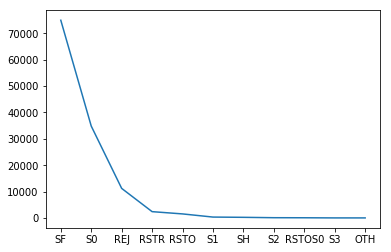

In [16]:
plt.plot(df["flag"].value_counts())

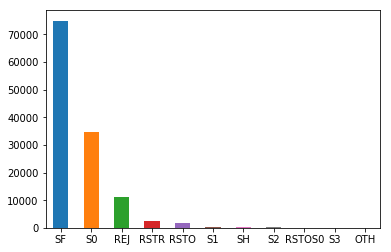

In [17]:
(df["flag"].value_counts()).plot.bar(x='lab', y='val', rot=0)

In [18]:
df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')]["flag"].value_counts()

SF    3077
Name: flag, dtype: int64

In [19]:
df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')&(df["flag"]=='SF')]["attack_type"].value_counts()

smurf        2646
pod           198
normal        190
ipsweep        27
satan           9
nmap            6
portsweep       1
Name: attack_type, dtype: int64

In [20]:
print("when protocol type is icmp,flag is set to be SF and the network service is ecr_i we can say that",
      (df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')&(df["flag"]=='SF')]["attack_type"].value_counts()['smurf'])/(df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')&(df["flag"]=='SF')]["attack_type"].value_counts().sum())*100,
      " % that it is a smurf attack")

when protocol type is icmp,flag is set to be SF and the network service is ecr_i we can say that 85.99285017874553  % that it is a smurf attack


In [21]:
print("There are around",df[(df["service"]=='ecr_i')&(df["protocol_type"]=='icmp')&(df["flag"]=='SF')]["attack_type"].value_counts().sum()," which have protocol type as icmp,flag is set as SF and the network service is  ecr_i")

There are around 3077  which have protocol type as icmp,flag is set as SF and the network service is  ecr_i


<h2>Now let's do analysis on network connection which are normal</h2>

In [22]:
df["service"][df["attack_type"]=='normal'].value_counts()

http        38049
domain_u     9034
smtp         7029
ftp_data     4984
other        2604
private       982
ftp           918
telnet        917
urp_i         599
finger        545
eco_i         497
auth          236
ecr_i         190
IRC           186
pop_3         186
ntp_u         168
time           76
X11            67
domain         38
urh_i          10
red_i           8
ssh             5
tim_i           5
shell           4
tftp_u          3
imap4           3
Name: service, dtype: int64

Destination network service used by normal


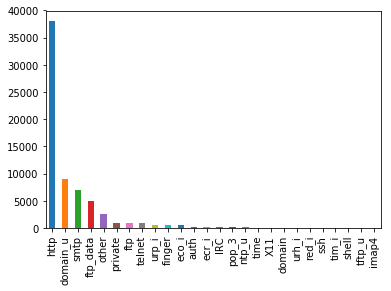

In [23]:
print("Destination network service used by normal")
(df["service"][df["attack_type"]=='normal'].value_counts()).plot.bar(x='lab',y='val')

In [24]:
df["protocol_type"][df["attack_type"]=='normal'].value_counts()

tcp     53600
udp     12434
icmp     1309
Name: protocol_type, dtype: int64

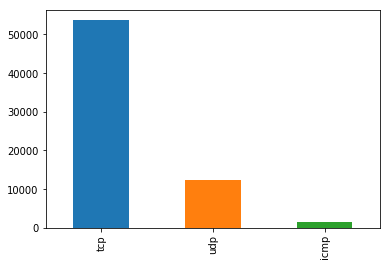

In [25]:
(df["protocol_type"][df["attack_type"]=='normal'].value_counts()).plot.bar(x='lab',y='val')

In [26]:
df["flag"][df["attack_type"]=='normal'].value_counts()

SF      63393
REJ      2693
S1        361
S0        354
RSTO      219
RSTR      146
S2        119
S3         45
OTH        11
SH          2
Name: flag, dtype: int64

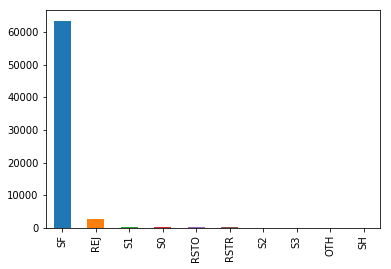

In [27]:
(df["flag"][df["attack_type"]=='normal'].value_counts()).plot.bar(x='lab',y='val')

SF stands for normal estblishment and termination
RSTR stands for Connection established and responder aborted.
REJ stands for connection attempt rejected
We have to have a look at the RSTR and REJ during our further analysis.

In [56]:
%%time
for i, attack in enumerate(df.attack_type):
            if attack=='neptune' or attack=='back' or attack=='land'or attack=='pod' or attack=='smurf' or attack=='teardrop' or attack=='apache2' or attack=='udpstorm' or attack=='processtable' or attack=='worm' or attack=='mailbomb':
                   df.attack_type[i]='DoS'
            elif attack=='satan' or attack=='ipsweep' or attack=='nmap'or attack=='portsweep' or attack=='mscan' or attack=='saint':
                   df.attack_type[i]='Probe'
            elif attack=='guess_passwd' or attack=='ftp_write' or attack=='imap'or attack=='phf' or attack=='multihop' or attack=='warezmaster' or attack=='warezclient' or attack=='spy' or attack=='xlock' or attack=='xsnoop' or attack=='snmpguess' or attack=='snmpgetattack' or attack=='httptunnel' or attack=='sendmail' or attack=='named':
                   df.attack_type[i]='R2L'
            elif attack=='buffer_overflow' or attack=='loadmodule' or attack=='rootkit'or attack=='perl' or attack=='sqlattack' or attack=='xterm' or attack=='ps':
                   df.attack_type[i]='U2R'

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.htm

Wall time: 43min 49s


In [57]:
df.to_csv('train_with_num.csv')

In [1]:
import pandas as pd
df=pd.read_csv(r'train_with_num.csv')

In [2]:
print('shape of train dataset:',df.shape)

shape of train dataset: (125973, 44)


In [3]:
df_y_train=df['attack_type']

In [4]:
df_y_train.value_counts()

1        67343
DoS      45927
Probe    11656
R2L        995
U2R         52
Name: attack_type, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Let's explore duration feature</h2>

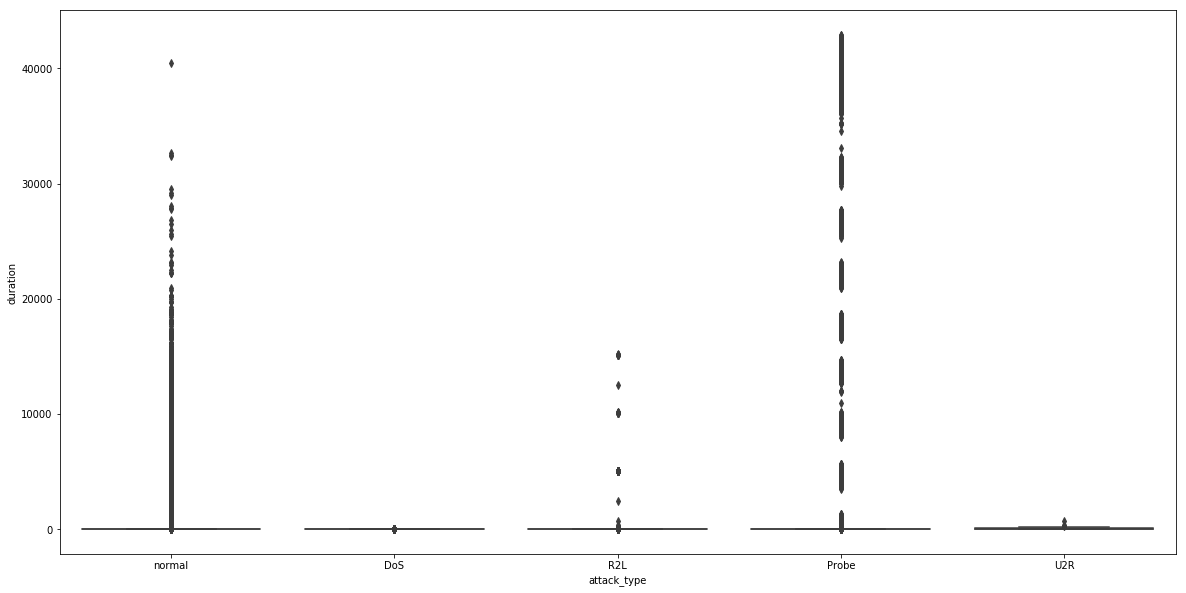

In [4]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="duration",data=df)

It seems duration of normal connection is huge and has a clear distinction yan others and thus it is highly valuable feature

Let's analyze duration feature for less than 10000 seconds and try to get some intution

In [5]:
df_dl10k=df[df['duration']<10000][['duration','attack_type']]

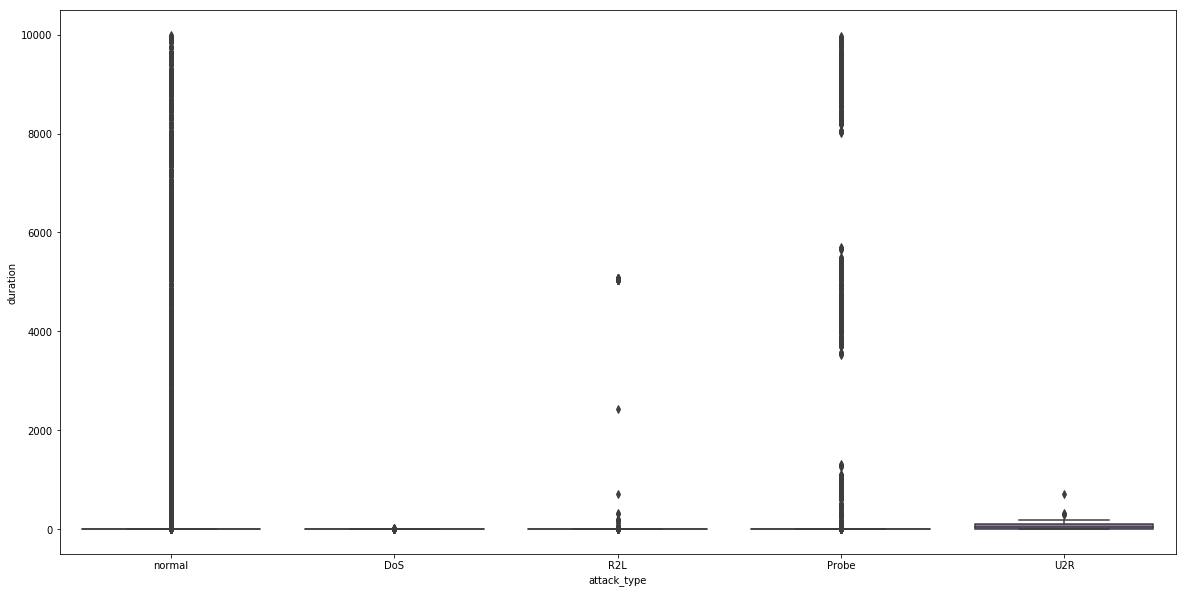

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="duration",data=df_dl10k)

Let's analyze duration feature less than 1000 seconds

In [7]:
df_dl1k=df[df['duration']<1000][['duration','attack_type']]

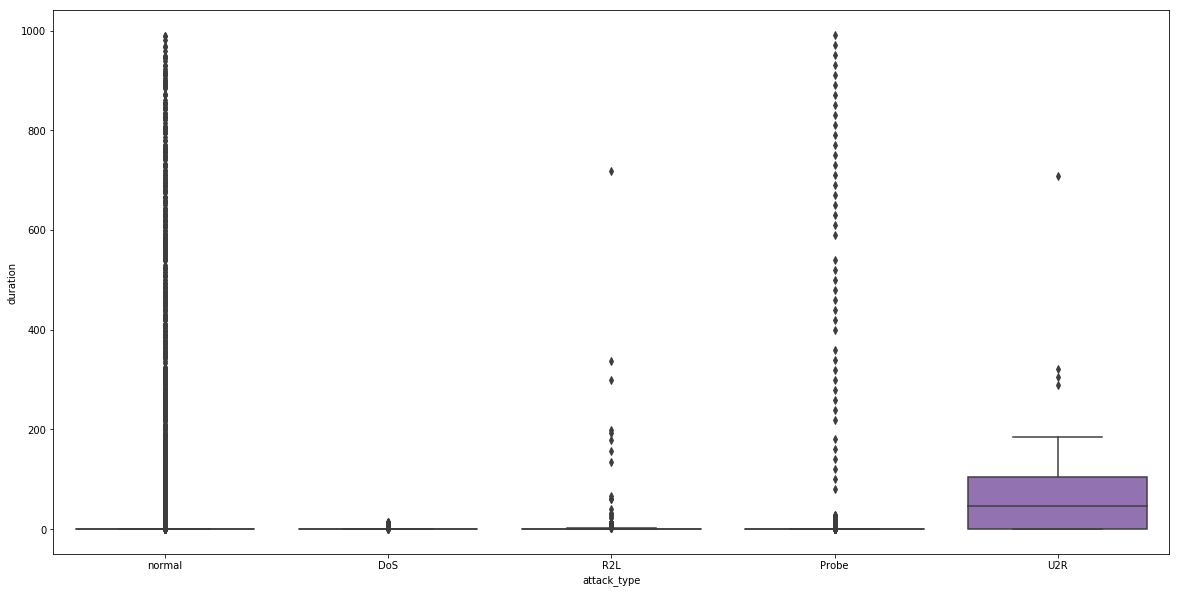

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="duration",data=df_dl1k)

Let's analyze duration feature less than 100 seconds

In [36]:
df_dl100=df[df['duration']<100][['duration','attack_type']]

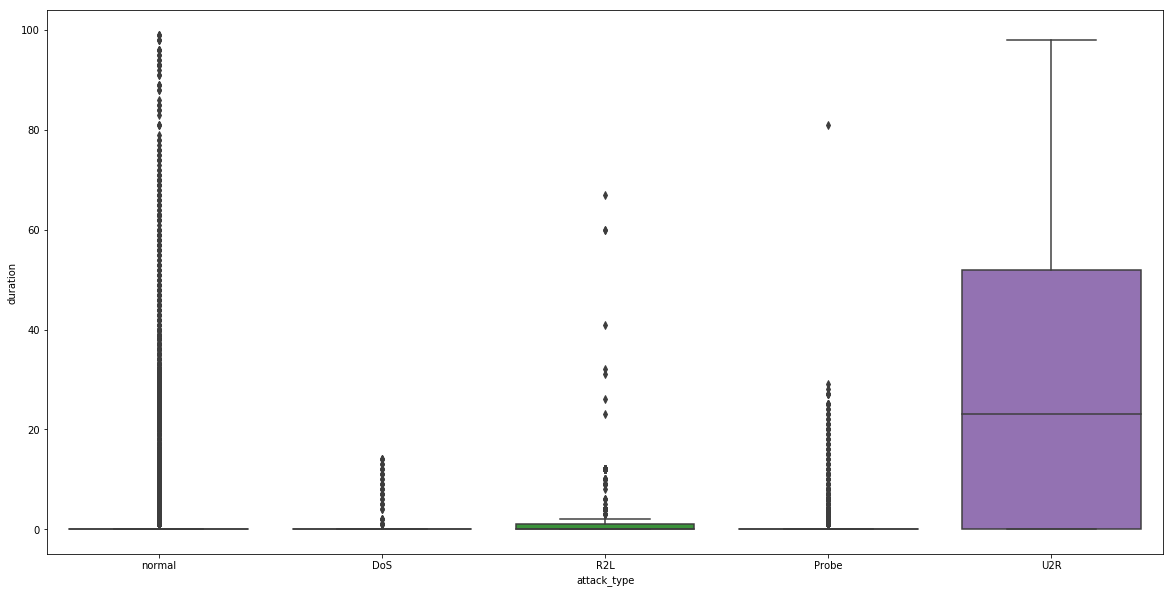

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="duration",data=df_dl100)

Let's analyze duration feature less than 10 seconds

In [39]:
df_dl10=df[df['duration']<10][['duration','attack_type']]

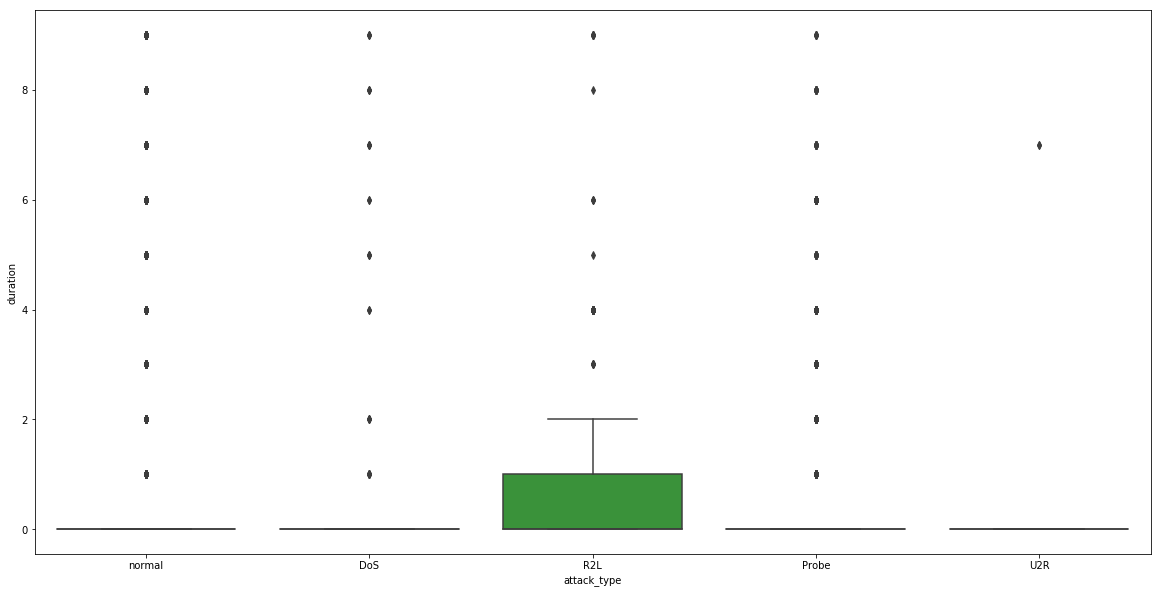

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="duration",data=df_dl10)

In [41]:
df_dl10.shape

(120506, 2)

In [42]:
df_dl10[df_dl10['attack_type']=='normal'].shape

(63188, 2)

In [8]:
df['attack_type'].value_counts()

1        67343
DoS      45927
Probe    11656
R2L        995
U2R         52
Name: attack_type, dtype: int64

In [7]:
import numpy as np

In [46]:
print('Out of normal connection the duration of connection is less than 10 seconds for around',np.round((df_dl10[df_dl10['attack_type']=='normal'].shape[0]/df['attack_type'].value_counts()['normal'])*100,3),'% of connections')
       

Out of normal connection the duration of connection is less than 10 seconds for around 93.83 % of connections


<h2>Let's analyze about count feature</h2>

Count feature is truly a value added feature as it will tell the no.of simulataneous connections attempted

In [47]:
import seaborn as sns

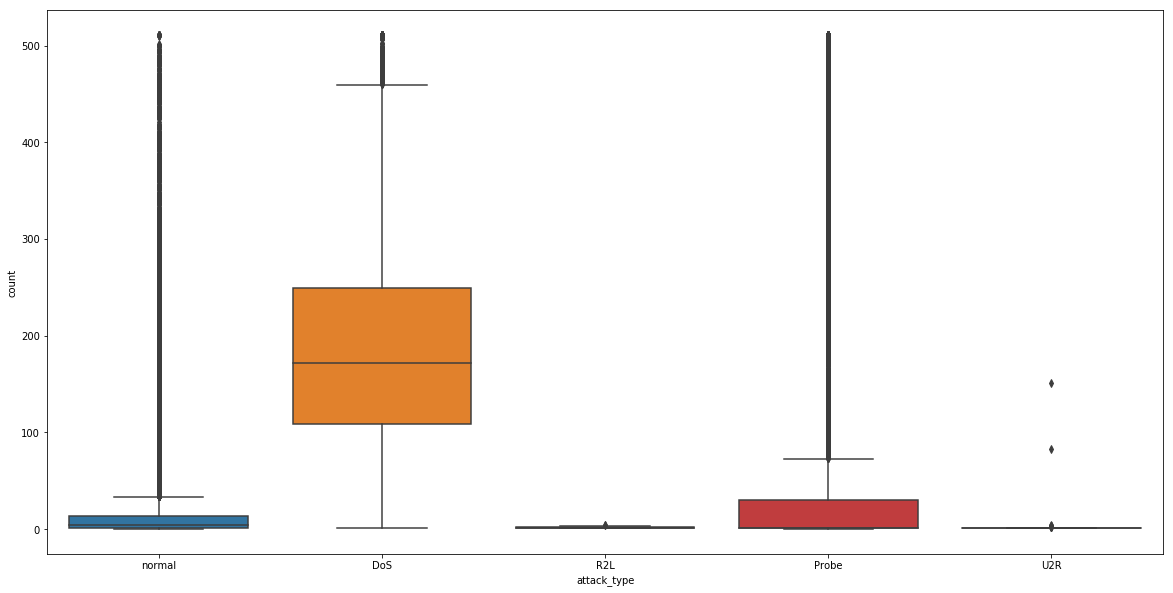

In [48]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="count",data=df)

The box plot tell it  all!!!There is a clear distinction between attacks

Now let's analyze how well it does it have distinction among smaller values of count variable

In [50]:
df_cl100=df[df['count']<100][['count','attack_type']]

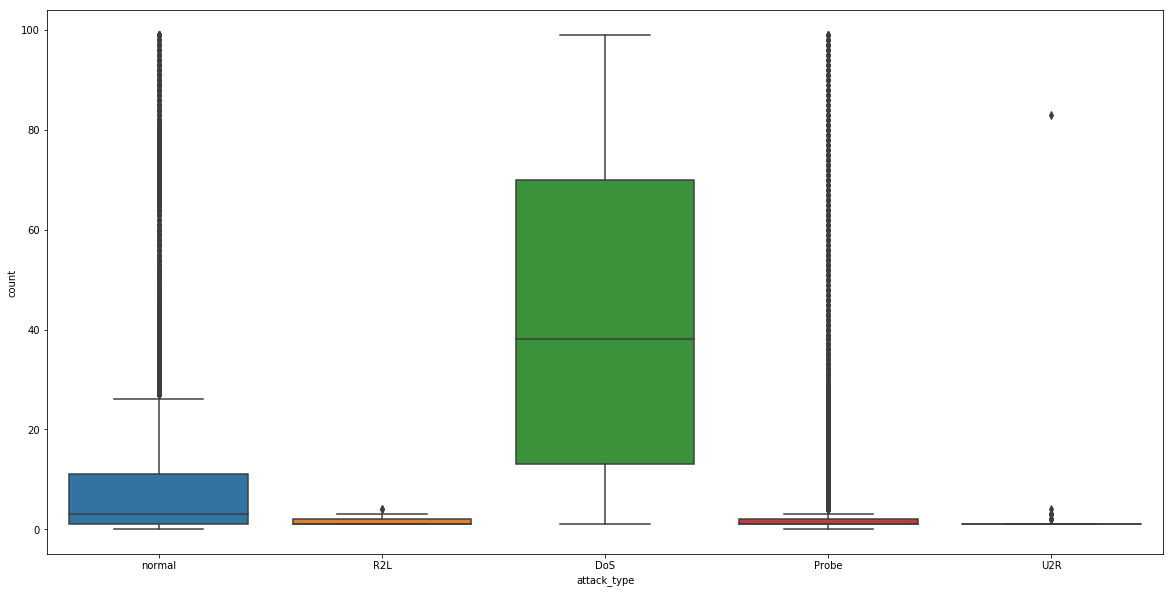

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="count",data=df_cl100)

There is a clear distinction between probe,r2l VS normal attacks

In [53]:
df_cl10=df[df['count']<10][['count','attack_type']]

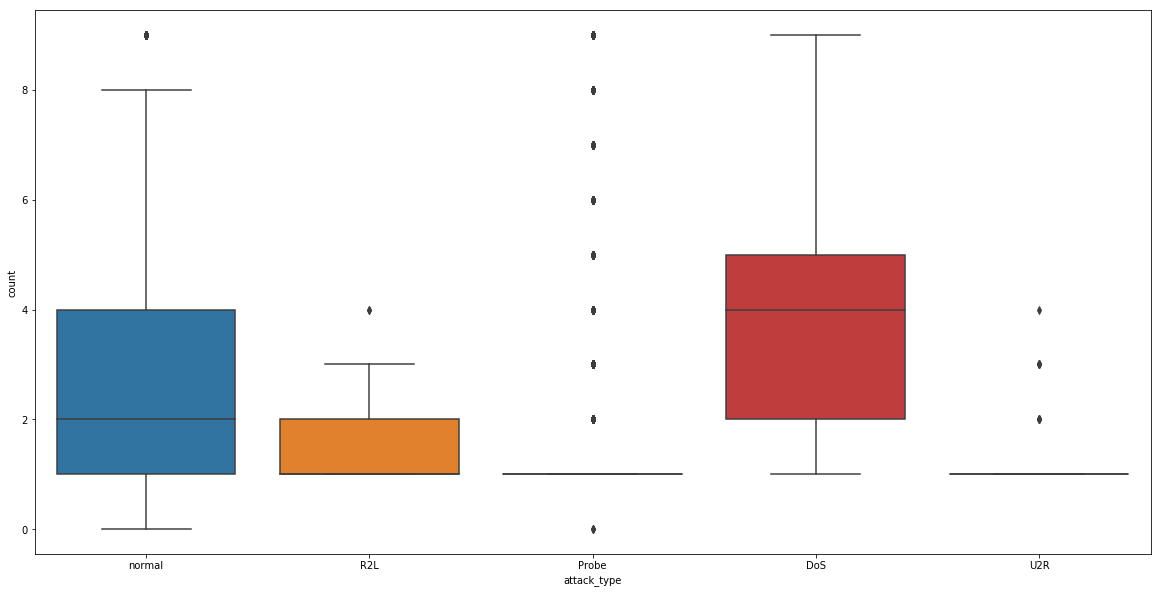

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x="attack_type",y="count",data=df_cl10)

In [4]:
df["attack_type"].unique()

array(['DoS', 'normal', 'Probe', 'R2L', 'U2R'], dtype=object)

<h2>Let's analyze about Denial of Service</h2>

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
grouped=df.groupby("attack_type")

In [56]:
group_DOS=grouped.get_group("DoS")

In [57]:
len(df["attack_type"].unique())

5

In [58]:
group_DOS['protocol_type'].value_counts()

tcp     42188
icmp     2847
udp       892
Name: protocol_type, dtype: int64

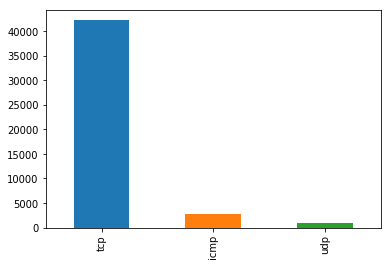

In [59]:
(group_DOS["protocol_type"].value_counts()).plot.bar(x='lab',y='val')

In [60]:
import numpy as np

In [61]:
print("There are around",np.round(group_DOS["protocol_type"].value_counts()['tcp']/group_DOS["protocol_type"].value_counts().sum(),4)*100,"% which have protocol type as tcp in DOS attack connections")

There are around 91.86 % which have protocol type as tcp in DOS attack connections


In [62]:
print("There are around",np.round(group_DOS["service"].value_counts()['private']/group_DOS["service"].value_counts().sum(),4)*100,"% which have service type as private in DOS attack connections")

There are around 34.77 % which have service type as private in DOS attack connections


In [63]:
print("There are around",np.round(group_DOS["flag"].value_counts()['REJ']/group_DOS["flag"].value_counts().sum(),4)*100,"% which have flag type as REJ in DOS attack connections")

There are around 12.35 % which have flag type as REJ in DOS attack connections


In [64]:
group_DOS['service'].value_counts()

private        15971
ecr_i           2844
http            2255
telnet          1312
ftp_data        1209
finger          1168
Z39_50           851
uucp             769
courier          726
auth             703
bgp              699
uucp_path        676
iso_tsap         675
whois            670
nnsp             622
imap4            622
vmnet            606
time             551
ctf              538
csnet_ns         533
supdup           528
http_443         523
discard          520
domain           508
daytime          503
ftp              489
gopher           485
efs              478
exec             465
systat           460
link             454
hostnames        447
name             428
klogin           425
login            420
mtp              416
echo             416
ldap             403
netbios_dgm      392
sunrpc           369
netbios_ssn      349
netstat          344
netbios_ns       336
kshell           292
ssh              281
nntp             281
smtp             241
sql_net      

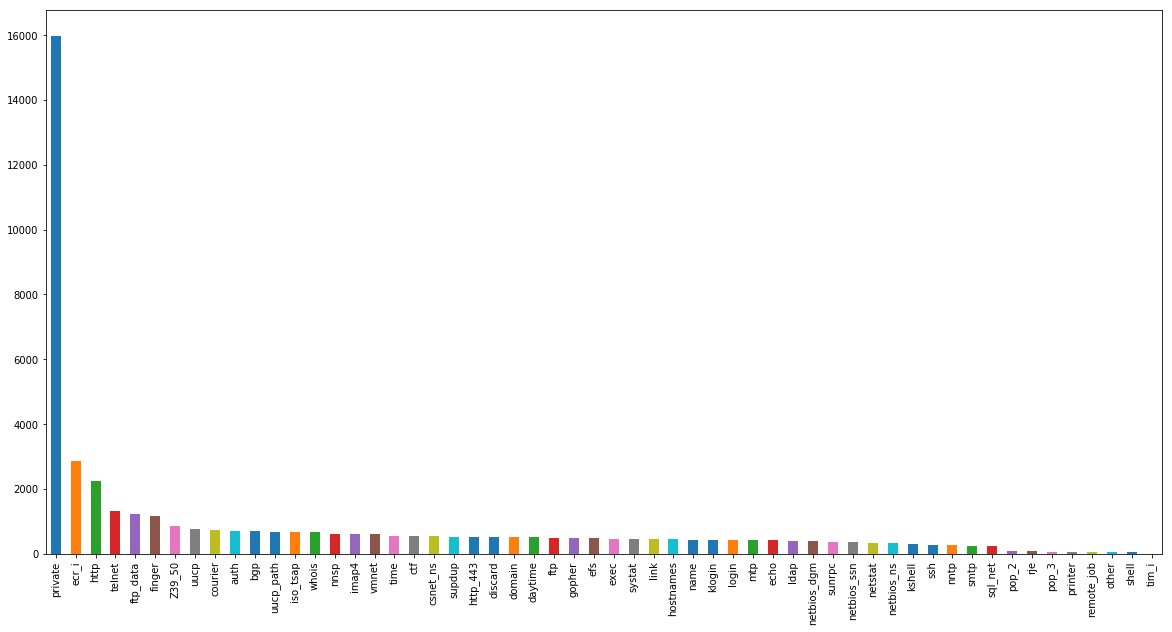

In [65]:
plt.figure(figsize=(20,10))
(group_DOS["service"].value_counts()).plot.bar(x='lab',y='val')

In [66]:
group_DOS['flag'].value_counts()

S0      34344
REJ      5671
SF       4599
RSTO     1216
RSTR       90
S2          5
S1          2
Name: flag, dtype: int64

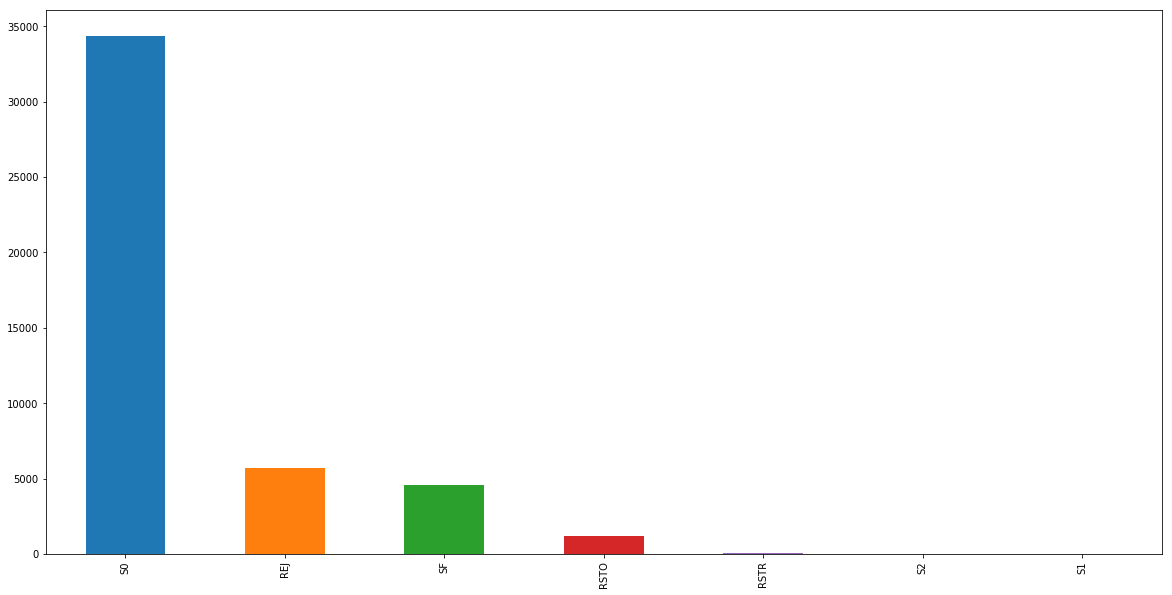

In [67]:
plt.figure(figsize=(20,10))
(group_DOS["flag"].value_counts()).plot.bar(x='lab',y='val')

In [68]:
for i in range(0,100,10):
    var =group_DOS["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile value is  14


In [69]:
for i in range(90,100):
    var =group_DOS["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 0
97 percentile value is 0
98 percentile value is 0
99 percentile value is 0
100 percentile value is  14


In [70]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =group_DOS["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 0
99.1 percentile value is 0
99.2 percentile value is 0
99.3 percentile value is 0
99.4 percentile value is 0
99.5 percentile value is 0
99.6 percentile value is 0
99.7 percentile value is 0
99.8 percentile value is 0
99.9 percentile value is 0
100 percentile value is  14


There is a sharp increase in 99-100 percentile interval

In [71]:
for i in range(0,100,10):
    var =group_DOS["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 1
10 percentile value is 38
20 percentile value is 100
30 percentile value is 119
40 percentile value is 137
50 percentile value is 172
60 percentile value is 213
70 percentile value is 237
80 percentile value is 261
90 percentile value is 283
100 percentile value is  511


<h2>Let's analyze about normal connections</h2>

In [72]:
group_normal=grouped.get_group("normal")

In [73]:
group_normal['protocol_type'].value_counts()

tcp     53600
udp     12434
icmp     1309
Name: protocol_type, dtype: int64

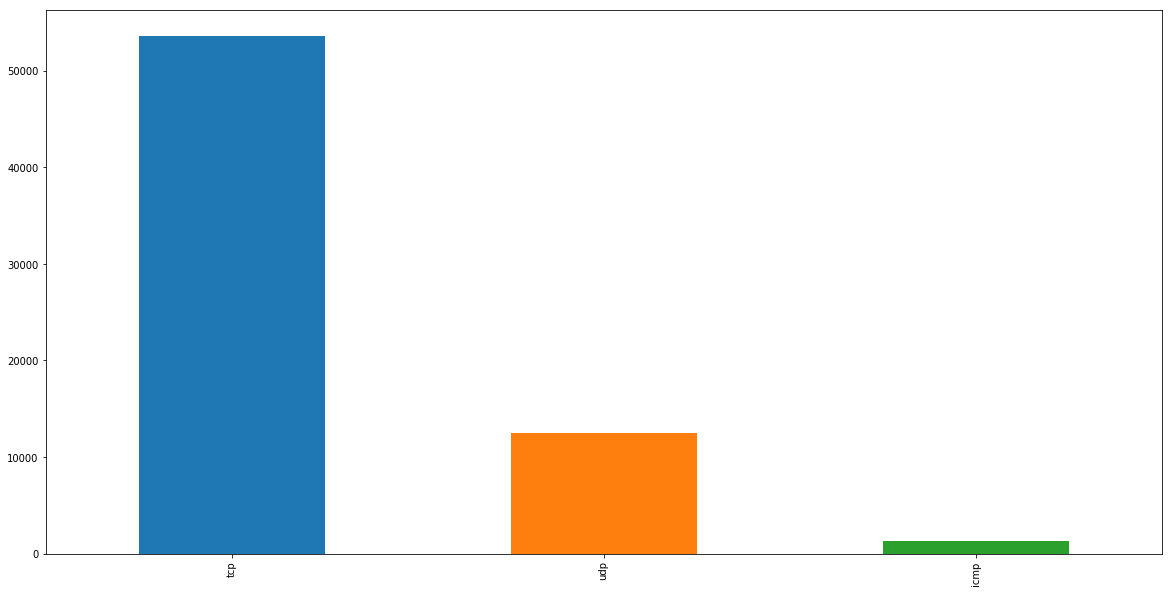

In [74]:
plt.figure(figsize=(20,10))
(group_normal["protocol_type"].value_counts()).plot.bar(x='lab',y='val')

In [75]:
group_normal['service'].value_counts()

http        38049
domain_u     9034
smtp         7029
ftp_data     4984
other        2604
private       982
ftp           918
telnet        917
urp_i         599
finger        545
eco_i         497
auth          236
ecr_i         190
IRC           186
pop_3         186
ntp_u         168
time           76
X11            67
domain         38
urh_i          10
red_i           8
ssh             5
tim_i           5
shell           4
tftp_u          3
imap4           3
Name: service, dtype: int64

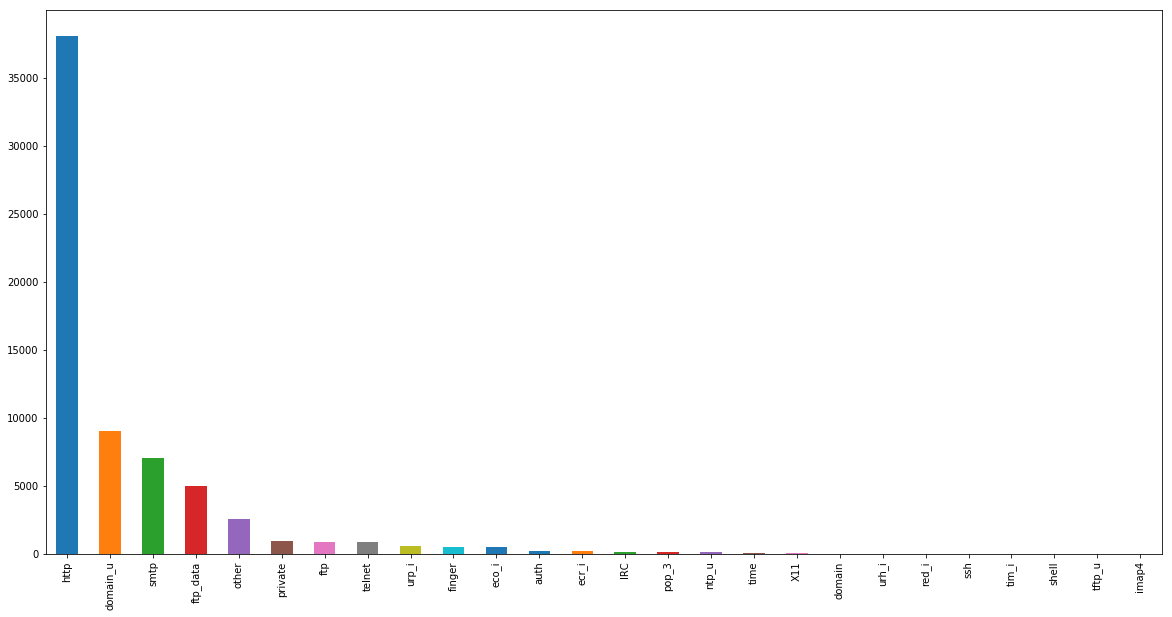

In [76]:
plt.figure(figsize=(20,10))
(group_normal["service"].value_counts()).plot.bar(x='lab',y='val')

In [77]:
group_normal['flag'].value_counts()

SF      63393
REJ      2693
S1        361
S0        354
RSTO      219
RSTR      146
S2        119
S3         45
OTH        11
SH          2
Name: flag, dtype: int64

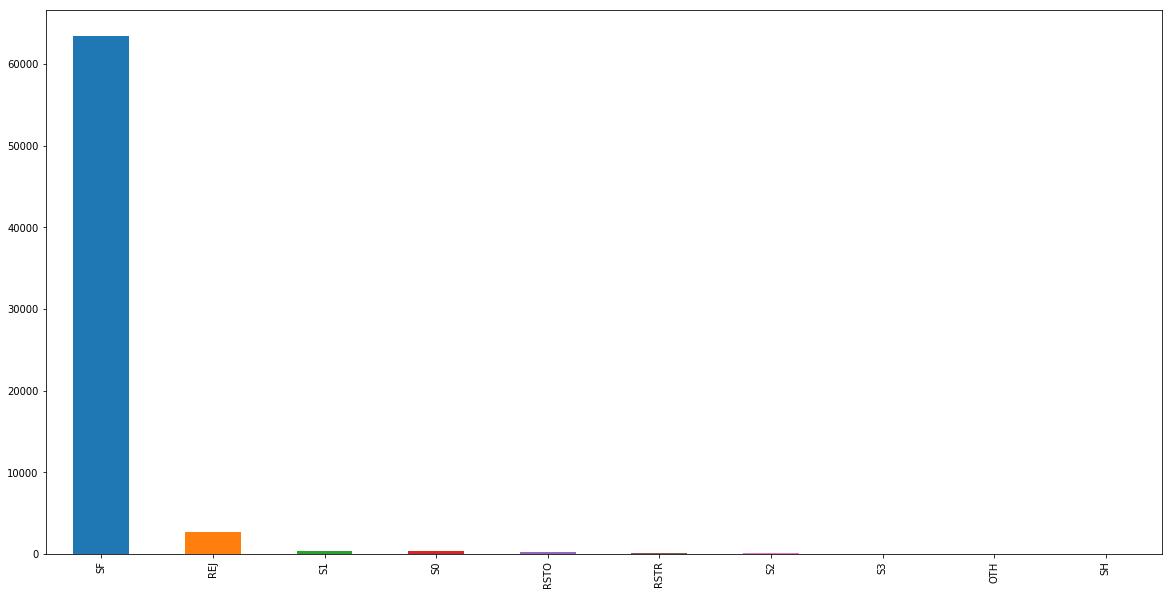

In [78]:
plt.figure(figsize=(20,10))
(group_normal["flag"].value_counts()).plot.bar(x='lab',y='val')

In [79]:
print("There are around",np.round(group_normal["protocol_type"].value_counts()['tcp']/group_normal["protocol_type"].value_counts().sum(),4)*100,"% which have protocol type as tcp in normal connections")

There are around 79.59 % which have protocol type as tcp in normal connections


In [80]:
print("There are around",np.round(group_normal["service"].value_counts()['http']/group_normal['service'].value_counts().sum(),4)*100,"% which have service type as http in normal connections")

There are around 56.49999999999999 % which have service type as http in normal connections


In [81]:
print("There are around",np.round(group_normal["flag"].value_counts()['SF']/group_normal['flag'].value_counts().sum(),5)*100,"% which have flag type as SF in normal connections")

There are around 94.135 % which have flag type as SF in normal connections


In [82]:
for i in range(0,100,10):
    var =group_normal["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 1
100 percentile value is  40504


In [83]:
for i in range(90,100):
    var =group_normal["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 1
91 percentile value is 2
92 percentile value is 3
93 percentile value is 5
94 percentile value is 11
95 percentile value is 23
96 percentile value is 30
97 percentile value is 300
98 percentile value is 2431
99 percentile value is 6381
100 percentile value is  40504


In [84]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =group_normal["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 6381
99.1 percentile value is 7225
99.2 percentile value is 7901
99.3 percentile value is 8920
99.4 percentile value is 9866
99.5 percentile value is 10809
99.6 percentile value is 11711
99.7 percentile value is 12725
99.8 percentile value is 14085
99.9 percentile value is 16800
100 percentile value is  40504


There is a sharp increase in at 99.9-100 percentile

In [85]:
for i in range(0,100,10):
    var =group_normal["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 1
20 percentile value is 1
30 percentile value is 1
40 percentile value is 2
50 percentile value is 4
60 percentile value is 7
70 percentile value is 11
80 percentile value is 17
90 percentile value is 61
100 percentile value is  511


<h2>Let's anlayze about Probe attacks</h2>

In [86]:
group_probe=grouped.get_group("Probe")

In [87]:
group_probe['protocol_type'].value_counts()

tcp     5857
icmp    4135
udp     1664
Name: protocol_type, dtype: int64

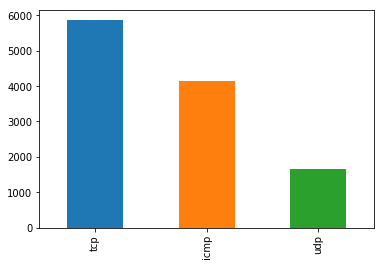

In [88]:
(group_probe["protocol_type"].value_counts()).plot.bar(x='lab',y='val')

In [89]:
group_probe['service'].value_counts()

private        4900
eco_i          4089
other          1689
finger           54
ftp_data         51
ecr_i            43
smtp             43
gopher           33
telnet           33
ftp              32
http             30
time             27
ctf              25
ssh              25
whois            23
mtp              23
name             23
domain           23
link             21
echo             18
daytime          18
discard          18
rje              18
remote_job       18
systat           17
supdup           16
auth             16
netstat          16
nntp             15
netbios_ssn      13
               ... 
csnet_ns         12
iso_tsap         12
netbios_ns       11
uucp             11
vmnet            11
pop_3            11
bgp              11
Z39_50           11
imap4            11
exec              9
domain_u          9
nnsp              8
courier           8
shell             8
pop_2             8
klogin            8
efs               7
kshell            7
http_443          7


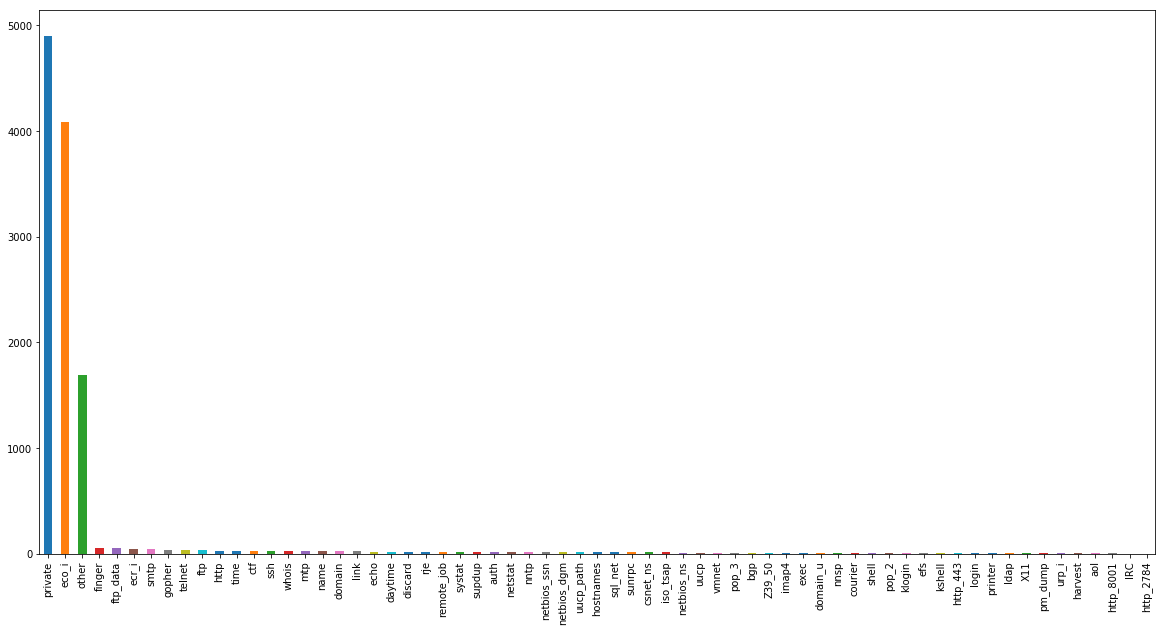

In [90]:
plt.figure(figsize=(20,10))
(group_probe["service"].value_counts()).plot.bar(x='lab',y='val')

In [91]:
group_probe['flag'].value_counts()

SF        5967
REJ       2869
RSTR      2180
SH         265
S0         153
RSTOS0     103
RSTO        80
OTH         35
S2           2
S3           1
S1           1
Name: flag, dtype: int64

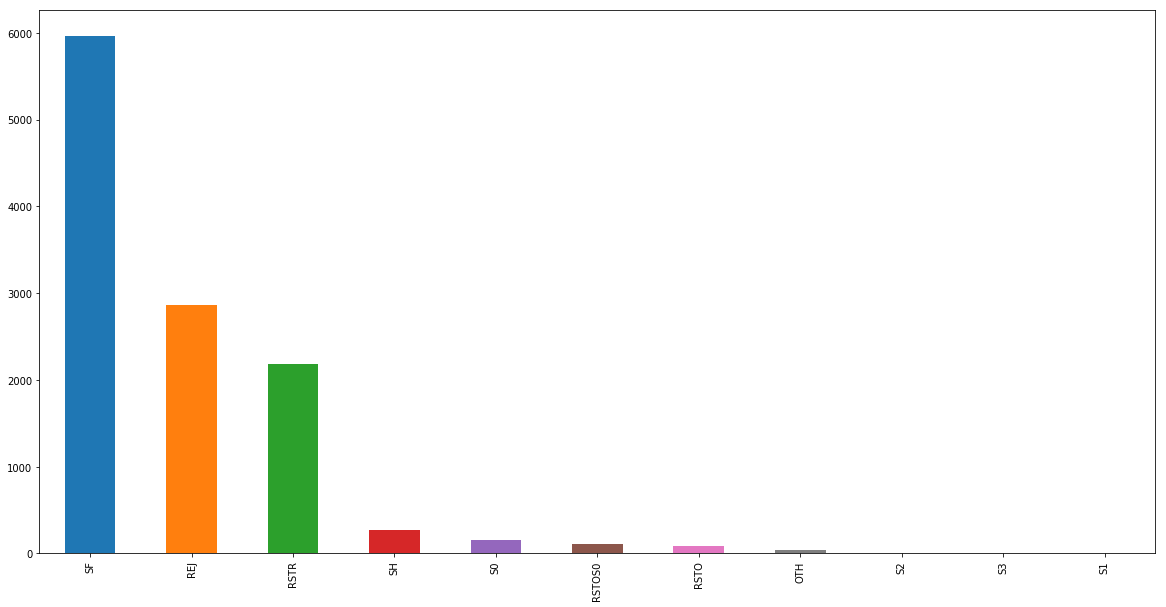

In [92]:
plt.figure(figsize=(20,10))
(group_probe["flag"].value_counts()).plot.bar(x='lab',y='val')

In [93]:
print("There are around",np.round(group_probe["protocol_type"].value_counts()['tcp']/group_probe["protocol_type"].value_counts().sum(),5)*100,"% which have protocol type as tcp in probe connections")


There are around 50.249 % which have protocol type as tcp in probe connections


In [100]:
print("There are around",np.round(group_probe["service"].value_counts()['other']/group_probe['service'].value_counts().sum(),2)*100,"% which have service type as other in other connections")


There are around 14.000000000000002 % which have service type as other in other connections


In [101]:
print("There are around",(np.round(group_probe["flag"].value_counts()['REJ']/group_probe['flag'].value_counts().sum(),3)*100),"% which have flag type as REJ in probe connections")

There are around 24.6 % which have flag type as REJ in probe connections


In [102]:
for i in range(0,100,10):
    var =group_probe["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 6
100 percentile value is  42908


In [103]:
for i in range(0,10):
    var =group_probe["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])


0 percentile value is 0
1 percentile value is 0
2 percentile value is 0
3 percentile value is 0
4 percentile value is 0
5 percentile value is 0
6 percentile value is 0
7 percentile value is 0
8 percentile value is 0
9 percentile value is 0
100 percentile value is  42908


In [104]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =group_probe["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 40171
99.1 percentile value is 40423
99.2 percentile value is 40682
99.3 percentile value is 40983
99.4 percentile value is 41307
99.5 percentile value is 41561
99.6 percentile value is 41822
99.7 percentile value is 42088
99.8 percentile value is 42363
99.9 percentile value is 42636
100 percentile value is  42908


One unique observation that we make is that probe connection does not last for more than 11 seconds

In [ ]:
Thus probe attacks u2r and r2l have clear ditinction and thus surely a value added feature

In [105]:
for i in range(0,100,10):
    var =group_probe["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 1
20 percentile value is 1
30 percentile value is 1
40 percentile value is 1
50 percentile value is 1
60 percentile value is 2
70 percentile value is 14
80 percentile value is 96
90 percentile value is 390
100 percentile value is  511


<h2>Let's analyze about R2L attacks</h2>

In [106]:
group_r2l=grouped.get_group("R2L")

In [107]:
group_r2l['protocol_type'].value_counts()

tcp    995
Name: protocol_type, dtype: int64

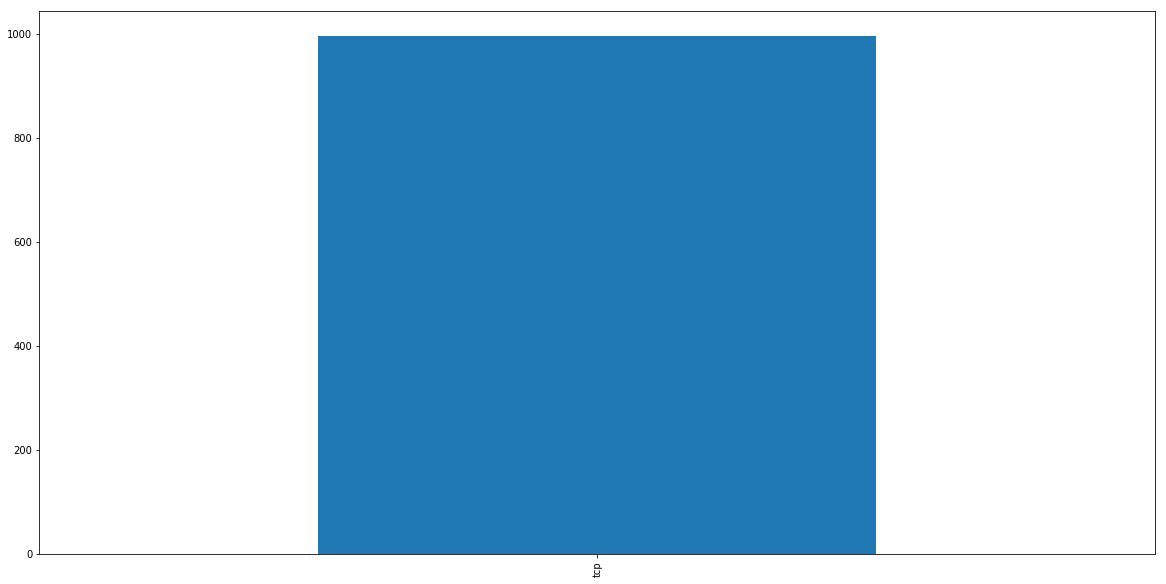

In [108]:
plt.figure(figsize=(20,10))
(group_r2l["protocol_type"].value_counts()).plot.bar(x='lab',y='val')

In [109]:
group_r2l['service'].value_counts()

ftp_data    604
ftp         312
telnet       57
imap4        11
other         5
http          4
login         2
Name: service, dtype: int64

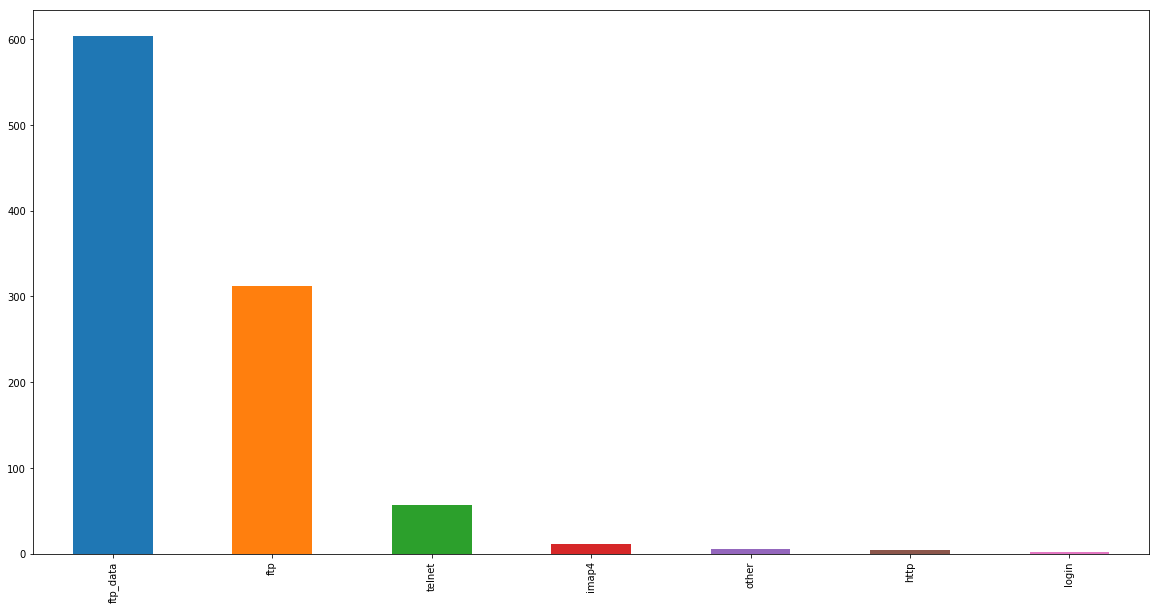

In [110]:
plt.figure(figsize=(20,10))
(group_r2l["service"].value_counts()).plot.bar(x='lab',y='val')

In [111]:
group_r2l['flag'].value_counts()

SF      935
RSTO     46
RSTR      5
SH        4
S3        3
S2        1
S1        1
Name: flag, dtype: int64

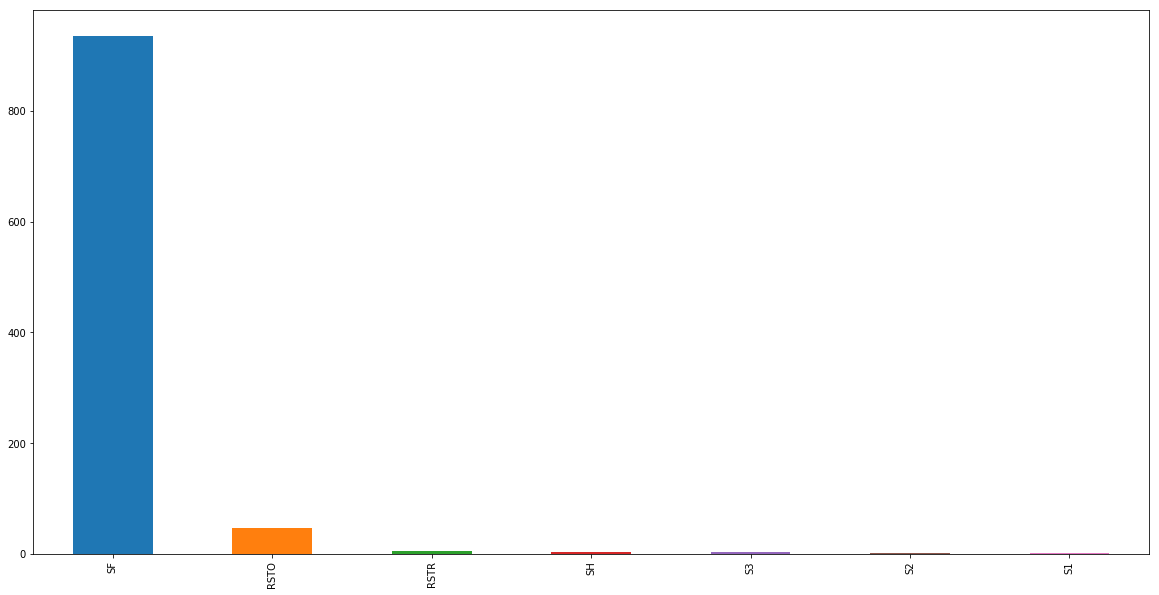

In [112]:
plt.figure(figsize=(20,10))
(group_r2l["flag"].value_counts()).plot.bar(x='lab',y='val')

In [113]:
print("There are around",np.round(group_r2l["protocol_type"].value_counts()['tcp']/group_r2l["protocol_type"].value_counts().sum(),4)*100,"% which have protocol type as tcp in r2l connections")

There are around 100.0 % which have protocol type as tcp in r2l connections


In [118]:
print("There are around",np.round(group_r2l["service"].value_counts()['ftp_data']/group_r2l['service'].value_counts().sum(),3)*100,"% which have service type as pop_3 in r2l connections")

There are around 60.699999999999996 % which have service type as pop_3 in r2l connections


In [119]:
print("There are around",np.round(group_r2l["flag"].value_counts()['SF']/group_r2l['flag'].value_counts().sum(),5)*100,"% which have flag type as SF in r2l connections")

There are around 93.97 % which have flag type as SF in r2l connections


In [120]:
for i in range(0,100,10):
    var =group_r2l["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 1
80 percentile value is 2
90 percentile value is 134
100 percentile value is  15168


In [121]:
for i in range(90,100):
    var =group_r2l["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 134
91 percentile value is 5033
92 percentile value is 5043
93 percentile value is 5049
94 percentile value is 5052
95 percentile value is 5057
96 percentile value is 5062
97 percentile value is 5072
98 percentile value is 10125
99 percentile value is 15149
100 percentile value is  15168


In [122]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =group_r2l["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 15149
99.1 percentile value is 15152
99.2 percentile value is 15157
99.3 percentile value is 15159
99.4 percentile value is 15160
99.5 percentile value is 15160
99.6 percentile value is 15161
99.7 percentile value is 15161
99.8 percentile value is 15163
99.9 percentile value is 15168
100 percentile value is  15168


We can say that most of the r2l connections don't last for more than 300 seconds

In [123]:
for i in range(0,100,10):
    var =group_r2l["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 1
10 percentile value is 1
20 percentile value is 1
30 percentile value is 1
40 percentile value is 1
50 percentile value is 1
60 percentile value is 1
70 percentile value is 1
80 percentile value is 2
90 percentile value is 2
100 percentile value is  4


<h2>Let's analyze about U2R attacks</h2>

In [124]:
group_u2r=grouped.get_group("U2R")

In [125]:
group_u2r['protocol_type'].value_counts()

tcp    49
udp     3
Name: protocol_type, dtype: int64

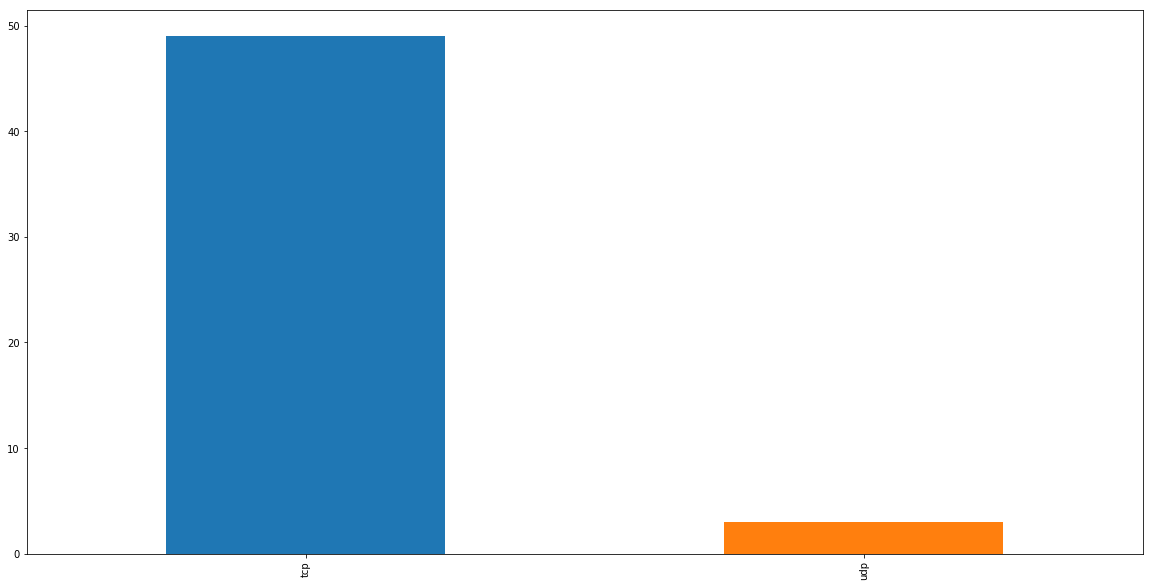

In [126]:
plt.figure(figsize=(20,10))
(group_u2r["protocol_type"].value_counts()).plot.bar(x='lab',y='val')

In [127]:
group_u2r['service'].value_counts()

telnet      34
ftp_data    12
ftp          3
other        3
Name: service, dtype: int64

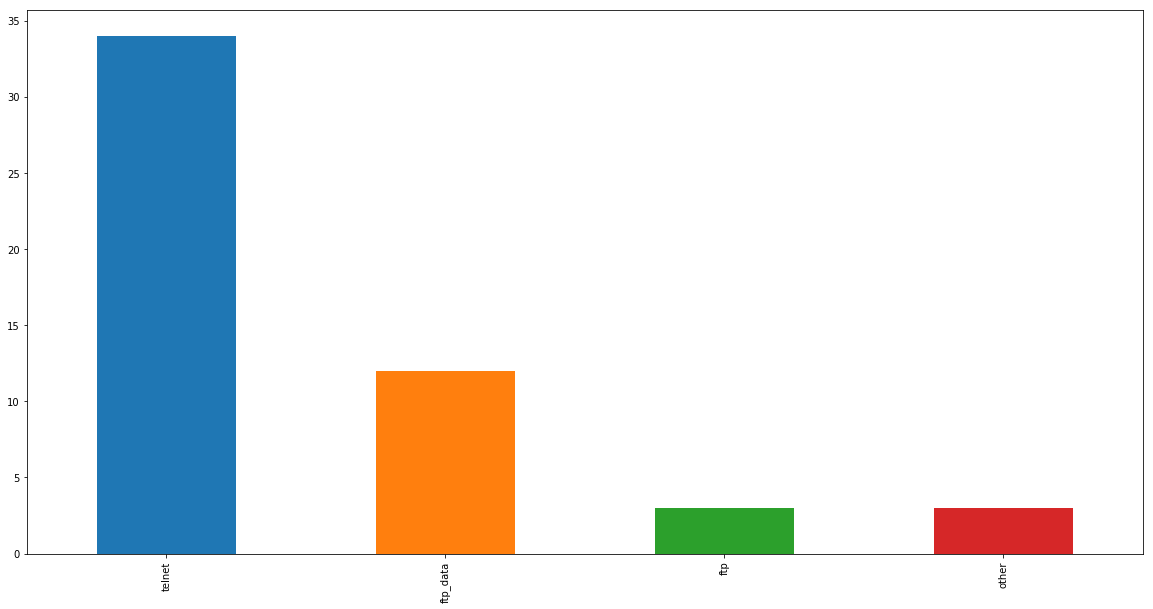

In [128]:
plt.figure(figsize=(20,10))
(group_u2r["service"].value_counts()).plot.bar(x='lab',y='val')

In [129]:
group_u2r['flag'].value_counts()

SF      51
RSTO     1
Name: flag, dtype: int64

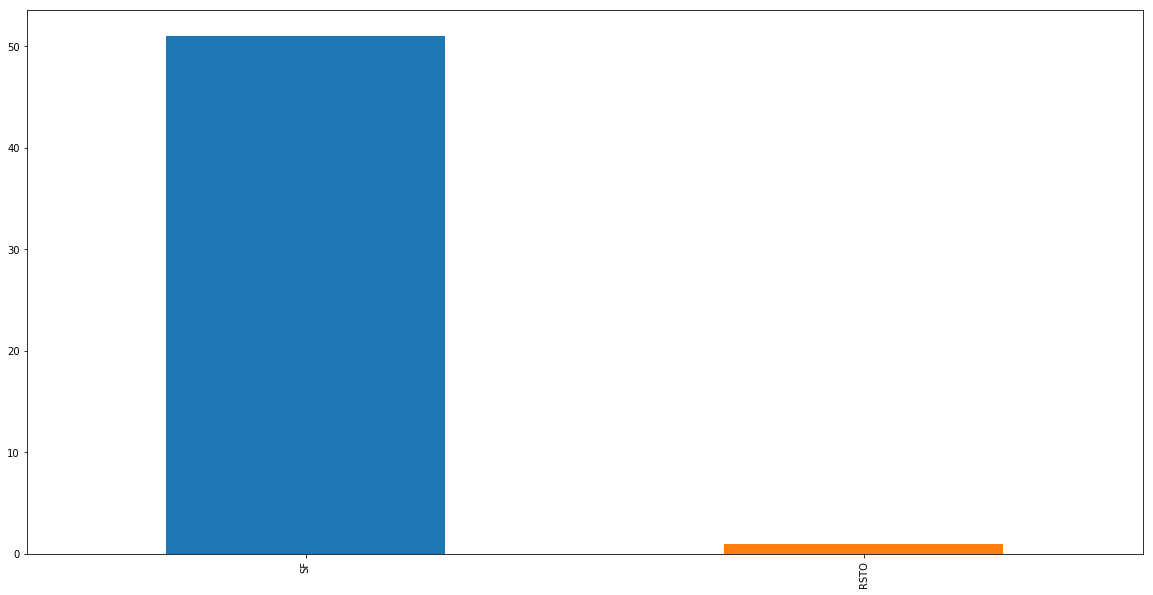

In [130]:
plt.figure(figsize=(20,10))
(group_u2r["flag"].value_counts()).plot.bar(x='lab',y='val')

In [131]:
print("There are around",np.round(group_u2r["protocol_type"].value_counts()['tcp']/group_u2r["protocol_type"].value_counts().sum(),4)*100,"% which have protocol type as tcp in u2r connections")

There are around 94.23 % which have protocol type as tcp in u2r connections


In [132]:
print("There are around",np.round(group_u2r["service"].value_counts()['telnet']/group_u2r['service'].value_counts().sum(),5)*100,"% which have service type as http in u2r connections")

There are around 65.385 % which have service type as http in u2r connections


In [133]:
print("There are around",np.round(group_u2r["flag"].value_counts()['SF']/group_u2r['flag'].value_counts().sum(),5)*100,"% which have flag type as SF in u2r connections")

There are around 98.077 % which have flag type as SF in u2r connections


In [134]:
for i in range(0,100,10):
    var =group_u2r["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 7
40 percentile value is 31
50 percentile value is 47
60 percentile value is 60
70 percentile value is 85
80 percentile value is 150
90 percentile value is 179
100 percentile value is  708


In [135]:
for i in range(90,100):
    var =group_u2r["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 179
91 percentile value is 184
92 percentile value is 184
93 percentile value is 290
94 percentile value is 290
95 percentile value is 305
96 percentile value is 305
97 percentile value is 321
98 percentile value is 321
99 percentile value is 708
100 percentile value is  708


In [136]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =group_u2r["duration"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 708
99.1 percentile value is 708
99.2 percentile value is 708
99.3 percentile value is 708
99.4 percentile value is 708
99.5 percentile value is 708
99.6 percentile value is 708
99.7 percentile value is 708
99.8 percentile value is 708
99.9 percentile value is 708
100 percentile value is  708


User to root attack have maximum of 2224 seconds as their maximum duration and less than 100 seconds for  97 percent of datapoints

In [137]:
for i in range(0,100,10):
    var =group_u2r["count"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 1
10 percentile value is 1
20 percentile value is 1
30 percentile value is 1
40 percentile value is 1
50 percentile value is 1
60 percentile value is 1
70 percentile value is 1
80 percentile value is 2
90 percentile value is 3
100 percentile value is  151


We can see a clear distnction that Dos attcks have higher no of connections within the past 2 seconds
which clearly matches with the domain knowledge.Thus, it is a value added feature

In [99]:
df.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [100]:
df.service.unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [178]:
df_categorical_variables=df[['protocol_type','flag','service']]

In [179]:
df_categorical_variables.head()

,protocol_type,flag,service
0,tcp,SF,ftp_data
1,udp,SF,other
2,tcp,S0,private
3,tcp,SF,http
4,tcp,SF,http


In [180]:
#data_dummies=pd.get_dummies(df)

In [181]:
#data_dummies.columns

In [182]:
#data_dummies.head()

In [183]:
#print(len(data_dummies.columns))

In [184]:
dummies = pd.get_dummies(df.protocol_type)

In [239]:
print(dummies.head())

   icmp  tcp  udp
0     0    1    0
1     0    1    0
2     0    1    0
3     1    0    0
4     0    1    0


In [240]:
df_dummies= pd.concat([df,dummies],axis='columns')

In [241]:
df_dummies.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know,icmp,tcp,udp
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,normal,20,0.0,1.0,0.0
1,1,0,udp,other,SF,146,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,15,0.0,1.0,0.0
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,DoS,19,0.0,1.0,0.0
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.04,0.03,0.01,0.00,0.01,normal,21,1.0,0.0,0.0
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,21,0.0,1.0,0.0


In [242]:
df_dummies.drop('protocol_type',axis='columns',inplace=True)
df_dummies.head()

,Unnamed: 0,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know,icmp,tcp,udp
0,0,0,ftp_data,SF,491,0,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,normal,20,0.0,1.0,0.0
1,1,0,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,15,0.0,1.0,0.0
2,2,0,private,S0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,DoS,19,0.0,1.0,0.0
3,3,0,http,SF,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,normal,21,1.0,0.0,0.0
4,4,0,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,normal,21,0.0,1.0,0.0


In [243]:
dummies_1 = pd.get_dummies(df.service)

In [244]:
dummies_1.head()

,IRC,X11,Z39_50,aol,auth,bgp,courier,csnet_ns,ctf,daytime,...,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
df_dummies= pd.concat([df_dummies,dummies_1],axis='columns')

In [246]:
df_dummies.drop('service',axis='columns',inplace=True)
df_dummies.head()

,Unnamed: 0,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
0,0,0,SF,491,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,SF,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,S0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,SF,232,8153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,SF,199,420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
dummies_2 = pd.get_dummies(df.flag)

In [248]:
print(dummies_2.head())

   OTH  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  S3  SF  SH
0    0    0     0       0     0   0   0   0   0   1   0
1    0    0     0       0     0   0   0   0   0   1   0
2    0    0     0       0     0   1   0   0   0   0   0
3    0    0     0       0     0   0   0   0   0   1   0
4    0    0     0       0     0   0   0   0   0   1   0


In [249]:
df_dummies= pd.concat([df_dummies,dummies_2],axis='columns')

In [250]:
df_dummies.head()

,Unnamed: 0,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,SF,491,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,SF,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,S0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,SF,232,8153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,SF,199,420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [251]:
df_dummies.head(5)


,Unnamed: 0,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,SF,491,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,SF,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,S0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,SF,232,8153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,SF,199,420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [252]:
df_dummies.head(5)

,Unnamed: 0,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,SF,491,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,SF,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,S0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,SF,232,8153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,SF,199,420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [253]:
df_dummies.head(5)

,Unnamed: 0,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,SF,491,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,SF,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,S0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0,SF,232,8153,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,SF,199,420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [254]:
df1=df_dummies.drop('Unnamed: 0',axis=1)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
df1.columns

Index(['Unnamed: 0', 'duration', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       ...
       'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'],
      dtype='object', length=125)

In [130]:
a=df1['attack_type']

In [255]:
df1.head()

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,SF,491,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,SF,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,S0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,SF,232,8153,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,SF,199,420,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [256]:
df1.drop('flag',axis='columns',inplace=True)

In [257]:
print(a.head())

0    normal
1    normal
2       DoS
3    normal
4    normal
Name: attack_type, dtype: object


In [258]:
df1.drop('attack_type',axis='columns',inplace=True)

In [259]:
X_one_hot_coded_train=df1

In [260]:
X_one_hot_coded_train.shape

(125973, 123)

In [ ]:
Y_one_hot_coded_train=Y

In [ ]:
Y_one_hot_coded_train.shape

In [66]:
df1.shape

(125973, 51)

In [269]:
df_ohe_train=X_one_hot_coded_train
#df_y_train=Y_one_hot_coded_train

In [270]:
df_ohe_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


<h1>UTILITY FUNCTION</h1>

In [8]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C,annot=True ,cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

<h1>BASELINE MODEL</h1>

Here we randomly generate class probabilities and consider it as a random model

In [9]:
import pandas as pd
test_df = pd.read_csv(r'C:\Users\anjineyulu\Desktop\amazon_fine_food_reviews\kdd_test.csv', header=None)
test_df.rename(columns={0: 'duration', 1: 'protocol_type',2:'service',3:'flag',4:'src_bytes',5:'dst_bytes',6:'land',7:'wrong_fragment',8:'urgent',9:'hot',10:'num_failed_logins',11:'logged_in',12:'num_compromised',13: 'root_shell', 14: 'su_attempted',15:'num_root',16:'num_file_creations',17:'num_shells',18:'num_access_files',19:'num_outbound_cmds',20:'is_host_login',21:'is_guest_login',22:'count',23:'srv_count',24:'serror_rate',25:'srv_serror_rate',26:'rerror_rate',27:'srv_rerror_rate',28:'same_srv_rate',29:'diff_srv_rate',30:'srv_diff_host_rate',31:'dst_host_count',32:'dst_host_srv_count',33:'dst_host_same_srv_rate',34:'dst_host_diff_srv_rate',35: 'dst_host_same_src_port_rate', 36: 'dst_host_srv_diff_host_rate',37:'dst_host_serror_rate',38:'dst_host_srv_serror_rate',39:'dst_host_rerror_rate',40:'dst_host_srv_rerror_rate',41:'attack_type',42:'dont_know'}, inplace=True)
test_df.to_csv('test_with_col.csv', index=False) # save to new csv file
print('Number of data points : ', test_df.shape[0])
print('Number of features : ', test_df.shape[1])
print('Features : ', test_df.columns.values)
test_df.head()

Number of data points :  22543
Number of features :  43
Features :  ['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'attack_type' 'dont_know']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
test_df['attack_type'].value_counts()

normal             9710
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
sqlattack             2
perl                  2
udpstorm              2
worm                  2
loadmodule            2
phf                   2
imap                  1
Name: attack_type, dtype: int64

In [11]:
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
#cv_data_len = cv_df.shape[0]

In [12]:
test_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', 'dont_know'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.metrics import log_loss
cv_predicted_y = np.zeros((cv_data_len,5))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,5)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))

In [16]:
%%time
for i, attack in enumerate(test_df.attack_type):
            if attack=='neptune' or attack=='back' or attack=='land'or attack=='pod' or attack=='smurf' or attack=='teardrop' or attack=='apache2' or attack=='udpstorm' or attack=='processtable' or attack=='worm' or attack=='mailbomb':
                   test_df.attack_type[i]='DoS'
            elif attack=='satan' or attack=='ipsweep' or attack=='nmap'or attack=='portsweep' or attack=='mscan' or attack=='saint':
                   test_df.attack_type[i]='Probe'
            elif attack=='guess_passwd' or attack=='ftp_write' or attack=='imap'or attack=='phf' or attack=='multihop' or attack=='warezmaster' or attack=='warezclient' or attack=='spy' or attack=='xlock' or attack=='xsnoop' or attack=='snmpguess' or attack=='snmpgetattack' or attack=='httptunnel' or attack=='sendmail' or attack=='named':
                   test_df.attack_type[i]='R2L'
            elif attack=='buffer_overflow' or attack=='loadmodule' or attack=='rootkit'or attack=='perl' or attack=='sqlattack' or attack=='xterm' or attack=='ps':
                   test_df.attack_type[i]='U2R'

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

Wall time: 10min 6s


In [17]:
test_df['attack_type'].value_counts()

1        9710
DoS      7460
R2L      2885
Probe    2421
U2R        67
Name: attack_type, dtype: int64

In [18]:
test_df['attack_type'][test_df['attack_type']=='normal']=1
test_df['attack_type'][test_df['attack_type']=='DoS']=2
test_df['attack_type'][test_df['attack_type']=='R2L']=3
test_df['attack_type'][test_df['attack_type']=='Probe']=4
test_df['attack_type'][test_df['attack_type']=='U2R']=5

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is sepa

In [19]:
df['attack_type'][df['attack_type']=='normal']=1
df['attack_type'][df['attack_type']=='DoS']=2
df['attack_type'][df['attack_type']=='R2L']=3
df['attack_type'][df['attack_type']=='Probe']=4
df['attack_type'][df['attack_type']=='U2R']=5

C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anjineyulu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is sepa

In [20]:
df_y_train=df['attack_type']

In [21]:
test_df['attack_type'].head(5)

0    2
1    2
2    1
3    4
4    4
Name: attack_type, dtype: object

In [22]:
test_df['attack_type'].shape

(22543,)

In [23]:
df_y_train.head(5)

0    1
1    1
2    2
3    1
4    1
Name: attack_type, dtype: object

In [24]:
df_y_train.shape

(125973,)

In [25]:
test_df['attack_type'].value_counts()

1    9710
2    7460
3    2885
4    2421
5      67
Name: attack_type, dtype: int64

In [26]:
df['attack_type'].value_counts()

1    67343
2    45927
4    11656
3      995
5       52
Name: attack_type, dtype: int64

In [27]:
import numpy as np
test_attacks_df=np.array(test_df['attack_type'])

In [28]:
test_attacks_df[:10]

array([2, 2, 1, 4, 4, 1, 1, 3, 1, 3], dtype=object)

In [87]:
test_predicted_y.dtype

dtype('float64')

In [88]:
test_attacks_df.dtype

dtype('O')

In [101]:
(test_attacks_df.astype('int')).dtype

dtype('int32')

In [ ]:
test_attacks_df.dtype

In [94]:
np.unique(test_predicted_y)

array([1., 2., 3., 4., 5.])

In [95]:
np.unique(test_attacks_df)

array([1, 2, 3, 4, 5], dtype=object)

In [106]:
test_data_len=test_df.shape[0]

In [30]:
test_predicted_y = np.zeros((test_data_len,5))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,5)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(test_attacks_df.astype('int'),test_predicted_y, eps=1e-15))

Log loss on Test Data using Random Model 1.887581376007885


In [31]:
test_predicted_y[:10]

array([[0.06883681, 0.01453893, 0.31480817, 0.29920165, 0.30261444],
       [0.28431477, 0.26765387, 0.22711034, 0.14708723, 0.07383378],
       [0.14735159, 0.23276076, 0.09105358, 0.18196078, 0.34687328],
       [0.17701661, 0.26716184, 0.16355502, 0.13207225, 0.26019427],
       [0.3464438 , 0.15913975, 0.07516194, 0.09550318, 0.32375133],
       [0.32670672, 0.09802386, 0.28870763, 0.1081048 , 0.17845699],
       [0.22586957, 0.22394584, 0.20187796, 0.03530936, 0.31299728],
       [0.11731446, 0.23148663, 0.22776054, 0.19741976, 0.2260186 ],
       [0.29438258, 0.01359165, 0.34431538, 0.17588057, 0.17182982],
       [0.0996586 , 0.08742582, 0.32164699, 0.15892074, 0.33234785]])

In [32]:
(rand_probs/sum(sum(rand_probs)))[0]

array([0.13240407, 0.35326615, 0.24879954, 0.21075512, 0.05477512])

-------------------- Confusion matrix --------------------


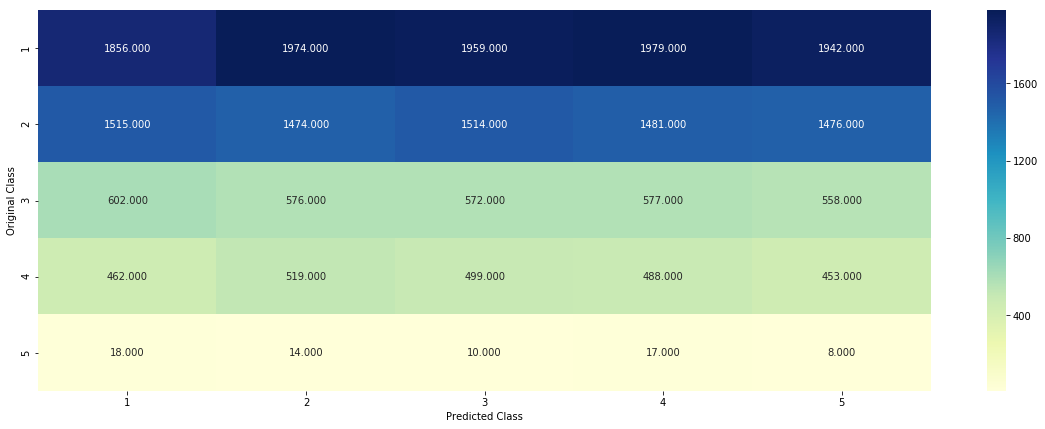

-------------------- Precision matrix (Columm Sum=1) --------------------


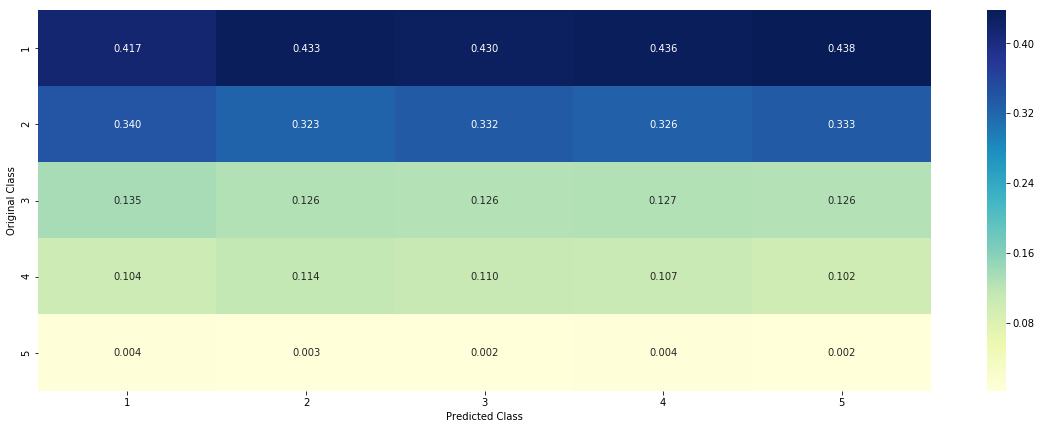

-------------------- Recall matrix (Row sum=1) --------------------


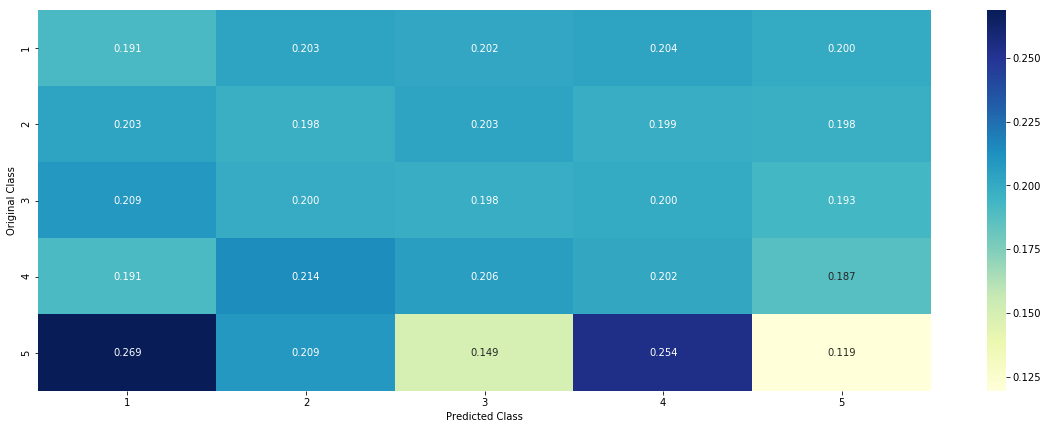

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(test_attacks_df.astype('int'), predicted_y+1)

In [34]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,6):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = df.loc[(df['attack_type']==k) & (df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 50*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    #      print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/5,1/5,1/5,1/5,1/5])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

In [35]:
import numpy as np

In [36]:
df['attack_type'].value_counts()

1    67343
2    45927
4    11656
3      995
5       52
Name: attack_type, dtype: int64

In [37]:
alpha=1
train_protocol_type_feature_responseCoding = np.array(get_gv_feature(alpha, "protocol_type",df))

In [38]:
type(train_protocol_type_feature_responseCoding)

numpy.ndarray

In [39]:
np.unique(train_protocol_type_feature_responseCoding)

array([9.73340212e-05, 5.74270725e-04, 6.64761018e-04, 8.64189324e-04,
       1.19889701e-03, 9.78206913e-03, 5.71058702e-02, 5.99614439e-02,
       1.11280994e-01, 3.42524877e-01, 4.10730102e-01, 4.96942813e-01])

In [40]:
len(train_protocol_type_feature_responseCoding)

125973

In [41]:
train_protocol_type_feature_responseCoding[:3]

array([[9.73340212e-05, 4.10730102e-01, 9.78206913e-03, 5.71058702e-02,
        5.74270725e-04],
       [6.64761018e-04, 5.99614439e-02, 6.64761018e-04, 1.11280994e-01,
        8.64189324e-04],
       [9.73340212e-05, 4.10730102e-01, 9.78206913e-03, 5.71058702e-02,
        5.74270725e-04]])

In [42]:
alpha=1
train_service_type_feature_responseCoding = np.array(get_gv_feature(alpha, "service",df))

In [43]:
alpha=1
train_flag_type_feature_responseCoding = np.array(get_gv_feature(alpha, "flag",df))

In [44]:
train_service_type_feature_responseCoding[:3]

array([[1.44717800e-03, 1.76410999e-01, 8.88567294e-02, 8.82778582e-03,
        3.18379161e-03],
       [2.26808800e-03, 1.54229984e-02, 3.40213200e-03, 3.85348152e-01,
        2.94851440e-03],
       [4.56558462e-04, 7.29626079e-01, 4.56558462e-04, 2.24170205e-01,
        4.56558462e-04]])

In [45]:
np.shape(train_flag_type_feature_responseCoding)

(125973, 5)

In [46]:
alpha=1
test_protocol_type_feature_responseCoding = np.array(get_gv_feature(alpha, "protocol_type",test_df))

In [47]:
alpha=1
test_service_type_feature_responseCoding = np.array(get_gv_feature(alpha, "service",test_df))

In [48]:
alpha=1
test_flag_type_feature_responseCoding = np.array(get_gv_feature(alpha, "flag",test_df))

In [49]:
np.shape(test_service_type_feature_responseCoding)

(22543, 5)

In [50]:
np.unique(test_flag_type_feature_responseCoding)

array([0.0025641 , 0.00484731, 0.00515947, 0.01128205, 0.01215067,
       0.01390821, 0.0145808 , 0.01947149, 0.03128205, 0.03344482,
       0.04617254, 0.04682274, 0.04764138, 0.07510431, 0.08130081,
       0.11913696, 0.12021328, 0.1349096 , 0.14084507, 0.15384615,
       0.15492958, 0.16923077, 0.1837309 , 0.18518519, 0.19230769,
       0.1971831 , 0.21126761, 0.21153846, 0.24435897, 0.24615385,
       0.25925926, 0.27692308, 0.29577465, 0.46051033, 0.46658566,
       0.64433128, 0.67479675, 0.71051282, 0.7566064 , 0.83946488,
       0.86524479])

In [51]:
test_flag_type_feature_responseCoding[:3]

array([[0.01128205, 0.71051282, 0.03128205, 0.24435897, 0.0025641 ],
       [0.01128205, 0.71051282, 0.03128205, 0.24435897, 0.0025641 ],
       [0.64433128, 0.11913696, 0.1837309 , 0.04764138, 0.00515947]])

In [52]:
test_protocol_type_feature_responseCoding[:3]

array([[0.41479134, 0.35657686, 0.12556788, 0.0989963 , 0.00406762],
       [0.41479134, 0.35657686, 0.12556788, 0.0989963 , 0.00406762],
       [0.41479134, 0.35657686, 0.12556788, 0.0989963 , 0.00406762]])

In [53]:
len(test_attacks_df)

22543

In [54]:
len(test_predicted_y)

22543

In [58]:
train_protocol_type_feature_responseCoding=pd.DataFrame(train_protocol_type_feature_responseCoding)

In [59]:
train_service_type_feature_responseCoding=pd.DataFrame(train_service_type_feature_responseCoding)

In [60]:
train_flag_type_feature_responseCoding=pd.DataFrame(train_flag_type_feature_responseCoding)

In [61]:
df_rc_train=pd.concat([df,train_protocol_type_feature_responseCoding],axis='columns')
df_rc_train =df_rc_train.drop(['protocol_type'],axis=1)

In [62]:
df_rc_train=pd.concat([df_rc_train,train_service_type_feature_responseCoding],axis='columns')
df_rc_train=df_rc_train.drop(['service'],axis=1)

In [63]:
df_rc_train=pd.concat([df_rc_train,train_flag_type_feature_responseCoding],axis='columns')
df_rc_train=df_rc_train.drop(['flag'],axis=1)

In [64]:
df_rc_train.shape

(125973, 56)

In [65]:
test_df.shape

(22543, 43)

In [66]:
df_rc_train.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0,1,2,3,4,0,1,2,3,4
0,0,0,491,0,0,0,0,0,0,0,...,0.001447,0.176411,0.088857,0.008828,0.003184,0.000133,0.061457,0.012601,0.079699,0.000813
1,1,0,146,0,0,0,0,0,0,0,...,0.002268,0.015423,0.003402,0.385348,0.002949,0.000133,0.061457,0.012601,0.079699,0.000813
2,2,0,0,0,0,0,0,0,0,0,...,0.000457,0.729626,0.000457,0.224170,0.000457,0.000287,0.984327,0.000287,0.004670,0.000287
3,3,0,232,8153,0,0,0,0,0,1,...,0.000248,0.056081,0.000347,0.000990,0.000248,0.000133,0.061457,0.012601,0.079699,0.000813
4,4,0,199,420,0,0,0,0,0,1,...,0.000248,0.056081,0.000347,0.000990,0.000248,0.000133,0.061457,0.012601,0.079699,0.000813


In [67]:
test_protocol_type_feature_responseCoding=pd.DataFrame(test_protocol_type_feature_responseCoding)

In [68]:
test_protocol_type_feature_responseCoding.shape

(22543, 5)

In [69]:
test_protocol_type_feature_responseCoding=pd.DataFrame(test_protocol_type_feature_responseCoding)

In [70]:
test_service_type_feature_responseCoding=pd.DataFrame(test_service_type_feature_responseCoding)

In [71]:
test_flag_type_feature_responseCoding=pd.DataFrame(test_flag_type_feature_responseCoding)

In [72]:
df_rc_test=pd.concat([test_df,test_protocol_type_feature_responseCoding],axis='columns')
df_rc_test =df_rc_test.drop(['protocol_type'],axis=1)

In [73]:
df_rc_test=pd.concat([df_rc_test,test_service_type_feature_responseCoding],axis='columns')
df_rc_test=df_rc_test.drop(['service'],axis=1)

In [74]:
df_rc_test=pd.concat([df_rc_test,test_flag_type_feature_responseCoding],axis='columns')
df_rc_test=df_rc_test.drop(['flag'],axis=1)

In [75]:
df_rc_test.shape

(22543, 55)

In [76]:
df_rc_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0,1,2,3,4,0,1,2,3,4
0,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
1,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
2,2,12983,0,0,0,0,0,0,0,0,...,0.366260,0.078801,0.514983,0.012209,0.027747,0.644331,0.119137,0.183731,0.047641,0.005159
3,0,20,0,0,0,0,0,0,0,0,...,0.115385,0.032051,0.032051,0.788462,0.032051,0.644331,0.119137,0.183731,0.047641,0.005159
4,1,0,15,0,0,0,0,0,0,0,...,0.032220,0.491647,0.244033,0.202864,0.029236,0.014581,0.466586,0.046173,0.460510,0.012151


In [77]:
df_rc_test[[0]].head(5)

,0,0,0
0,0.414791,0.178690,0.011282
1,0.414791,0.178690,0.011282
2,0.414791,0.366260,0.644331
3,0.094236,0.115385,0.644331
4,0.414791,0.032220,0.014581


<h2>One hot encodind the test dataset</h2>

In [69]:
dummies = pd.get_dummies(test_df.protocol_type)

In [70]:
print(dummies.head())

   icmp  tcp  udp
0     0    1    0
1     0    1    0
2     0    1    0
3     1    0    0
4     0    1    0


In [71]:
df_dummies= pd.concat([df,dummies],axis='columns')

In [72]:
df_dummies.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,dont_know,icmp,tcp,udp
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.00,0.00,0.00,0.05,0.00,1,20,0.0,1.0,0.0
1,1,0,udp,other,SF,146,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1,15,0.0,1.0,0.0
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,2,19,0.0,1.0,0.0
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.04,0.03,0.01,0.00,0.01,1,21,1.0,0.0,0.0
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1,21,0.0,1.0,0.0


In [73]:
dummies_1 = pd.get_dummies(test_df.service)

In [74]:
dummies_1.head()

,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,...,supdup,systat,telnet,tim_i,time,urp_i,uucp,uucp_path,vmnet,whois
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
df_dummies= pd.concat([test_df,dummies_1],axis='columns')

In [76]:
df_dummies.drop('service',axis='columns',inplace=True)
df_dummies.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,supdup,systat,telnet,tim_i,time,urp_i,uucp,uucp_path,vmnet,whois
0,0,tcp,REJ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,tcp,REJ,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,tcp,SF,12983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,icmp,SF,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,tcp,RSTO,0,15,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
dummies_2 = pd.get_dummies(test_df.flag)

In [78]:
print(dummies_2.head())

   OTH  REJ  RSTO  RSTOS0  RSTR  S0  S1  S2  S3  SF  SH
0    0    1     0       0     0   0   0   0   0   0   0
1    0    1     0       0     0   0   0   0   0   0   0
2    0    0     0       0     0   0   0   0   0   1   0
3    0    0     0       0     0   0   0   0   0   1   0
4    0    0     1       0     0   0   0   0   0   0   0


In [79]:
df_dummies= pd.concat([df_dummies,dummies_2],axis='columns')

In [80]:
df_dummies.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,tcp,REJ,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,tcp,REJ,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,tcp,SF,12983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,icmp,SF,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,tcp,RSTO,0,15,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [81]:
df_dummies.drop('protocol_type',axis='columns',inplace=True)

In [82]:
df_dummies.head(5)

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,REJ,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,REJ,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,SF,12983,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,SF,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,RSTO,0,15,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [83]:
df_dummies.drop('flag',axis='columns',inplace=True)

In [84]:
df_dummies.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,15,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [85]:
df_dummies.shape

(22543, 114)

In [86]:
test_df['attack_type'].shape

(22543,)

Thus any model which has better precision,recall and log-loss will be better than a baseline model

In [87]:
df_ohe_test=df_dummies

In [89]:
df_y_test=test_df['attack_type']

In [90]:
df_y_test.shape

(22543,)

In [90]:
df_ohe_test.shape

(22543, 114)

In [91]:
df_ohe_train.head(5)

NameError: name 'df_ohe_train' is not defined

<h2>Saving up intermediate files</h2>

In [ ]:
df_ohe_train.drop('dont_know',axis='columns',inplace=True)

In [223]:
df_ohe_test.drop('dont_know',axis='columns',inplace=True)

In [219]:
df_rc_train.drop('dont_know',axis='columns',inplace=True)

In [84]:
df_rc_test.drop('dont_know',axis='columns',inplace=True)

In [271]:
df_ohe_train.to_csv('df_ohe_train.csv')

In [272]:
df_ohe_test.to_csv('df_ohe_test.csv')

In [ ]:
df_rc_train.to_csv('df_rc_train.csv')

In [85]:
df_rc_test.to_csv('df_rc_test.csv')

In [227]:
df_y_train.to_csv('df_y_train.csv')

In [228]:
df_y_test.to_csv('df_y_test.csv')

In [ ]:
df_y_train=pd.read_csv(r'df_y_train.csv')
df_y_test=pd.read_csv(r'df_y_test.csv')

In [66]:
import pandas as pd
df_rc_train=pd.read_csv(r'df_rc_train.csv')

In [78]:
df_rc_train.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0,1,2,3,4,0,1,2,3,4
0,0,0,491,0,0,0,0,0,0,0,...,0.001447,0.176411,0.088857,0.008828,0.003184,0.000133,0.061457,0.012601,0.079699,0.000813
1,1,0,146,0,0,0,0,0,0,0,...,0.002268,0.015423,0.003402,0.385348,0.002949,0.000133,0.061457,0.012601,0.079699,0.000813
2,2,0,0,0,0,0,0,0,0,0,...,0.000457,0.729626,0.000457,0.224170,0.000457,0.000287,0.984327,0.000287,0.004670,0.000287
3,3,0,232,8153,0,0,0,0,0,1,...,0.000248,0.056081,0.000347,0.000990,0.000248,0.000133,0.061457,0.012601,0.079699,0.000813
4,4,0,199,420,0,0,0,0,0,1,...,0.000248,0.056081,0.000347,0.000990,0.000248,0.000133,0.061457,0.012601,0.079699,0.000813


In [79]:
df_rc_test=pd.read_csv(r'df_rc_test.csv')
df_rc_test.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
1,1,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
2,2,2,12983,0,0,0,0,0,0,0,...,0.366260,0.078801,0.514983,0.012209,0.027747,0.644331,0.119137,0.183731,0.047641,0.005159
3,3,0,20,0,0,0,0,0,0,0,...,0.115385,0.032051,0.032051,0.788462,0.032051,0.644331,0.119137,0.183731,0.047641,0.005159
4,4,1,0,15,0,0,0,0,0,0,...,0.032220,0.491647,0.244033,0.202864,0.029236,0.014581,0.466586,0.046173,0.460510,0.012151


In [80]:
df_rc_test['attack_type']=df_y_test

NameError: name 'df_y_test' is not defined

In [81]:
df_rc_test.columns

Index(['Unnamed: 0', 'duration', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', '0',
       '1', '2', '3', '4', '0.1', '1.1', '2.1', '3.1', '4.1', '0.2', '1.2',
       '2.2', '3.2', '4.2'],
      dtype='object')

In [82]:
df_rc_test.drop('Unnamed: 0',axis=1,inplace=True)
df_rc_test.drop('num_outbound_cmds',axis=1,inplace=True)

In [83]:
df_rc_train.drop('num_outbound_cmds',axis=1,inplace=True)

In [84]:
df_rc_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
1,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
2,2,12983,0,0,0,0,0,0,0,0,...,0.366260,0.078801,0.514983,0.012209,0.027747,0.644331,0.119137,0.183731,0.047641,0.005159
3,0,20,0,0,0,0,0,0,0,0,...,0.115385,0.032051,0.032051,0.788462,0.032051,0.644331,0.119137,0.183731,0.047641,0.005159
4,1,0,15,0,0,0,0,0,0,0,...,0.032220,0.491647,0.244033,0.202864,0.029236,0.014581,0.466586,0.046173,0.460510,0.012151


In [85]:
print(list(set(df_rc_train.columns)-set(df_rc_test.columns)))

[0, 1, 2, 3, 4, 'Unnamed: 0', 'dont_know']


In [86]:
df_rc_train.shape

(125973, 55)

In [87]:
df_rc_train.columns

Index([                 'Unnamed: 0',                    'duration',
                         'src_bytes',                   'dst_bytes',
                              'land',              'wrong_fragment',
                            'urgent',                         'hot',
                 'num_failed_logins',                   'logged_in',
                   'num_compromised',                  'root_shell',
                      'su_attempted',                    'num_root',
                'num_file_creations',                  'num_shells',
                  'num_access_files',               'is_host_login',
                    'is_guest_login',                       'count',
                         'srv_count',                 'serror_rate',
                   'srv_serror_rate',                 'rerror_rate',
                   'srv_rerror_rate',               'same_srv_rate',
                     'diff_srv_rate',          'srv_diff_host_rate',
                    'dst_host_coun

In [88]:
df_rc_train.drop(['Unnamed: 0'],axis=1,inplace = True)

In [90]:
df_rc_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0,1,2,3,4,0,1,2,3,4
0,0,491,0,0,0,0,0,0,0,0,...,0.001447,0.176411,0.088857,0.008828,0.003184,0.000133,0.061457,0.012601,0.079699,0.000813
1,0,146,0,0,0,0,0,0,0,0,...,0.002268,0.015423,0.003402,0.385348,0.002949,0.000133,0.061457,0.012601,0.079699,0.000813
2,0,0,0,0,0,0,0,0,0,0,...,0.000457,0.729626,0.000457,0.224170,0.000457,0.000287,0.984327,0.000287,0.004670,0.000287
3,0,232,8153,0,0,0,0,0,1,0,...,0.000248,0.056081,0.000347,0.000990,0.000248,0.000133,0.061457,0.012601,0.079699,0.000813
4,0,199,420,0,0,0,0,0,1,0,...,0.000248,0.056081,0.000347,0.000990,0.000248,0.000133,0.061457,0.012601,0.079699,0.000813


In [91]:
print(df_rc_train.columns)
df_rc_test.columns

Index([                   'duration',                   'src_bytes',
                         'dst_bytes',                        'land',
                    'wrong_fragment',                      'urgent',
                               'hot',           'num_failed_logins',
                         'logged_in',             'num_compromised',
                        'root_shell',                'su_attempted',
                          'num_root',          'num_file_creations',
                        'num_shells',            'num_access_files',
                     'is_host_login',              'is_guest_login',
                             'count',                   'srv_count',
                       'serror_rate',             'srv_serror_rate',
                       'rerror_rate',             'srv_rerror_rate',
                     'same_srv_rate',               'diff_srv_rate',
                'srv_diff_host_rate',              'dst_host_count',
                'dst_host_srv_coun

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', '0',
       '1', '2', '3', '4', '0.1', '1.1', '2.1', '3.1', '4.1', '0.2', '1.2',
       '2.2', '3.2', '4.2'],
      dtype='object')

In [92]:
df_rc_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
1,0,0,0,0,0,0,0,0,0,0,...,0.178690,0.604478,0.105307,0.109453,0.002073,0.011282,0.710513,0.031282,0.244359,0.002564
2,2,12983,0,0,0,0,0,0,0,0,...,0.366260,0.078801,0.514983,0.012209,0.027747,0.644331,0.119137,0.183731,0.047641,0.005159
3,0,20,0,0,0,0,0,0,0,0,...,0.115385,0.032051,0.032051,0.788462,0.032051,0.644331,0.119137,0.183731,0.047641,0.005159
4,1,0,15,0,0,0,0,0,0,0,...,0.032220,0.491647,0.244033,0.202864,0.029236,0.014581,0.466586,0.046173,0.460510,0.012151


In [93]:
df_rc_train = df_rc_train[~df_rc_train.index.duplicated()]

In [94]:
df_rc_train['src_bytes']=(df_rc_train['src_bytes']-df_rc_train['src_bytes'].min())/(df_rc_train['src_bytes'].max()-df_rc_train['src_bytes'].min())

In [ ]:
df_rc_train[df_rc_train.columns]=(df_rc_train[df_rc_train.columns]-df_rc_train[df_rc_train.columns].min())/(df_rc_train[df_rc_train.columns].max()-df_rc_train[df_rc_train.columns].min())

In [80]:
df_rc_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.723589,0.185912,0.452201,0.008874,0.014994,0.945055,0.03406,0.093983,0.085104,0.005072
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591588,0.015189,0.015611,0.435199,0.013792,0.945055,0.03406,0.093983,0.085104,0.005072
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034896,0.772579,0.000562,0.252701,0.001067,0.000000,1.00000,0.000000,0.000000,0.000000
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072


In [81]:
df_rc_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.006692,3.302024e-05,1.509928e-05,0.000198,0.007562,0.000037,0.002655,0.000244,0.395736,0.000037,...,0.532657,0.372877,0.060167,0.107009,0.022998,0.592519,0.351093,0.063282,0.099047,0.008112
std,0.060700,4.253974e-03,3.069818e-03,0.014086,0.084510,0.004789,0.027922,0.009048,0.489010,0.003201,...,0.430519,0.392037,0.148270,0.207933,0.046157,0.436291,0.428212,0.059524,0.153777,0.041422
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034896,0.058306,0.000000,0.000000,0.000000,0.000000,0.034060,0.000000,0.000000,0.000000
50%,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.723589,0.058306,0.003848,0.008874,0.004351,0.945055,0.034060,0.093983,0.085104,0.005072
75%,0.000000,2.000052e-07,3.939120e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.946854,0.772579,0.059784,0.108656,0.015066,0.945055,1.000000,0.093983,0.085104,0.005072
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df_rc_train[df_rc_train.index.duplicated()]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0,1,2,3,4,0,1,2,3,4


In [21]:
df_rc_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.006692,3.302024e-05,1.509928e-05,0.000198,0.007562,0.000037,0.002655,0.000244,0.395736,0.000037,...,0.532657,0.372877,0.060167,0.107009,0.022998,0.592519,0.351093,0.063282,0.099047,0.008112
std,0.060700,4.253974e-03,3.069818e-03,0.014086,0.084510,0.004789,0.027922,0.009048,0.489010,0.003201,...,0.430519,0.392037,0.148270,0.207933,0.046157,0.436291,0.428212,0.059524,0.153777,0.041422
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034896,0.058306,0.000000,0.000000,0.000000,0.000000,0.034060,0.000000,0.000000,0.000000
50%,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.723589,0.058306,0.003848,0.008874,0.004351,0.945055,0.034060,0.093983,0.085104,0.005072
75%,0.000000,2.000052e-07,3.939120e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.946854,0.772579,0.059784,0.108656,0.015066,0.945055,1.000000,0.093983,0.085104,0.005072
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
df_rc_test[df_rc_test.columns]=(df_rc_test[df_rc_test.columns]-df_rc_test[df_rc_test.columns].min())/(df_rc_test[df_rc_test.columns].max()-df_rc_test[df_rc_test.columns].min())

In [93]:
df_rc_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.172427,0.677996,0.126274,0.137018,0.004555,0.010062,0.802624,0.128063,0.328859,0.000000
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.172427,0.677996,0.126274,0.137018,0.004555,0.010062,0.802624,0.128063,0.328859,0.000000
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.372252,0.077868,0.624705,0.013426,0.149355,1.000000,0.048264,0.866599,0.022135,0.013678
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.104985,0.024497,0.037148,1.000000,0.173632,1.000000,0.048264,0.866599,0.022135,0.013678
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016386,0.549185,0.295055,0.255738,0.157755,0.015221,0.491470,0.200199,0.665883,0.050524


In [94]:
df_rc_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,22543.000000,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,0.003792,1.654724e-04,0.001528,0.000311,0.002809,0.000237,0.001044,0.005412,0.442222,0.000151,...,0.444728,0.333622,0.162373,0.139885,0.084209,0.667204,0.311579,0.607718,0.114082,0.018217
std,0.024382,7.525540e-03,0.015766,0.017619,0.047534,0.012158,0.009193,0.037583,0.496661,0.009133,...,0.381507,0.278817,0.256449,0.235506,0.167549,0.464185,0.380073,0.364563,0.163459,0.044936
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.094202,0.159086,0.000000,0.000000,0.000000,0.010062,0.048264,0.128063,0.022135,0.012033
50%,0.000000,8.595216e-07,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.172427,0.159086,0.063564,0.018511,0.004555,1.000000,0.048264,0.866599,0.022135,0.013678
75%,0.000000,4.568198e-06,0.000447,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.882941,0.648850,0.146524,0.137018,0.063187,1.000000,0.802624,0.866599,0.135290,0.013678
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
df_rc_test['attack_type'].describe()

count     22543
unique        5
top           1
freq       9710
Name: attack_type, dtype: int64

In [27]:
print(df_rc_train.shape)

(125973, 53)


In [85]:
df_rc_train['attack_type']=df_y_train

In [86]:
df_rc_train.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', '0',
       '1', '2', '3', '4', '0.1', '1.1', '2.1', '3.1', '4.1', '0.2', '1.2',
       '2.2', '3.2', '4.2'],
      dtype='object')

<h2>Final Intermediate Files</h2>

In [87]:
df_rc_train.to_csv('df_rc_train_final.csv')

In [97]:
df_rc_test.to_csv('df_rc_test_final.csv')

In [99]:
df_rc_train.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', '0',
       '1', '2', '3', '4', '0.1', '1.1', '2.1', '3.1', '4.1', '0.2', '1.2',
       '2.2', '3.2', '4.2'],
      dtype='object')

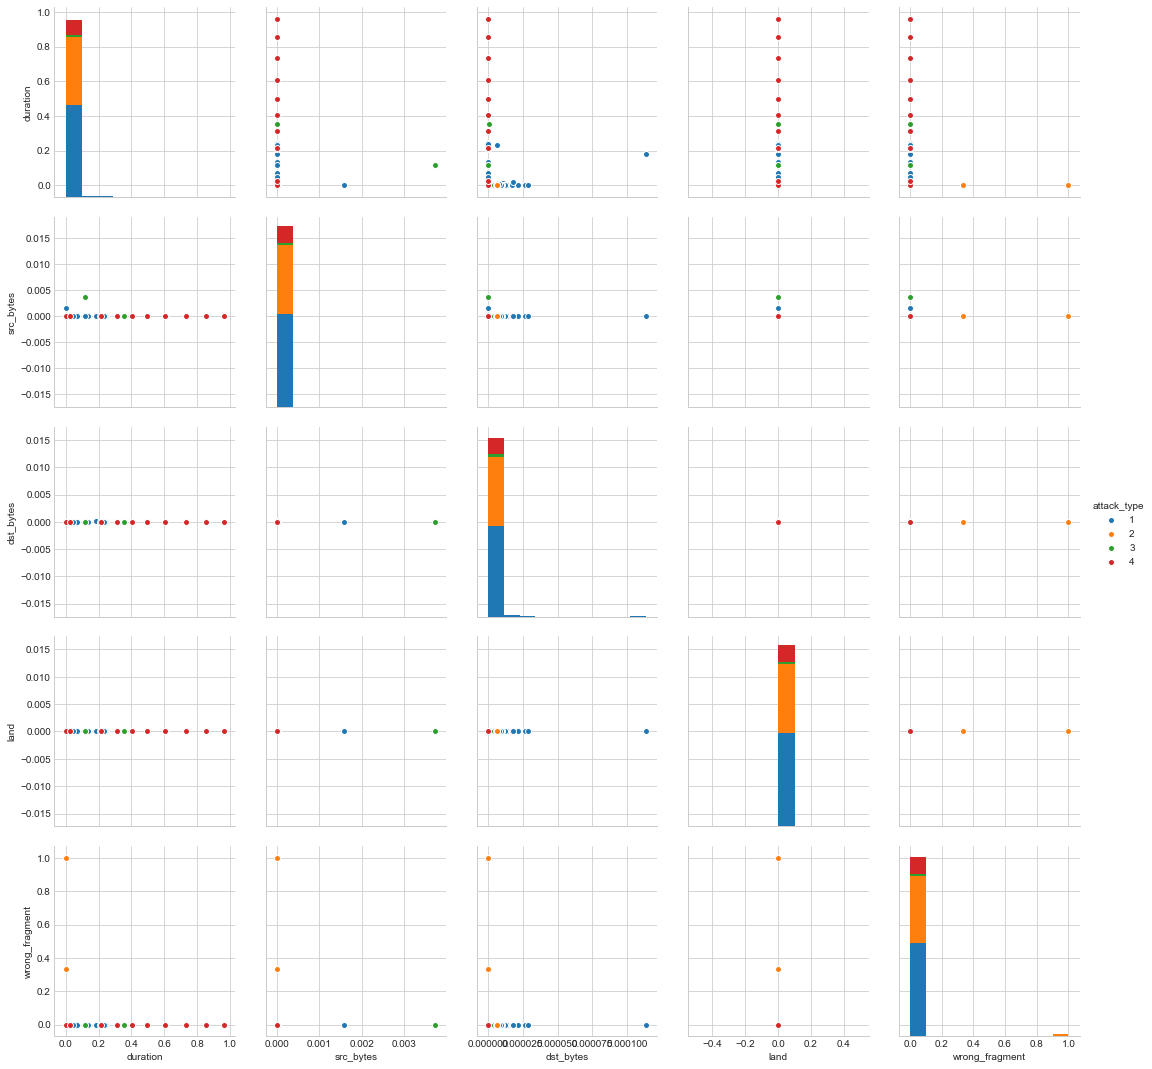

In [31]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=["duration", "src_bytes","dst_bytes",'land','wrong_fragment'],size=3);

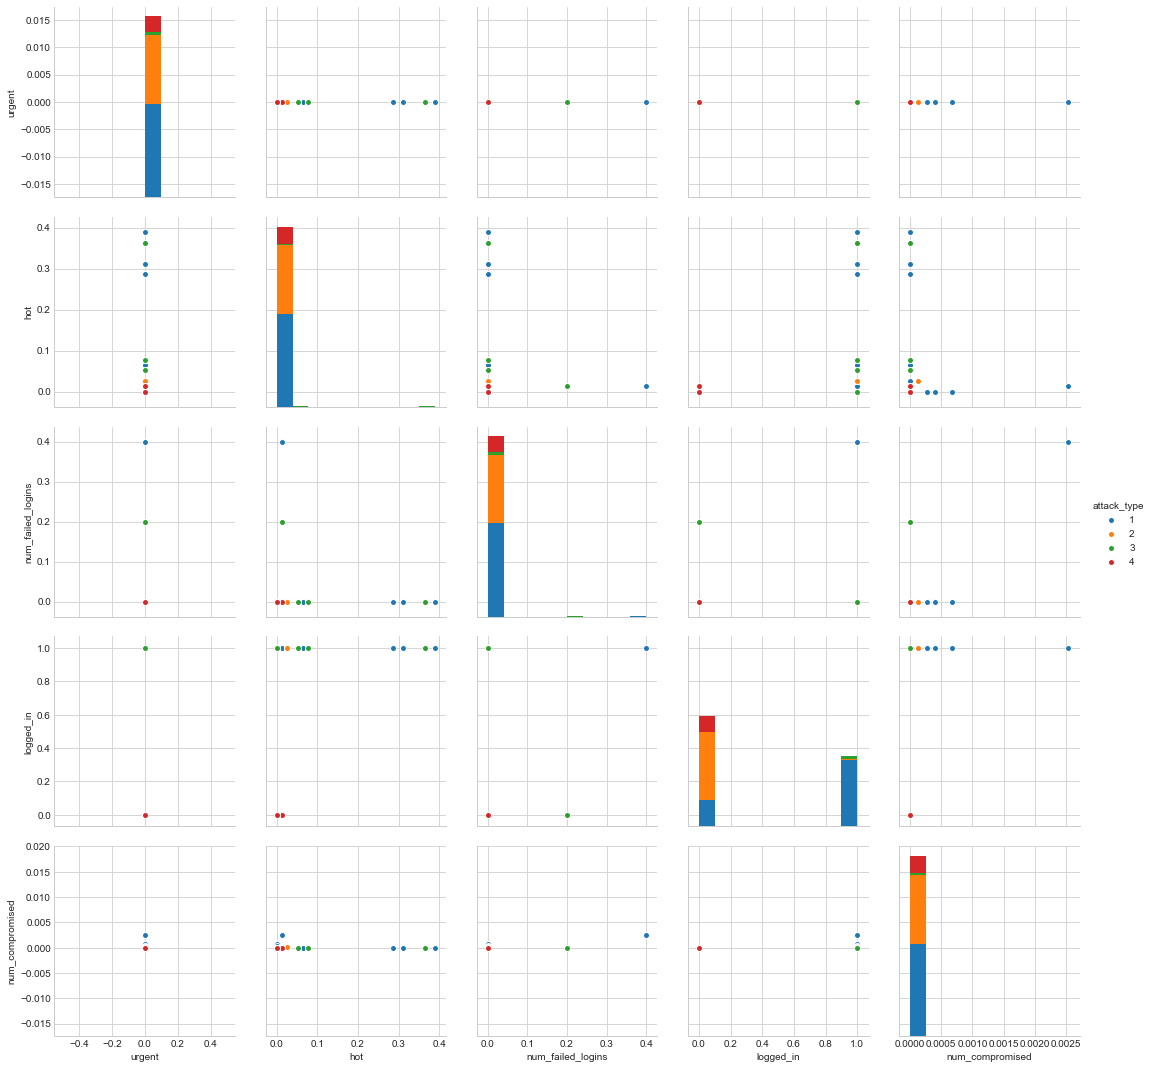

In [33]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=['urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised'],size=3);

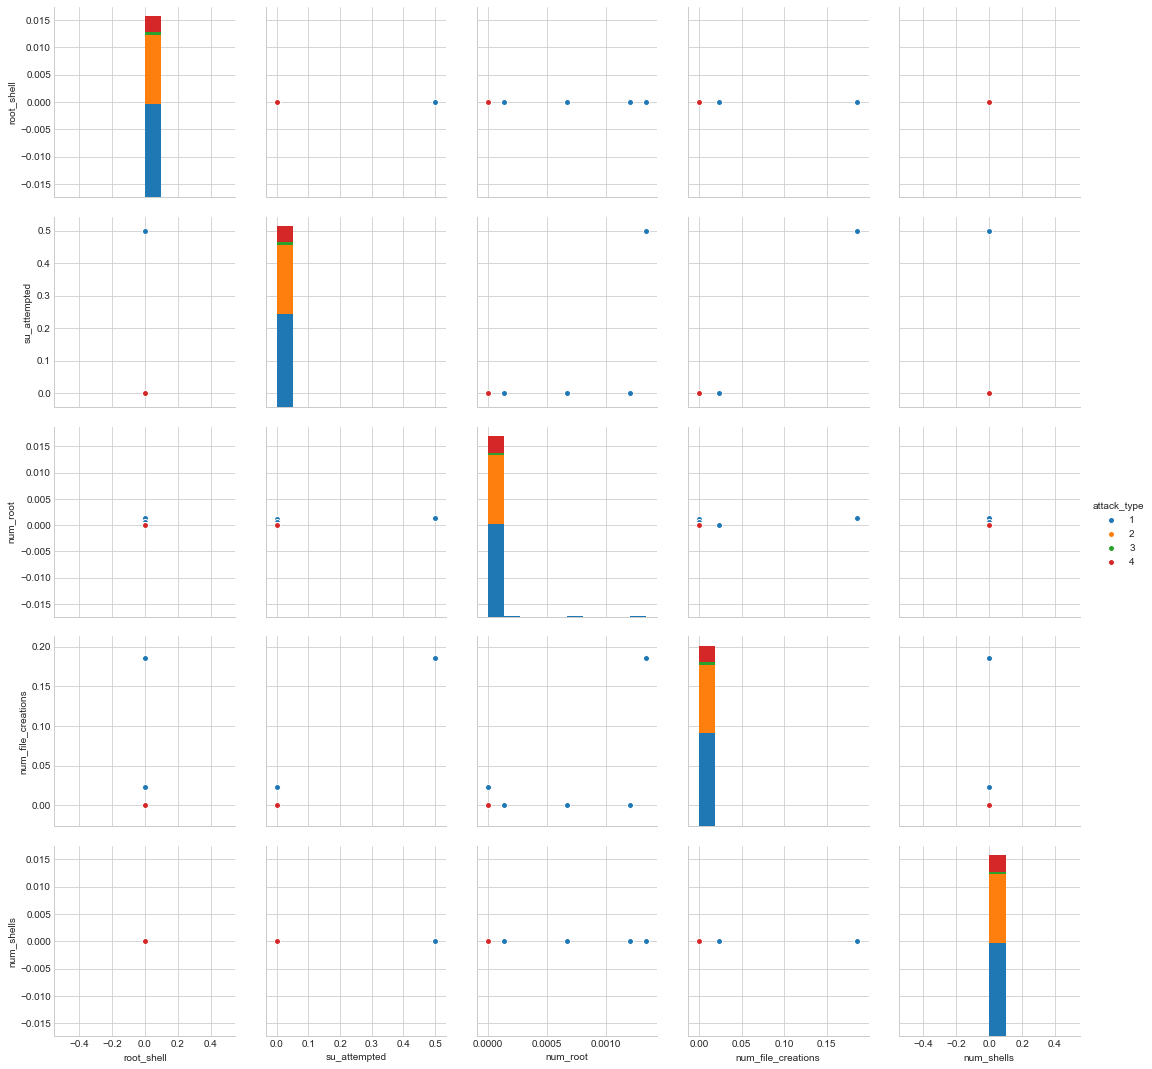

In [34]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=['root_shell', 'su_attempted', 'num_root', 'num_file_creations','num_shells'],size=3);

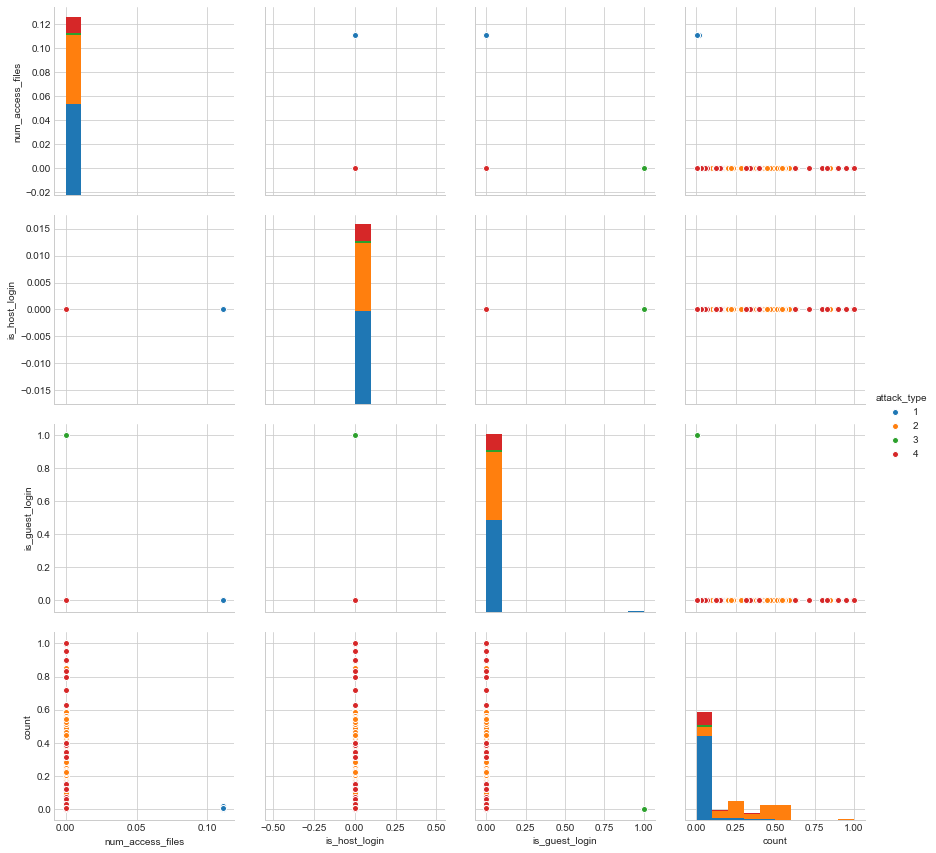

In [37]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=['num_access_files', 'is_host_login','is_guest_login', 'count'],size=3);

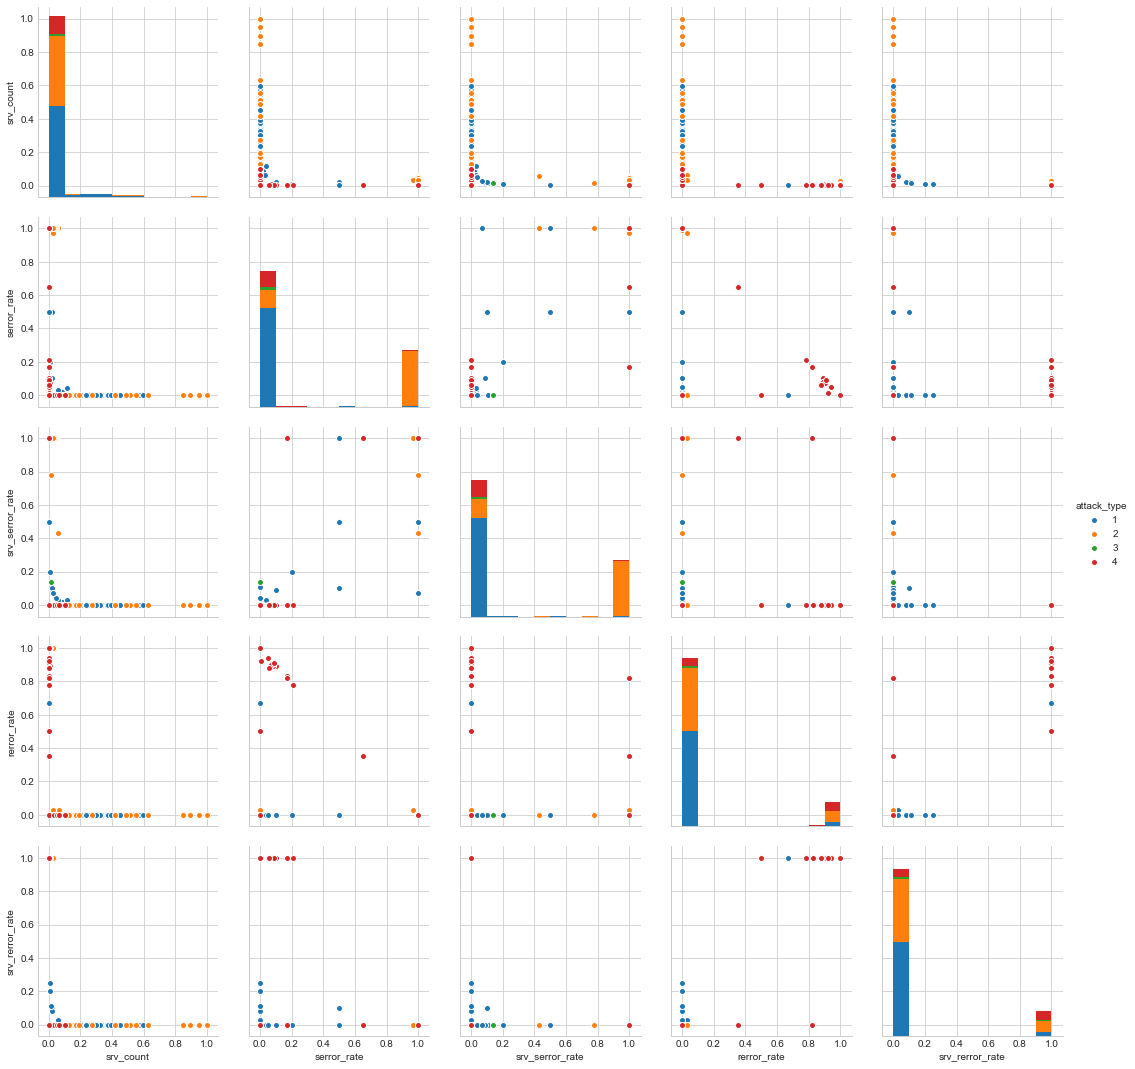

In [38]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=['srv_count', 'serror_rate','srv_serror_rate', 'rerror_rate', 'srv_rerror_rate'],size=3);

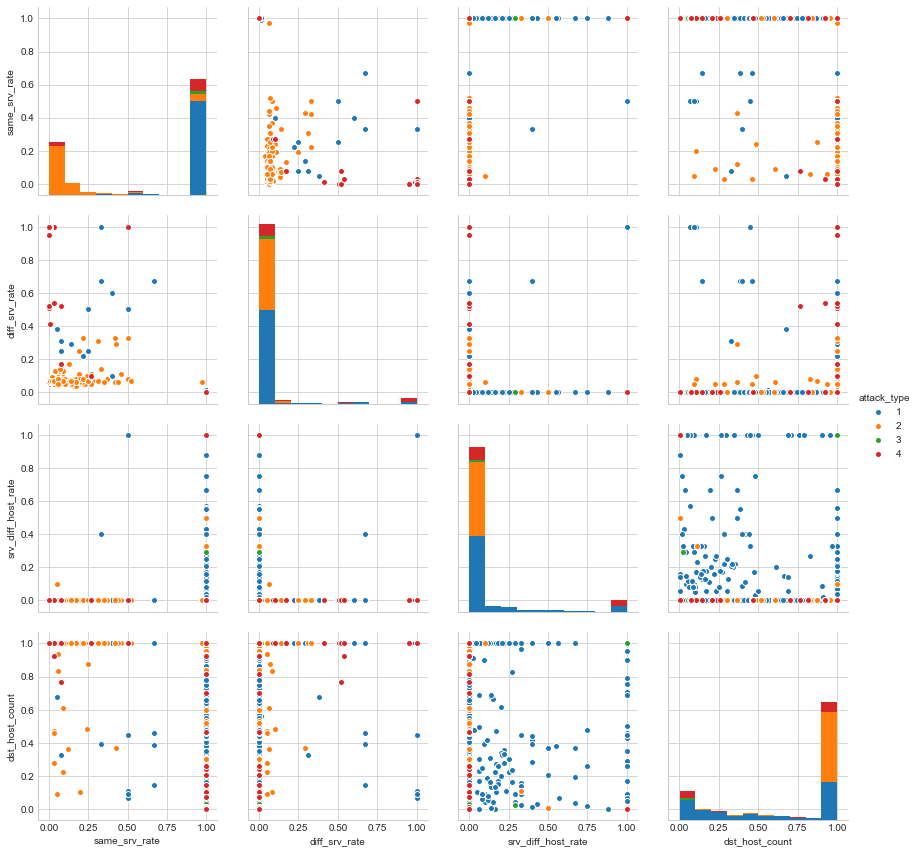

In [39]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=['same_srv_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count'],size=3);

In [ ]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df_rc_train[:1000], hue="attack_type",vars=['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', '0', '1', '2', '3', '4',
       '0.1', '1.1', '2.1', '3.1', '4.1', '0.2', '1.2', '2.2', '3.2', '4.2'],size=3);

In [24]:
df_y_train.head(5)

0    1
1    1
2    2
3    1
4    1
Name: attack_type, dtype: object

In [28]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [67]:
df.to_csv(r'for_attacks.csv')

In [29]:
import pandas as pd
df=pd.read_csv(r'for_attacks.csv')

In [30]:
df['attack_type'].head(5)

0    1
1    1
2    2
3    1
4    1
Name: attack_type, dtype: int64

In [32]:
df_y_train=df['attack_type'][:70000]
df_y_cv=df['attack_type'][70000:]

In [33]:
df_y_train.head(5)

0    1
1    1
2    2
3    1
4    1
Name: attack_type, dtype: int64

In [34]:
df_y_test.head(5)

70000    2
70001    1
70002    3
70003    1
70004    1
Name: attack_type, dtype: int64

In [35]:
df_rc_train.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.723589,0.185912,0.452201,0.008874,0.014994,0.945055,0.03406,0.093983,0.085104,0.005072
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591588,0.015189,0.015611,0.435199,0.013792,0.945055,0.03406,0.093983,0.085104,0.005072
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034896,0.772579,0.000562,0.252701,0.001067,0.000000,1.00000,0.000000,0.000000,0.000000
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072


In [55]:
df_rc_train.drop('num_outbound_cmds',axis=1,inplace=True)

In [36]:
train_df=df_rc_train.iloc[:70000]
cv_df=df_rc_train[70000:]

In [37]:
df['attack_type'].head(5)

0    1
1    1
2    2
3    1
4    1
Name: attack_type, dtype: int64

<h2>Logistic Regression</h2>

In [ ]:
#Reference:Some of the snippets are refered from previous assignments

<h3>Without Class Balancing</h3>

for alpha = 1e-06
Log Loss : 0.014175309575816596
for alpha = 1e-05
Log Loss : 0.0092784584988043
for alpha = 0.0001
Log Loss : 0.021328394911407332
for alpha = 0.001
Log Loss : 0.06421897206507696
for alpha = 0.01
Log Loss : 0.11146102117361616
for alpha = 0.1
Log Loss : 0.19358204317933553
for alpha = 1
Log Loss : 0.2516434601488725


Text(0,0.5,'Error measure')

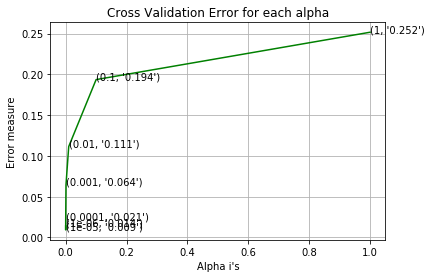

In [63]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,df['attack_type'][:70000])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,df['attack_type'][70000:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(df['attack_type'][70000:],sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(df['attack_type'][70000:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")

In [80]:
best_alpha=1e-05

In [81]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)

In [82]:
%%time
clf.fit(train_df,df['attack_type'][:70000])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,df['attack_type'][:70000])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(test_df['attack_type'].astype('int'),sig_clf.predict_proba(df_rc_test),eps=1e-15))

Log loss : 0.6616801123041448
Wall time: 4.93 s


-------------------- Confusion matrix --------------------


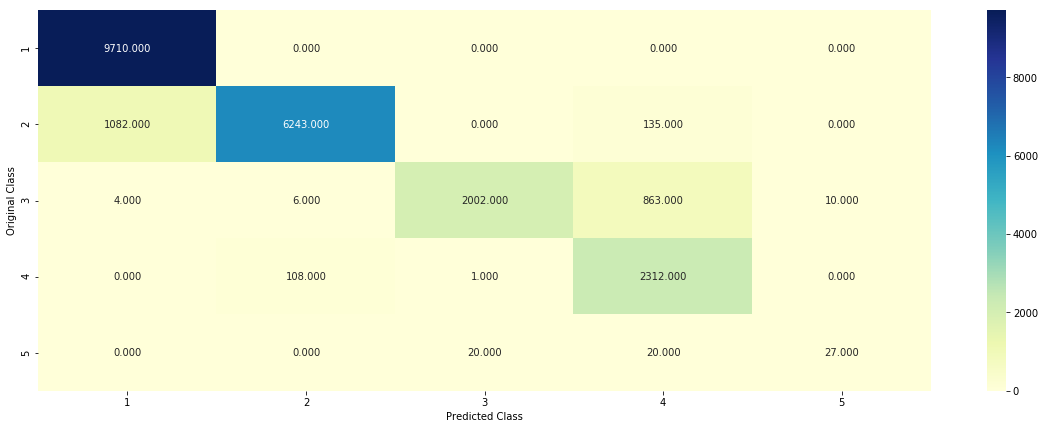

-------------------- Precision matrix (Columm Sum=1) --------------------


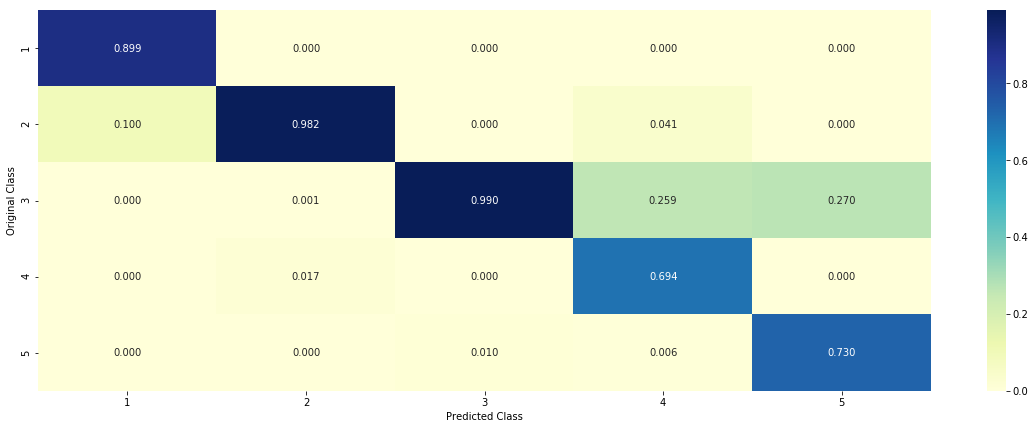

-------------------- Recall matrix (Row sum=1) --------------------


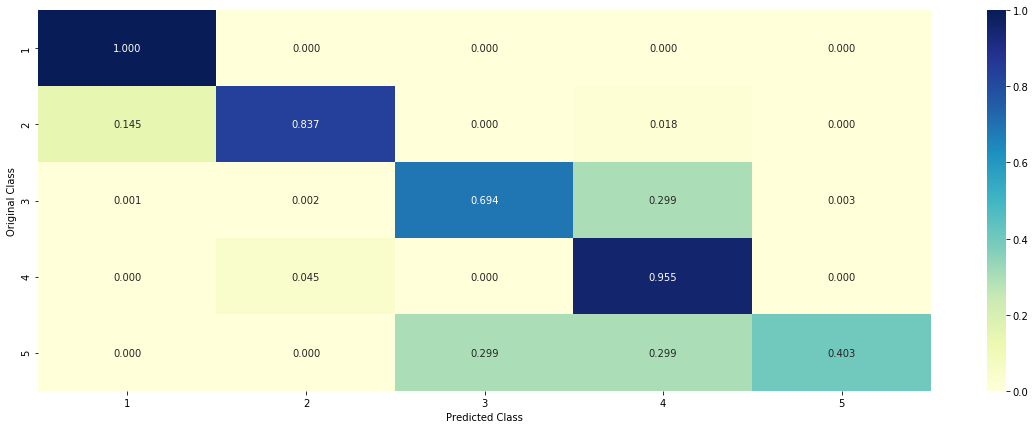

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(test_df['attack_type'].astype('int'), predicted_y+1)

<h2>With Class Balancing</h2>

In [84]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,df['attack_type'][:70000])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,df['attack_type'][70000:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(df['attack_type'][70000:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss for cv :",log_loss(df['attack_type'][70000:], sig_clf_probs)) 

for alpha = 1e-06
Log Loss for cv : 0.015622091109187107
for alpha = 1e-05
Log Loss for cv : 0.011303033644959066
for alpha = 0.0001
Log Loss for cv : 0.029405696996141432
for alpha = 0.001
Log Loss for cv : 0.06506128214513744
for alpha = 0.01
Log Loss for cv : 0.10638292058846285
for alpha = 0.1
Log Loss for cv : 0.1657041831841557
for alpha = 1
Log Loss for cv : 0.21390517243794152
for alpha = 10
Log Loss for cv : 0.2714337553570437
for alpha = 100
Log Loss for cv : 0.29700810986984283


In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

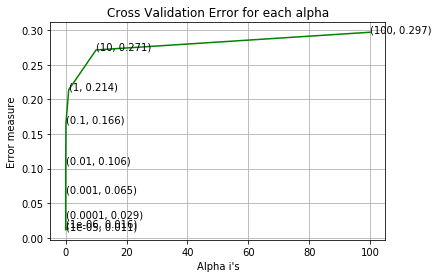

In [86]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [94]:
best_alpha=1e-05

In [95]:
test_df.shape

(22543, 43)

In [96]:
df_rc_test.shape

(22543, 53)

In [97]:
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)

In [98]:
%%time
clf.fit(train_df,df['attack_type'][:70000])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,df['attack_type'][:70000])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(test_df['attack_type'].astype('int'),sig_clf.predict_proba(df_rc_test),eps=1e-15))

Log loss : 0.6360215511785005
Wall time: 4.43 s


-------------------- Confusion matrix --------------------


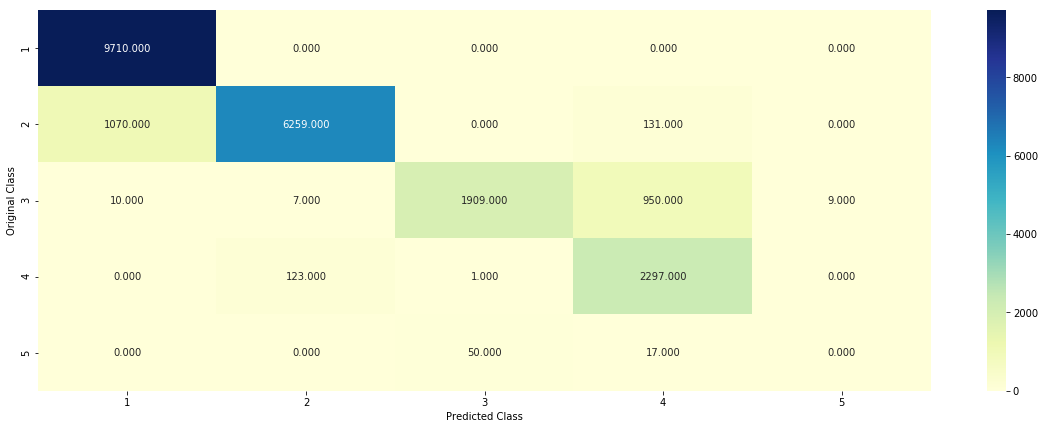

-------------------- Precision matrix (Columm Sum=1) --------------------


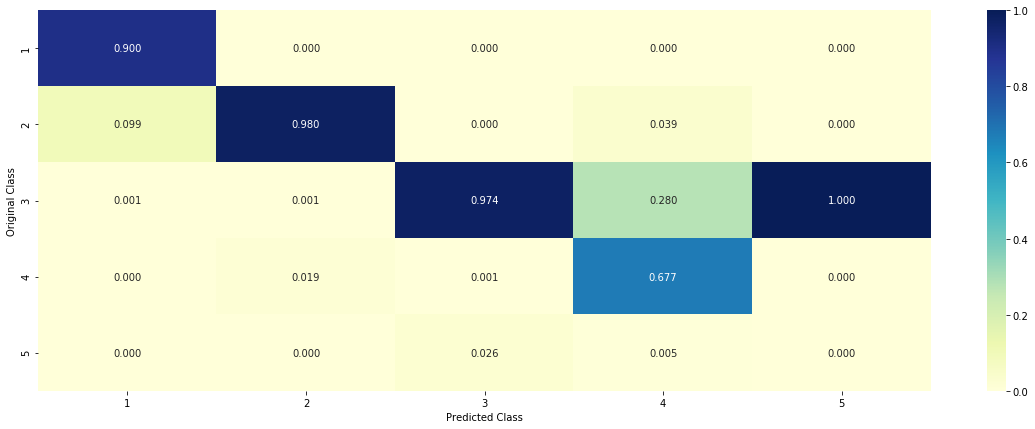

-------------------- Recall matrix (Row sum=1) --------------------


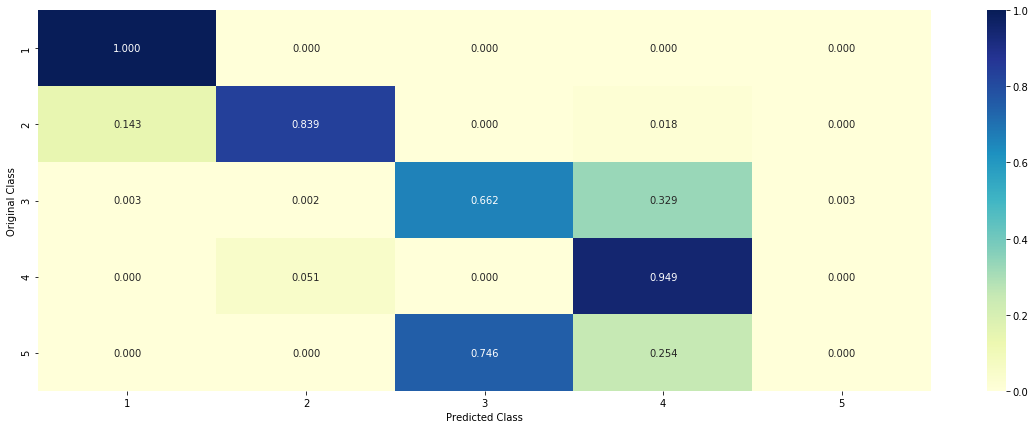

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(test_df['attack_type'].astype('int'), predicted_y+1)

In [92]:
pred_y[:10]

array([[1.78106182e-02, 6.07197612e-01, 9.51728516e-03, 3.64803790e-01,
        6.70694130e-04],
       [1.82698470e-02, 5.90202017e-01, 9.68669278e-03, 3.81136648e-01,
        7.04795146e-04],
       [7.86621281e-01, 8.10428003e-02, 1.43196424e-02, 1.17085002e-01,
        9.31274261e-04],
       [5.29315513e-01, 4.88594138e-02, 1.19201067e-02, 4.08868273e-01,
        1.03669348e-03],
       [1.45840346e-01, 3.97843936e-01, 1.24259684e-02, 4.42904542e-01,
        9.85207090e-04],
       [9.78281631e-01, 7.23025296e-03, 7.77447925e-03, 6.36251818e-03,
        3.51118857e-04],
       [9.04972266e-01, 4.79084324e-02, 1.05564122e-02, 3.60195106e-02,
        5.43378802e-04],
       [8.87903115e-01, 6.59314533e-02, 1.08463216e-02, 3.47457937e-02,
        5.73316406e-04],
       [9.78349504e-01, 7.19230787e-03, 7.74441749e-03, 6.36457877e-03,
        3.49191377e-04],
       [5.93109471e-01, 1.48449317e-01, 1.71755606e-02, 2.39887113e-01,
        1.37853860e-03]])

<h2>Linear Support Vector Machines</h2>

for C = 1e-05
Log Loss : 0.010742325272486102
for C = 0.0001
Log Loss : 0.013609273363849409
for C = 0.001
Log Loss : 0.03521230003643598
for C = 0.01
Log Loss : 0.06951192631539556
for C = 0.1
Log Loss : 0.11801664955663968
for C = 1
Log Loss : 0.1614495742823312
for C = 10
Log Loss : 0.21894684243203033
for C = 100
Log Loss : 0.3074785131029924


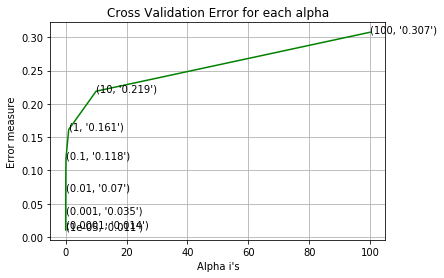

In [104]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df,df['attack_type'][:70000])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,df['attack_type'][70000:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(df['attack_type'][70000:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(df['attack_type'][70000:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [105]:
best_alpha=1e-05

Log loss : 0.8806638983746288
-------------------- Confusion matrix --------------------


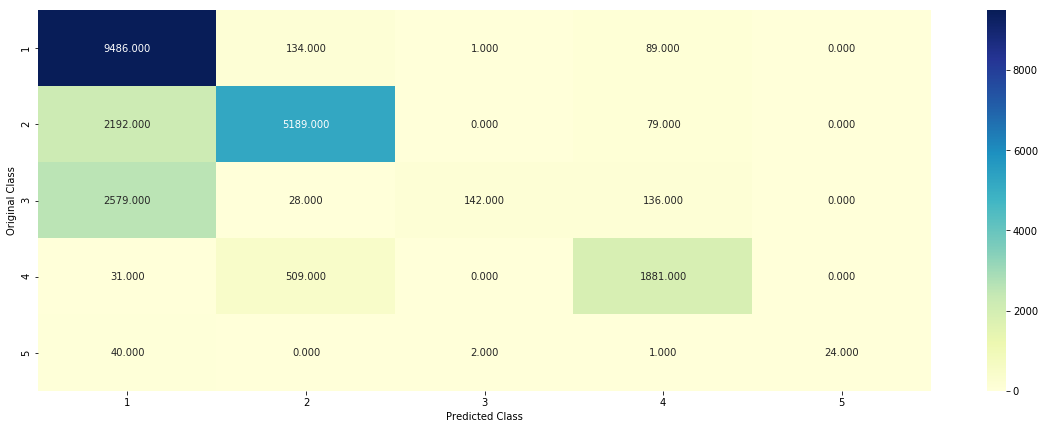

-------------------- Precision matrix (Columm Sum=1) --------------------


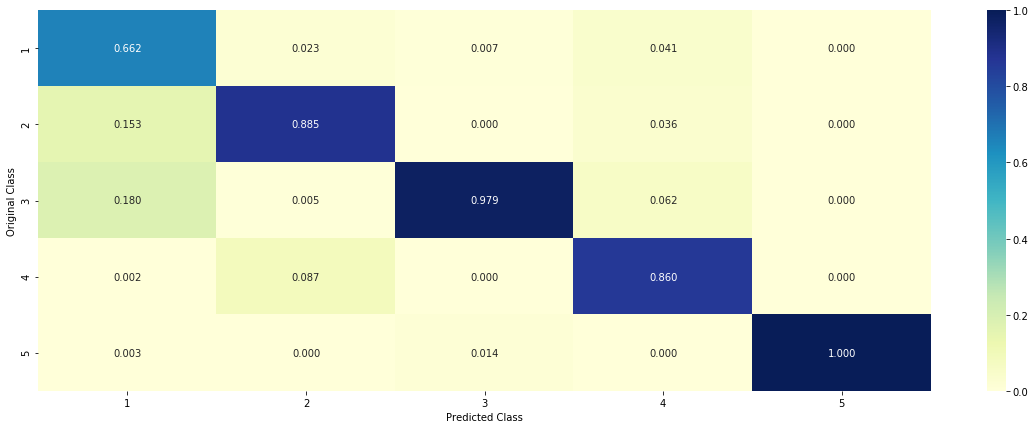

-------------------- Recall matrix (Row sum=1) --------------------


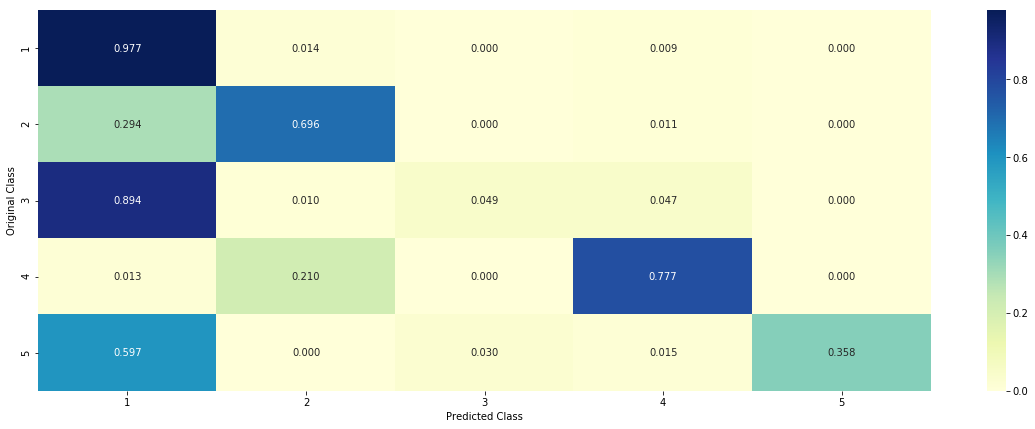

In [119]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(train_df,df['attack_type'][:70000])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,df['attack_type'][:70000])
pred_y = sig_clf.predict_proba(df_rc_test)

predicted_y =np.argmax(pred_y, axis=1)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(test_df['attack_type'].astype('int'),sig_clf.predict_proba(df_rc_test),eps=1e-15))
plot_confusion_matrix(test_df['attack_type'].astype('int'), predicted_y+1)

<h2>K Nearest Neighbour Classification</h2>

for alpha = 5
Log Loss : 0.006055223440186511
for alpha = 11
Log Loss : 0.010200729081809393
for alpha = 15
Log Loss : 0.01267567847187136
for alpha = 21
Log Loss : 0.014950187399962114
for alpha = 31
Log Loss : 0.01801151659938744
for alpha = 41
Log Loss : 0.021062317138695757
for alpha = 51
Log Loss : 0.02417869278215835
for alpha = 99
Log Loss : 0.03756416953637434


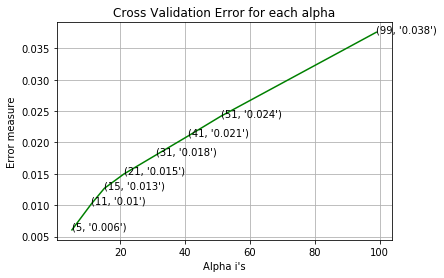

Wall time: 1h 4min 37s


In [110]:
%%time
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df,df['attack_type'][:70000])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(cv_df,df['attack_type'][70000:])
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(df['attack_type'][70000:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(df['attack_type'][70000:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [114]:
best_alpha=5
clf = KNeighborsClassifier(n_neighbors=best_alpha)
clf.fit(train_df,df['attack_type'][:70000])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,df['attack_type'][:70000])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(test_df['attack_type'].astype('int'),sig_clf.predict_proba(df_rc_test),eps=1e-15))

Log loss : 1.172165547806053


-------------------- Confusion matrix --------------------


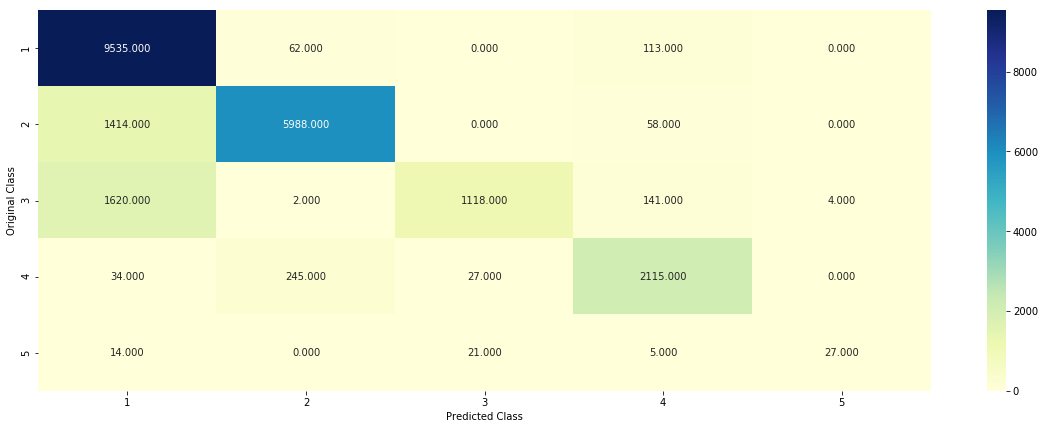

-------------------- Precision matrix (Columm Sum=1) --------------------


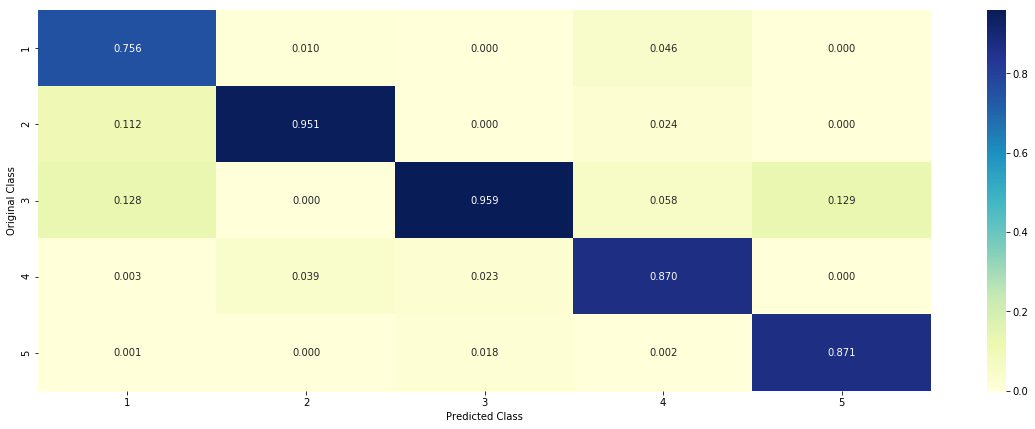

-------------------- Recall matrix (Row sum=1) --------------------


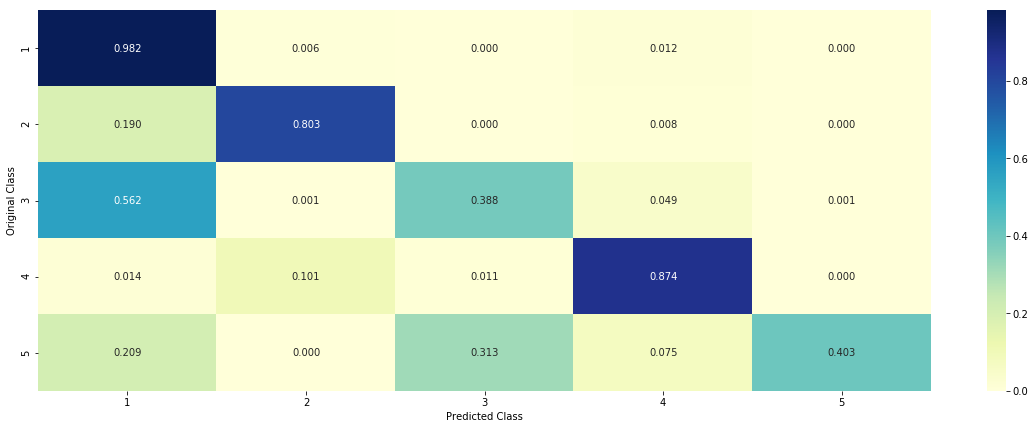

In [118]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(test_df['attack_type'].astype('int'), predicted_y+1)

<h2>Recursive Feature Elimination</h2>

In [1]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df_rc_train=pd.read_csv(r'C:\Users\anjineyulu\df_rc_train_final.csv')
df_rc_test=pd.read_csv(r'C:\Users\anjineyulu\df_rc_test_final.csv')

In [3]:
df_rc_train.shape

(125973, 54)

In [4]:
df_rc_train.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.723589,0.185912,0.452201,0.008874,0.014994,0.945055,0.03406,0.093983,0.085104,0.005072
1,1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591588,0.015189,0.015611,0.435199,0.013792,0.945055,0.03406,0.093983,0.085104,0.005072
2,2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034896,0.772579,0.000562,0.252701,0.001067,0.000000,1.00000,0.000000,0.000000,0.000000
3,3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072
4,4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,...,0.946854,0.058306,0.000000,0.000000,0.000000,0.945055,0.03406,0.093983,0.085104,0.005072


In [5]:
df_rc_test.shape

(22543, 54)

In [6]:
df_rc_test.head(5)

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.172427,0.677996,0.126274,0.137018,0.004555,0.010062,0.802624,0.128063,0.328859,0.000000
1,1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.172427,0.677996,0.126274,0.137018,0.004555,0.010062,0.802624,0.128063,0.328859,0.000000
2,2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.372252,0.077868,0.624705,0.013426,0.149355,1.000000,0.048264,0.866599,0.022135,0.013678
3,3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.104985,0.024497,0.037148,1.000000,0.173632,1.000000,0.048264,0.866599,0.022135,0.013678
4,4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016386,0.549185,0.295055,0.255738,0.157755,0.015221,0.491470,0.200199,0.665883,0.050524


In [7]:
df_rc_train.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df_rc_test.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df_y_train=df_rc_train['attack_type']

In [10]:
df_y_test=df_rc_test['attack_type']

In [11]:
df_rc_train.drop('attack_type',axis=1,inplace=True)

In [12]:
df_rc_test.drop('attack_type',axis=1,inplace=True)

In [13]:
df_rc_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,125973.000000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.006692,3.302024e-05,1.509928e-05,0.000198,0.007562,0.000037,0.002655,0.000244,0.395736,0.000037,...,0.532657,0.372877,0.060167,0.107009,0.022998,0.592519,0.351093,0.063282,0.099047,0.008112
std,0.060700,4.253974e-03,3.069818e-03,0.014086,0.084510,0.004789,0.027922,0.009048,0.489010,0.003201,...,0.430519,0.392037,0.148270,0.207933,0.046157,0.436291,0.428212,0.059524,0.153777,0.041422
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034896,0.058306,0.000000,0.000000,0.000000,0.000000,0.034060,0.000000,0.000000,0.000000
50%,0.000000,3.188489e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.723589,0.058306,0.003848,0.008874,0.004351,0.945055,0.034060,0.093983,0.085104,0.005072
75%,0.000000,2.000052e-07,3.939120e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.946854,0.772579,0.059784,0.108656,0.015066,0.945055,1.000000,0.093983,0.085104,0.005072
max,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_rc_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
count,22543.000000,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,0.003792,1.654724e-04,0.001528,0.000311,0.002809,0.000237,0.001044,0.005412,0.442222,0.000151,...,0.444728,0.333622,0.162373,0.139885,0.084209,0.667204,0.311579,0.607718,0.114082,0.018217
std,0.024382,7.525540e-03,0.015766,0.017619,0.047534,0.012158,0.009193,0.037583,0.496661,0.009133,...,0.381507,0.278817,0.256449,0.235506,0.167549,0.464185,0.380073,0.364563,0.163459,0.044936
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.094202,0.159086,0.000000,0.000000,0.000000,0.010062,0.048264,0.128063,0.022135,0.012033
50%,0.000000,8.595216e-07,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.172427,0.159086,0.063564,0.018511,0.004555,1.000000,0.048264,0.866599,0.022135,0.013678
75%,0.000000,4.568198e-06,0.000447,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.882941,0.648850,0.146524,0.137018,0.063187,1.000000,0.802624,0.866599,0.135290,0.013678
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd

In [17]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=1e-6, penalty='l2', loss='log', random_state=42)
rfe=RFE(clf,20)
rfe=rfe.fit(df_rc_train[:88181],df_y_train[:88181].astype('int'))
print('**************************************************')
print(rfe.support_)
print('**************************************************')
print(rfe.ranking_)

**************************************************
[False False False False  True False False  True False False  True False
 False False False False False  True False  True  True  True  True False
  True False  True False  True False  True False False  True  True  True
  True  True False False  True  True False False False False False False
 False False  True False]
**************************************************
[10 31 33 28  1 22 12  1 16 30  1 11 29 25 27 23 32  1  6  1  1  1  1 15
  1 17  1  7  1  8  1  3  2  1  1  1  1  1 18 14  1  1  4 20  9 21  5 19
 24 13  1 26]
Wall time: 40.3 s


In [18]:
pred_y=rfe.predict_proba(df_rc_test)

In [19]:
# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 3.969324748535234


In [56]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=1e-6, penalty='l2', loss='log', random_state=42)
rfe=RFE(clf,5)
rfe=rfe.fit(df_rc_train[:88181],df_y_train[:88181].astype('int'))
print('**************************************************')
print(rfe.support_)
print('**************************************************')
print(rfe.ranking_)

**************************************************
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False  True False False  True False False
 False False False False  True False False False False False False False
 False False False False]
**************************************************
[25 46 48 43 10 37 27 12 31 45  6 26 44 40 42 38 47  2 21 11  7  4 13 30
  8 32  1 22  1 23  1 18 17  1  5  9  3 15 33 29  1 14 19 35 24 36 20 34
 39 28 16 41]
Wall time: 43.5 s


In [57]:
pred_y=rfe.predict_proba(df_rc_test)

In [58]:
# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 3.412903302821105


In [60]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=1e-6, penalty='l2', loss='log', random_state=42)
rfe=RFE(clf,30)
rfe=rfe.fit(df_rc_train[:88181],df_y_train[:88181].astype('int'))
print('**************************************************')
print(rfe.support_)
print('**************************************************')
print(rfe.ranking_)

**************************************************
[ True False False False  True False False  True False False  True  True
 False False False False False  True  True  True  True  True  True False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True False  True False  True False
 False False  True False]
**************************************************
[ 1 21 23 18  1 12  2  1  6 20  1  1 19 15 17 13 22  1  1  1  1  1  1  5
  1  7  1  1  1  1  1  1  1  1  1  1  1  1  8  4  1  1  1 10  1 11  1  9
 14  3  1 16]
Wall time: 24.3 s


In [61]:
pred_y=rfe.predict_proba(df_rc_test)

In [62]:
# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 4.09125493048256


In [65]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=1e-6, penalty='l2', loss='log', random_state=42)
rfe=RFE(clf,35)
rfe=rfe.fit(df_rc_train[:88181],df_y_train[:88181].astype('int'))
print('**************************************************')
print(rfe.support_)
print('**************************************************')
print(rfe.ranking_)

**************************************************
[ True False False False  True False  True  True  True False  True  True
 False False False False False  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True False  True False
 False  True  True False]
**************************************************
[ 1 16 18 13  1  7  1  1  1 15  1  1 14 10 12  8 17  1  1  1  1  1  1  1
  1  2  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  5  1  6  1  4
  9  1  1 11]
Wall time: 19.7 s


In [66]:
pred_y=rfe.predict_proba(df_rc_test)

In [67]:
# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 4.586117934418257


In [68]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=1e-6, penalty='l2', loss='log', random_state=42)
rfe=RFE(clf,35)
rfe=rfe.fit(df_rc_train[:88181],df_y_train[:88181].astype('int'))
print('**************************************************')
print(rfe.support_)
print('**************************************************')
print(rfe.ranking_)

**************************************************
[ True False False False  True False  True  True  True False  True  True
 False False False False False  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True False  True False
 False  True  True False]
**************************************************
[ 1 16 18 13  1  7  1  1  1 15  1  1 14 10 12  8 17  1  1  1  1  1  1  1
  1  2  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  5  1  6  1  4
  9  1  1 11]
Wall time: 19.5 s


In [69]:
pred_y=rfe.predict_proba(df_rc_test)

In [70]:
# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 4.586117934418257


In [71]:
df_rc_train.shape

(125973, 52)

<h3>Thus we can say that all features are equally contributing to decreasing the log-loss,so no feature should be eliminated</h3>

<h2>Dimensionality Reduction</h2>

<h3>Just for the sake of visualization</h3>

In [25]:
%%time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df_rc_train[:88181])

Wall time: 58min 32s


In [26]:
tsne_data = np.vstack((tsne_data.T,df_y_train[:88181])).T

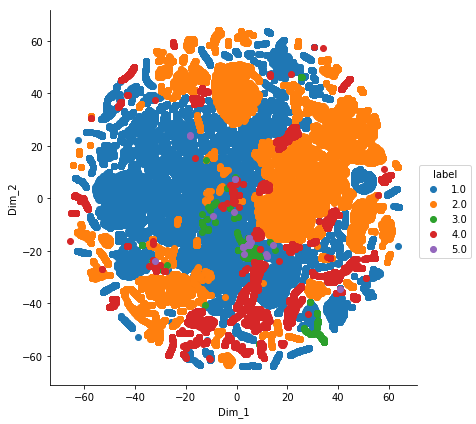

In [27]:
import seaborn as sn
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [21]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

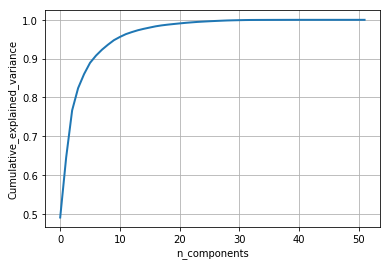

In [23]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 52
pca_data = pca.fit_transform(df_rc_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

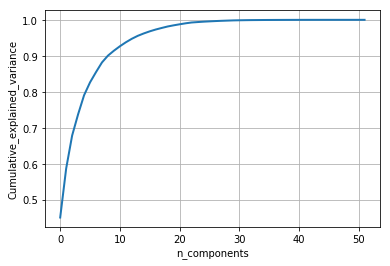

In [29]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 52
pca_data = pca.fit_transform(df_rc_test)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [32]:
pca.n_components =10
pca_train_data = pca.fit_transform(df_rc_train)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_train_data.shape)

shape of pca_reduced.shape =  (125973, 10)


In [35]:
pca.n_components =10
pca_test_data = pca.fit_transform(df_rc_test)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_test_data.shape)

shape of pca_reduced.shape =  (22543, 10)


In [36]:
pca_train_data[:2]

array([[-4.59764539e-01,  1.67254986e-01,  1.00962235e-03,
         4.63402872e-02, -5.82485728e-01, -3.66240654e-01,
        -8.66938210e-02,  2.03594978e-02,  4.95984327e-02,
         5.71884618e-01],
       [-2.45650696e-01,  7.47764478e-01,  1.27247699e+00,
        -5.35858004e-01, -7.31757448e-01, -7.70233389e-01,
         2.68721860e-01,  5.85647016e-02,  2.36334565e-01,
        -5.35874003e-01]])

In [37]:
pca_test_data[:2]

array([[ 2.07899011, -0.66174597, -0.01485458,  0.21615111, -0.06215853,
        -0.12844917,  0.02306501, -0.33244525,  0.02465366, -0.08290151],
       [ 2.09063598, -0.65869354, -0.02786412,  0.1460907 , -0.0434808 ,
        -0.13666484, -0.01093759, -0.36026598,  0.09772553, -0.04084964]])

for alpha = 1e-06
Log Loss for cv : 0.18481527374550227
for alpha = 1e-05
Log Loss for cv : 0.16776075890235834
for alpha = 0.0001
Log Loss for cv : 0.15798048374883658
for alpha = 0.001
Log Loss for cv : 0.16128958582227224
for alpha = 0.01
Log Loss for cv : 0.17937526158130557
for alpha = 0.1
Log Loss for cv : 0.22518070779416588
for alpha = 1
Log Loss for cv : 0.25967723928812153
for alpha = 10
Log Loss for cv : 0.26674146107700747
for alpha = 100
Log Loss for cv : 0.26759617875179


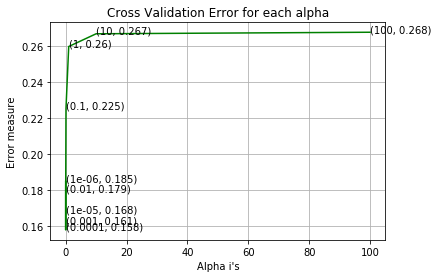

Wall time: 9.39 s


In [38]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(pca_train_data[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(pca_train_data[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(pca_train_data[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss for cv :",log_loss(df_y_train[88181:], sig_clf_probs)) 
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [40]:
best_alpha=1e-05

In [42]:
y=clf.predict(pca_test_data)

In [43]:
y[:10]

array([2, 2, 1, 2, 2, 1, 1, 5, 1, 1], dtype=int64)

In [48]:
%%time
from sklearn.metrics import accuracy_score
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(pca_train_data[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(pca_train_data[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(pca_test_data)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))
print(accuracy_score(df_y_test,clf.predict(pca_test_data)))

Log loss : 3.2257299841759024
0.521758417247039
Wall time: 1.72 s


<h2>Logistic Regression</h2>

<h3>With Class Weights Balanced</h3> 

for alpha = 1e-06
Log Loss for cv : 0.09067791753596628
for alpha = 1e-05
Log Loss for cv : 0.09199490228390227
for alpha = 0.0001
Log Loss for cv : 0.10041449028754845
for alpha = 0.001
Log Loss for cv : 0.12282916108299201
for alpha = 0.01
Log Loss for cv : 0.15758818064046454
for alpha = 0.1
Log Loss for cv : 0.21102130212421535
for alpha = 1
Log Loss for cv : 0.24877389697256513
for alpha = 10
Log Loss for cv : 0.29208018206691294
for alpha = 100
Log Loss for cv : 0.3130667037025735


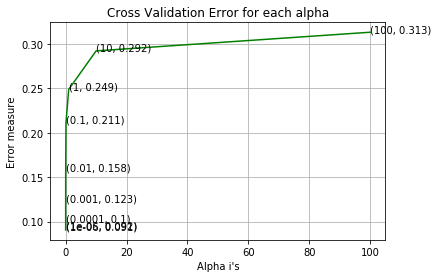

Wall time: 24.1 s


In [82]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(df_rc_train[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(df_rc_train[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss for cv :",log_loss(df_y_train[88181:], sig_clf_probs)) 
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [83]:
best_alpha=1e-06

In [84]:
predict_y = sig_clf.predict_proba(df_rc_train[:88181])
print('For values of best alpha = ',best_alpha, "The train log loss is:",log_loss(df_y_train[:88181], predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(df_rc_train[88181:])
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(df_y_train[88181:], predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(df_rc_test)
print('For values of best alpha = ',best_alpha, "The test log loss is:",log_loss(df_y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  1e-06 The train log loss is: 0.31457098059934596
For values of best alpha =  1e-06 The cross validation log loss is: 0.3130667037025735
For values of best alpha =  1e-06 The test log loss is: 1.1395305563573512


In [85]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))
print(accuracy_score(df_y_test,clf.predict(df_rc_test)))

Log loss : 1.0945500884391122
0.752162533824247
Wall time: 3.87 s


-------------------- Confusion matrix --------------------


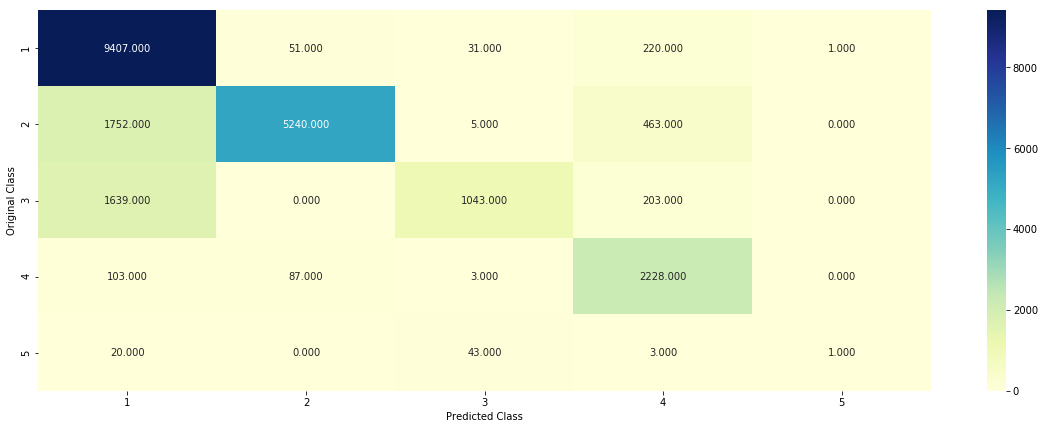

-------------------- Precision matrix (Columm Sum=1) --------------------


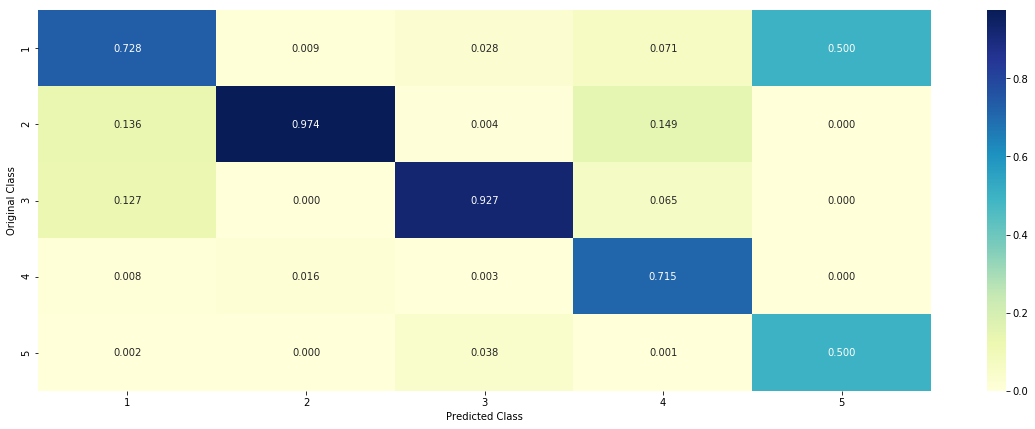

-------------------- Recall matrix (Row sum=1) --------------------


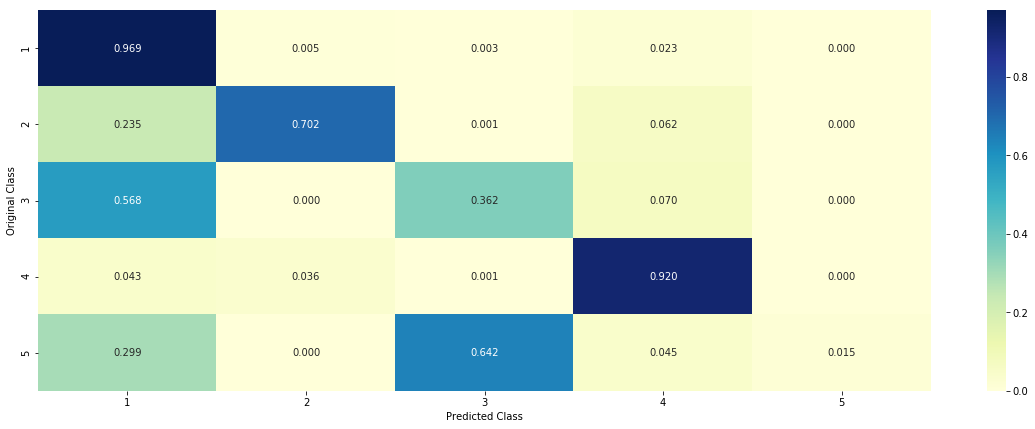

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(df_y_test.astype('int'), predicted_y+1)

In [23]:
import eli5

In [27]:
eli5.show_weights(clf,feature_names=list(df_rc_test.columns),show_feature_values=True)

In [26]:
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 1
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 2
Predicted Class Probabilities: [[0.0043 0.8283 0.     0.1673 0.    ]]
Actual Class : 2


In [28]:
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 10
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 1
Predicted Class Probabilities: [[7.373e-01 0.000e+00 1.950e-01 6.750e-02 2.000e-04]]
Actual Class : 4


In [29]:
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 300
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 2
Predicted Class Probabilities: [[0.0015 0.7671 0.     0.2314 0.    ]]
Actual Class : 2


<h2>L1 Regularization</h2>

for alpha = 1e-06
Log Loss for cv : 0.08698824197225585
for alpha = 1e-05
Log Loss for cv : 0.09089026211666776
for alpha = 0.0001
Log Loss for cv : 0.09753356491230082
for alpha = 0.001
Log Loss for cv : 0.12531302903785652
for alpha = 0.01
Log Loss for cv : 0.18406587818967074
for alpha = 0.1
Log Loss for cv : 0.4305530903322892
for alpha = 1
Log Loss for cv : 0.9639152112964336
for alpha = 10
Log Loss for cv : 0.9639152113190799
for alpha = 100
Log Loss for cv : 0.9639152113013744


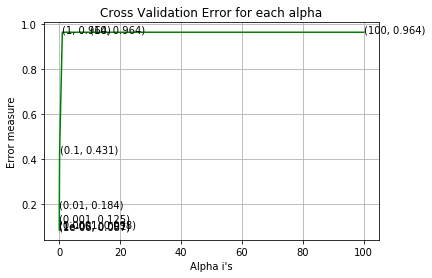

Wall time: 37.5 s


In [77]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l1', loss='log', random_state=42)
    clf.fit(df_rc_train[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(df_rc_train[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss for cv :",log_loss(df_y_train[88181:], sig_clf_probs)) 
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [78]:
best_alpha=1e-6

In [79]:
predict_y = sig_clf.predict_proba(df_rc_train[:88181])
print('For values of best alpha = ',best_alpha, "The train log loss is:",log_loss(df_y_train[:88181], predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(df_rc_train[88181:])
print('For values of best alpha = ', best_alpha, "The cross validation log loss is:",log_loss(df_y_train[88181:], predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(df_rc_test)
print('For values of best alpha = ',best_alpha, "The test log loss is:",log_loss(df_y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  1e-06 The train log loss is: 0.9645593820549938
For values of best alpha =  1e-06 The cross validation log loss is: 0.9639152113013744
For values of best alpha =  1e-06 The test log loss is: 1.5057671636866339


In [76]:
%%time
clf = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l1', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test,pred_y,eps=1e-15))
print(accuracy_score(df_y_test,clf.predict(df_rc_test)))

Log loss : 1.7124714137833716
0.7206228097413832
Wall time: 7.95 s


<h3>With class weights imbalanced</h3>

for alpha = 1e-06
Log Loss for cv : 0.09164332675290288
for alpha = 1e-05
Log Loss for cv : 0.0896779859463185
for alpha = 0.0001
Log Loss for cv : 0.09632875639476127
for alpha = 0.001
Log Loss for cv : 0.12173390971866772
for alpha = 0.01
Log Loss for cv : 0.16162940577355905
for alpha = 0.1
Log Loss for cv : 0.23158657229991578
for alpha = 1
Log Loss for cv : 0.27584355978834596
for alpha = 10
Log Loss for cv : 0.31747395868834094
for alpha = 100
Log Loss for cv : 0.3291808487890016


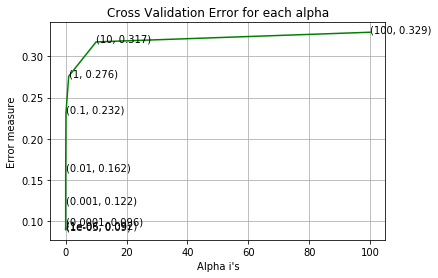

In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(df_rc_train[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(df_rc_train[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss for cv :",log_loss(df_y_train[88181:], sig_clf_probs)) 
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [31]:
best_alpha=1e-05

In [32]:
%%time
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 1.152666297755476
Wall time: 6.14 s


-------------------- Confusion matrix --------------------


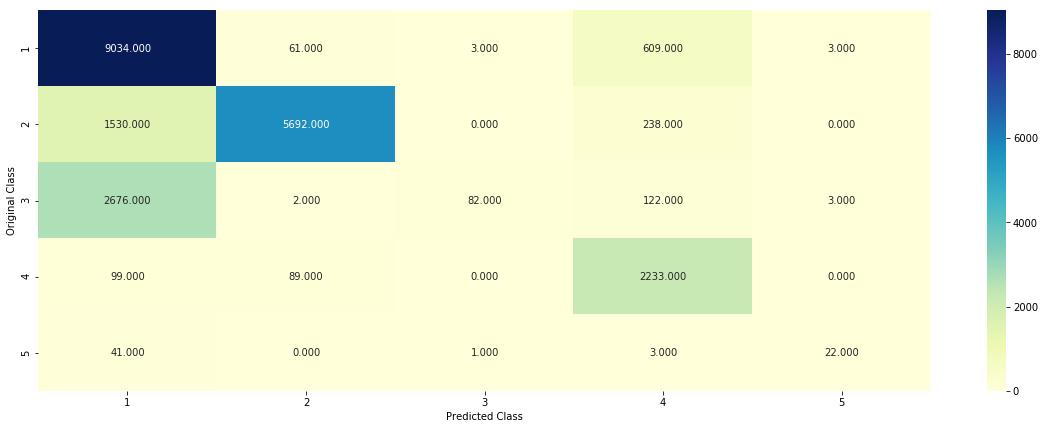

-------------------- Precision matrix (Columm Sum=1) --------------------


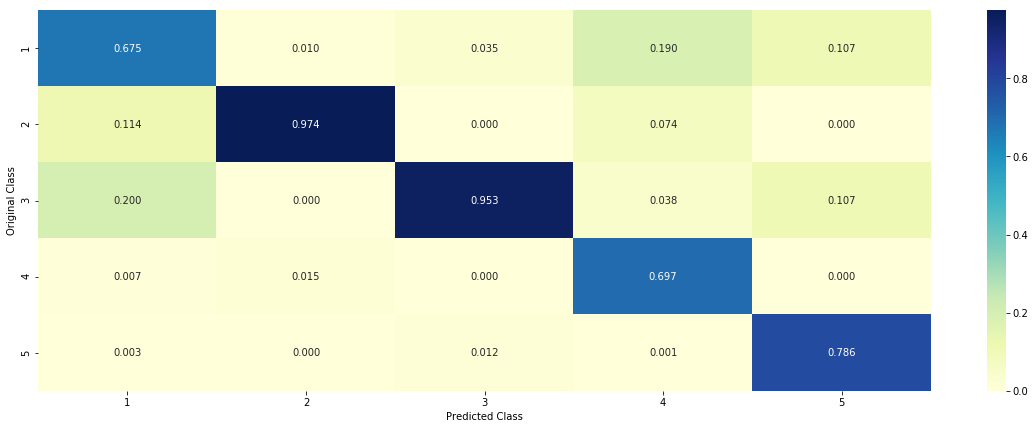

-------------------- Recall matrix (Row sum=1) --------------------


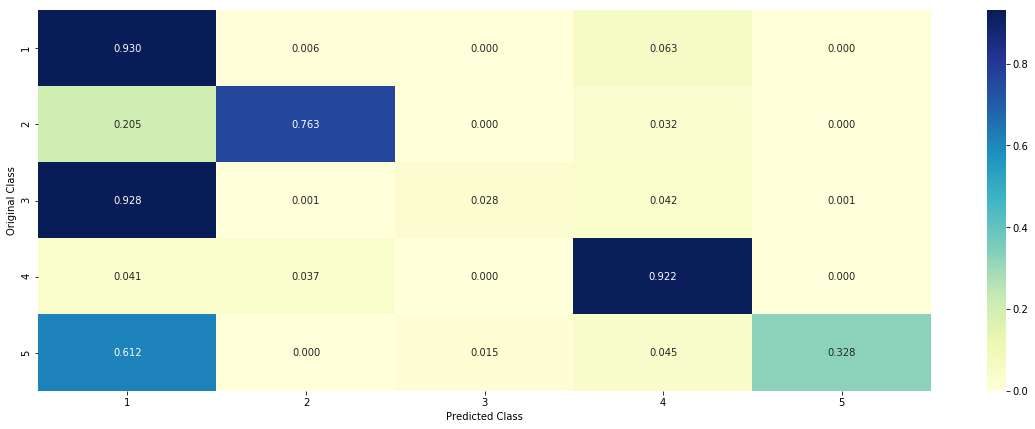

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(df_y_test.astype('int'), predicted_y+1)

In [34]:
eli5.show_weights(clf,feature_names=list(df_rc_test.columns),show_feature_values=True)

In [35]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 1
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 2
Predicted Class Probabilities: [[0.0023 0.9553 0.     0.0424 0.    ]]
Actual Class : 2


In [36]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 10
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 1
Predicted Class Probabilities: [[9.473e-01 0.000e+00 7.500e-03 4.470e-02 5.000e-04]]
Actual Class : 4


In [37]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 12
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 2
Predicted Class Probabilities: [[0.0032 0.9598 0.     0.037  0.    ]]
Actual Class : 2


<h3>Linear Support Vector Machines</h3>

for C = 1e-05
Log Loss : 0.0933400263714115
for C = 0.0001
Log Loss : 0.10076440458402128
for C = 0.001
Log Loss : 0.11326375124003459
for C = 0.01
Log Loss : 0.1353063139844023
for C = 0.1
Log Loss : 0.1750548202222763
for C = 1
Log Loss : 0.21506165137475136
for C = 10
Log Loss : 0.2605198164900079
for C = 100
Log Loss : 0.3212352545518918


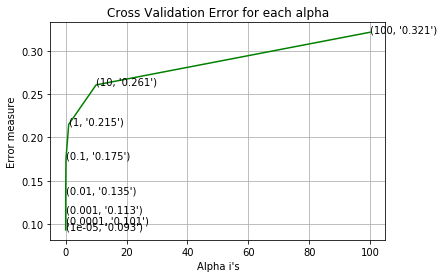

In [38]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(df_rc_train[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(df_rc_train[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(df_y_train[88181:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


In [43]:
best_alpha=1e-5

In [49]:
%%time
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 1.2947801237104422
Wall time: 4.42 s


In [51]:
eli5.show_weights(clf,feature_names=list(df_rc_test.columns),show_feature_values=True)

-------------------- Confusion matrix --------------------


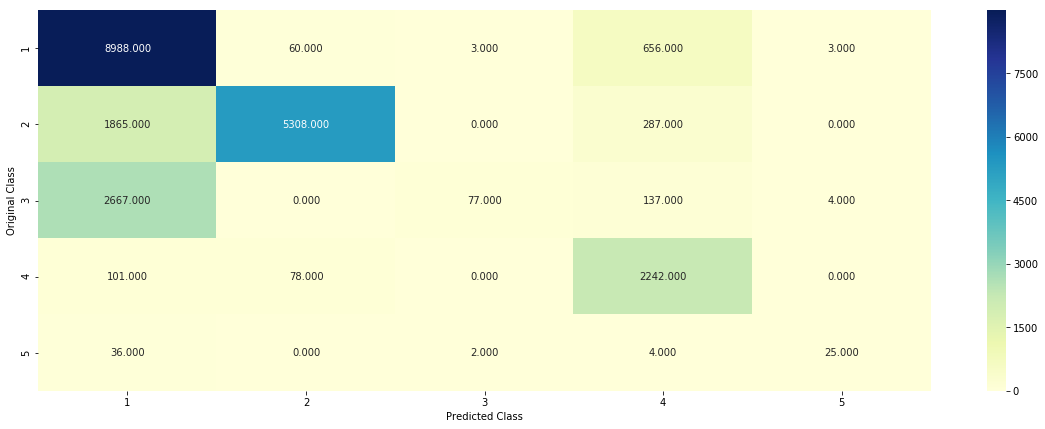

-------------------- Precision matrix (Columm Sum=1) --------------------


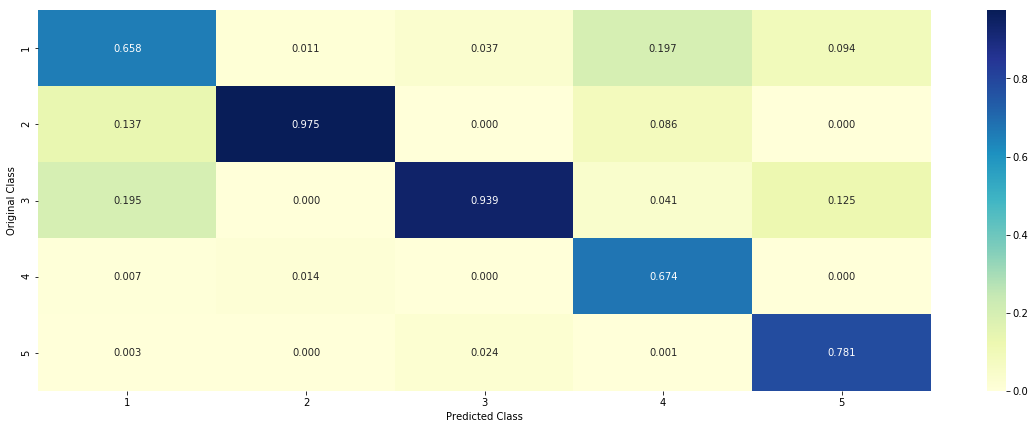

-------------------- Recall matrix (Row sum=1) --------------------


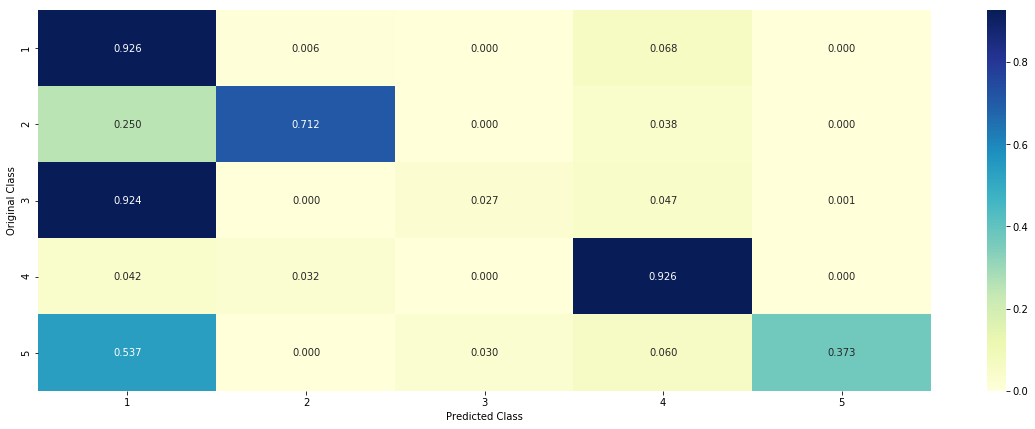

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(df_y_test.astype('int'), predicted_y+1)

In [46]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 1
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 2
Predicted Class Probabilities: [[2.900e-03 9.517e-01 0.000e+00 4.540e-02 1.000e-04]]
Actual Class : 2


In [47]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 50
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 1
Predicted Class Probabilities: [[9.998e-01 0.000e+00 1.000e-04 0.000e+00 1.000e-04]]
Actual Class : 1


In [48]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='hinge', random_state=42)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 1000
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 1
Predicted Class Probabilities: [[0.9999 0.     0.     0.     0.    ]]
Actual Class : 1


<h2>KNN</h2>

for alpha = 5
Log Loss : 0.01957687608951422
for alpha = 11
Log Loss : 0.031122240671523662
for alpha = 15
Log Loss : 0.0353873094464255
for alpha = 21
Log Loss : 0.040681715913257664
for alpha = 31
Log Loss : 0.04873393109267777


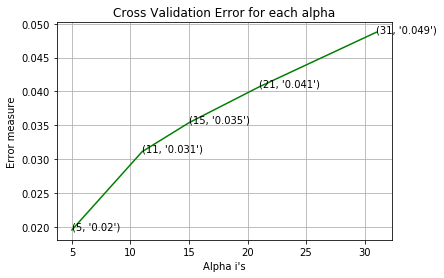

Wall time: 20min 35s


In [83]:
%%time
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(df_rc_train[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(df_rc_train[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(df_y_train[88181:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [88]:
%%time
best_alpha=5
clf = KNeighborsClassifier(n_neighbors=best_alpha)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 1.6100926131779663
Wall time: 11min 45s


<h2>Sample Query Point-1</h2>

In [109]:
clf = KNeighborsClassifier(n_neighbors=best_alpha)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
            cv='warn', method='sigmoid')

In [103]:
df_rc_test.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.172427,0.677996,0.126274,0.137018,0.004555,0.010062,0.802624,0.128063,0.328859,0.000000
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.172427,0.677996,0.126274,0.137018,0.004555,0.010062,0.802624,0.128063,0.328859,0.000000
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.372252,0.077868,0.624705,0.013426,0.149355,1.000000,0.048264,0.866599,0.022135,0.013678
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.104985,0.024497,0.037148,1.000000,0.173632,1.000000,0.048264,0.866599,0.022135,0.013678
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.016386,0.549185,0.295055,0.255738,0.157755,0.015221,0.491470,0.200199,0.665883,0.050524
5,0.000000,4.249857e-06,0.010784,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.882941,0.159086,0.000000,0.000000,0.000000,1.000000,0.048264,0.866599,0.022135,0.013678
6,0.000000,1.626724e-05,0.000288,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.661972,0.356848,0.017935,0.013409,0.050180,1.000000,0.048264,0.866599,0.022135,0.013678
7,0.000000,2.053302e-06,0.000129,0.0,0.0,0.0,0.0,0.25,0.0,0.0,...,0.016386,0.549185,0.295055,0.255738,0.157755,1.000000,0.048264,0.866599,0.022135,0.013678
8,0.000000,5.204881e-06,0.000347,0.0,0.0,0.0,0.0,0.00,1.0,0.0,...,0.882941,0.159086,0.000000,0.000000,0.000000,1.000000,0.048264,0.866599,0.022135,0.013678
9,0.000000,4.138437e-07,0.000117,0.0,0.0,0.0,0.0,0.25,0.0,0.0,...,0.065336,0.046373,1.000000,0.018464,0.167687,1.000000,0.048264,0.866599,0.022135,0.013678


In [115]:
from collections import Counter
test_point_index = 41
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", df_y_test.iloc[test_point_index])
neighbors = clf.kneighbors(df_rc_test.iloc[test_point_index].values.reshape(1,-1),best_alpha)
print("The ",best_alpha," nearest neighbours of the test points belongs to classes",df_y_train.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(df_y_train.iloc[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes 7301     1
36577    1
6829     1
64842    1
63585    1
Name: attack_type, dtype: int64
Fequency of nearest points : Counter({1: 5})


In [117]:
from collections import Counter
test_point_index = 65
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", df_y_test.iloc[test_point_index])
neighbors = clf.kneighbors(df_rc_test.iloc[test_point_index].values.reshape(1,-1),best_alpha)
print("The ",best_alpha," nearest neighbours of the test points belongs to classes",df_y_train.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(df_y_train.iloc[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes 29474    1
14476    2
13760    1
59196    1
22665    1
Name: attack_type, dtype: int64
Fequency of nearest points : Counter({1: 4, 2: 1})


In [118]:
from collections import Counter
test_point_index = 85
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", df_y_test.iloc[test_point_index])
neighbors = clf.kneighbors(df_rc_test.iloc[test_point_index].values.reshape(1,-1),best_alpha)
print("The ",best_alpha," nearest neighbours of the test points belongs to classes",df_y_train.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(df_y_train.iloc[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes 25058    1
19261    1
18748    1
29903    1
70764    1
Name: attack_type, dtype: int64
Fequency of nearest points : Counter({1: 5})


In [122]:
from collections import Counter
test_point_index =561
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", df_y_test.iloc[test_point_index])
neighbors = clf.kneighbors(df_rc_test.iloc[test_point_index].values.reshape(1,-1),best_alpha)
print("The ",best_alpha," nearest neighbours of the test points belongs to classes",df_y_train.iloc[neighbors[1][0]])
print("Fequency of nearest points :",Counter(df_y_train.iloc[neighbors[1][0]]))

Predicted Class : 1
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes 3823     1
57981    1
78357    1
53598    1
26681    1
Name: attack_type, dtype: int64
Fequency of nearest points : Counter({1: 5})


<h2>Naive Bayes</h2>

for alpha = 1e-05
Log Loss : 0.31488021639529634
for alpha = 0.0001
Log Loss : 0.31498769216799904
for alpha = 0.001
Log Loss : 0.31507714707394674
for alpha = 0.1
Log Loss : 0.3165301699429411
for alpha = 1
Log Loss : 0.31712192034868397
for alpha = 10
Log Loss : 0.31946529077512165
for alpha = 100
Log Loss : 0.31028258200515746
for alpha = 1000
Log Loss : 0.3015254521311008


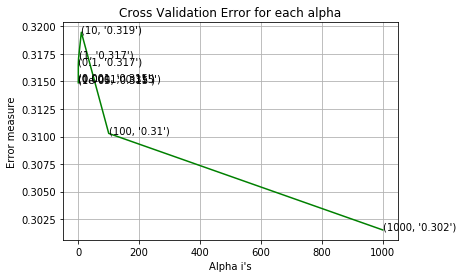

In [52]:
from sklearn.naive_bayes import MultinomialNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = MultinomialNB(alpha=i)
    clf.fit(df_rc_train[:88181],df_y_train[:88181])
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(df_rc_train[88181:],df_y_train[88181:])
    sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
    cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(df_y_train[88181:], sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [53]:
best_alpha=0.1

In [54]:
%%time
clf = MultinomialNB(alpha=best_alpha)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 1.0909596788035176
Wall time: 1.41 s


-------------------- Confusion matrix --------------------


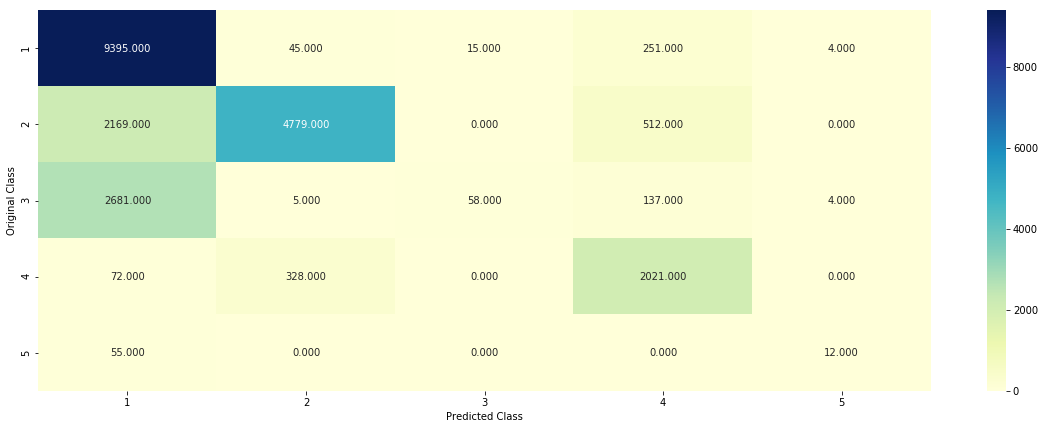

-------------------- Precision matrix (Columm Sum=1) --------------------


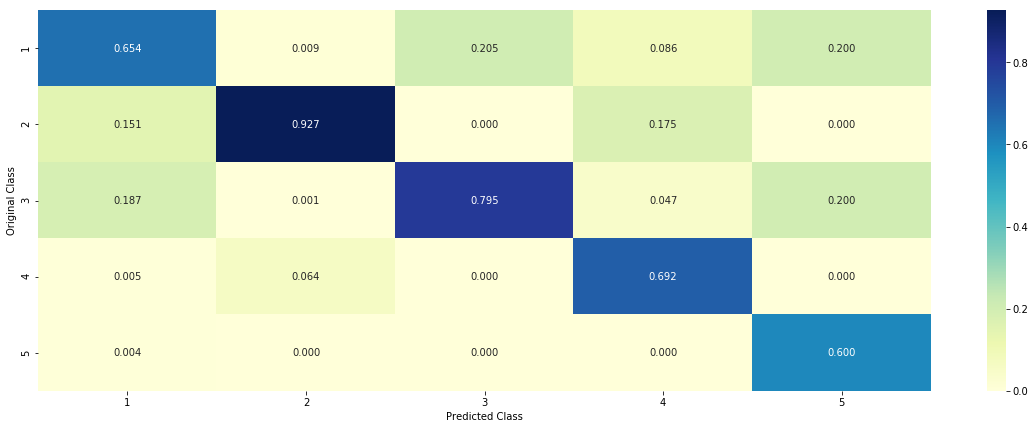

-------------------- Recall matrix (Row sum=1) --------------------


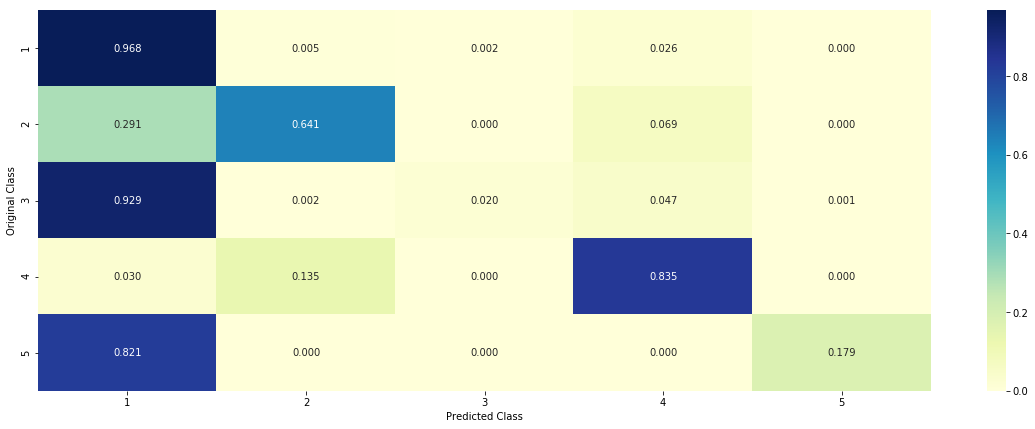

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(df_y_test.astype('int'), predicted_y+1)

<h2>Random Forest</h2>

In [58]:
%%time
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,300,400,500]
max_depth = [3,6,9,12]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(df_rc_train[:88181],df_y_train[:88181])
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
        sig_clf_probs = sig_clf.predict_proba(df_rc_train[88181:])
        cv_log_error_array.append(log_loss(df_y_train[88181:], sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(df_y_train[88181:], sig_clf_probs)) 



for n_estimators = 100 and max depth =  3
Log Loss : 0.11529884183268577
for n_estimators = 100 and max depth =  6
Log Loss : 0.03314550190179019
for n_estimators = 100 and max depth =  9
Log Loss : 0.014122263427895052
for n_estimators = 100 and max depth =  12
Log Loss : 0.010097663182447595
for n_estimators = 200 and max depth =  3
Log Loss : 0.11381738426671599
for n_estimators = 200 and max depth =  6
Log Loss : 0.03213501106212809
for n_estimators = 200 and max depth =  9
Log Loss : 0.014147766952352037
for n_estimators = 200 and max depth =  12
Log Loss : 0.010212430599594534
for n_estimators = 300 and max depth =  3
Log Loss : 0.11239294941365065
for n_estimators = 300 and max depth =  6
Log Loss : 0.03172193708134337
for n_estimators = 300 and max depth =  9
Log Loss : 0.01408915627381828
for n_estimators = 300 and max depth =  12
Log Loss : 0.010232727877840365
for n_estimators = 400 and max depth =  3
Log Loss : 0.11163338707225233
for n_estimators = 400 and max depth =  6
L

In [60]:
%%time
clf = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=12, random_state=42, n_jobs=-1)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(df_rc_train[:88181],df_y_train[:88181])
pred_y = sig_clf.predict_proba(df_rc_test)

# for calculating log_loss we willl provide the array of probabilities belongs to each class
print("Log loss :",log_loss(df_y_test.astype('int'),pred_y,eps=1e-15))

Log loss : 1.170388323210431
Wall time: 1min 11s


In [61]:
eli5.show_weights(clf,feature_names=list(df_rc_test.columns),show_feature_values=True)

Weight,Feature
0.1203 ± 0.3744,0.1
0.0862 ± 0.3279,1.1
0.0715 ± 0.3181,same_srv_rate
0.0571 ± 0.2754,1.2
0.0564 ± 0.2746,diff_srv_rate
0.0529 ± 0.2061,3.1
0.0464 ± 0.2362,0.2
0.0422 ± 0.2466,2.2
0.0368 ± 0.1301,count
0.0345 ± 0.2075,dst_host_serror_rate


In [62]:
clf = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=12, random_state=42, n_jobs=-1)
clf.fit(df_rc_train[:88181],df_y_train[:88181])
test_point_index = 1
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 2
Predicted Class Probabilities: [[7.000e-04 9.796e-01 5.000e-04 1.900e-02 2.000e-04]]
Actual Class : 2


In [63]:
test_point_index = 45
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 1
Predicted Class Probabilities: [[9.984e-01 2.000e-04 6.000e-04 6.000e-04 2.000e-04]]
Actual Class : 1


In [64]:
test_point_index = 900
predicted_cls = sig_clf.predict(df_rc_test.iloc[test_point_index].values.reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(df_rc_test.iloc[test_point_index].values.reshape(1,-1)),4))
print("Actual Class :", df_y_test.iloc[test_point_index])
eli5.show_prediction(clf,df_rc_test.iloc[test_point_index],feature_names=list(df_rc_test.columns),show_feature_values=True)

Predicted Class : 4
Predicted Class Probabilities: [[1.50e-02 4.70e-03 1.00e-03 9.79e-01 2.00e-04]]
Actual Class : 4


-------------------- Confusion matrix --------------------


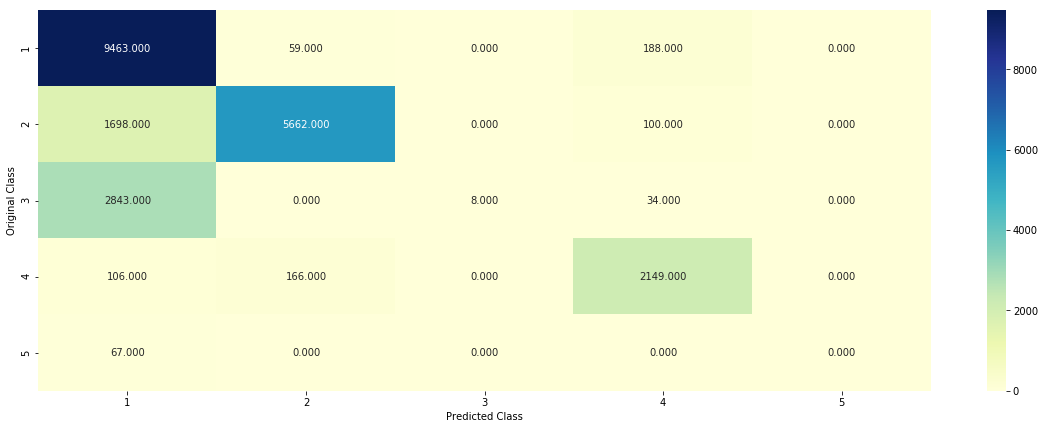

-------------------- Precision matrix (Columm Sum=1) --------------------


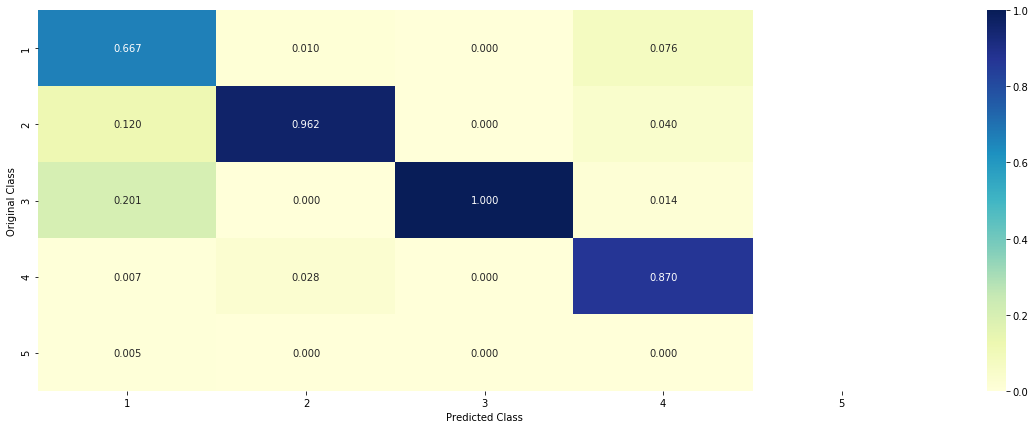

-------------------- Recall matrix (Row sum=1) --------------------


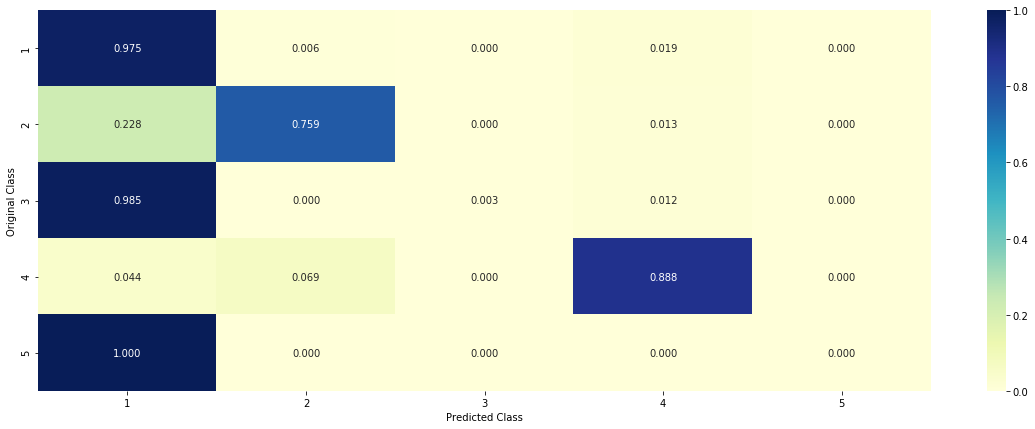

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
predicted_y =np.argmax(pred_y, axis=1)
plot_confusion_matrix(df_y_test.astype('int'), predicted_y+1)